In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import requests
from io import BytesIO
from PIL import Image
import os, ast
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string
import random
import math
import pickle

In [3]:
csv_data = '/content/drive/MyDrive/A2_Data.csv'

In [4]:
dframe= pd.read_csv(csv_data, index_col=0)
dframe.head()

,Image,Review Text
3452,['https://images-na.ssl-images-amazon.com/imag...,Loving these vintage springs on my vintage str...
1205,['https://images-na.ssl-images-amazon.com/imag...,Works great as a guitar bench mat. Not rugged ...
1708,['https://images-na.ssl-images-amazon.com/imag...,We use these for everything from our acoustic ...
2078,['https://images-na.ssl-images-amazon.com/imag...,Great price and good quality. It didn't quite...
801,['https://images-na.ssl-images-amazon.com/imag...,I bought this bass to split time as my primary...


In [5]:
dframe.shape

(1000, 2)

In [ ]:
# images are downloaded in a folder

# Function to fetch images from col of df, ie URLs and save them
def save_images(csv_data):
    dframe = pd.read_csv(csv_data)
    image_urls = []
    for i in dframe['Image']:
      image_urls.extend(ast.literal_eval(i))

    for index, url in enumerate(image_urls):
        try:
            response = requests.get(url)
            if response.status_code == 200:
                # Convert the response content to an image
                image = Image.open(BytesIO(response.content))

                fileName = f"image_{index}.jpg"
                image.save(fileName)
                print(f"Saved image: {fileName}")
            else:
                print(f"Could not retrieve image from URL: {url}")
        except Exception as e:
            print(f"Error retrieving image from URL: {url}")
            print(str(e))

save_images(csv_data)

Saved image: image_0.jpg
Saved image: image_1.jpg
Saved image: image_2.jpg
Saved image: image_3.jpg
Saved image: image_4.jpg
Saved image: image_5.jpg
Saved image: image_6.jpg
Saved image: image_7.jpg
Saved image: image_8.jpg
Saved image: image_9.jpg
Saved image: image_10.jpg
Saved image: image_11.jpg
Saved image: image_12.jpg
Saved image: image_13.jpg
Saved image: image_14.jpg
Saved image: image_15.jpg
Saved image: image_16.jpg
Saved image: image_17.jpg
Saved image: image_18.jpg
Saved image: image_19.jpg
Saved image: image_20.jpg
Saved image: image_21.jpg
Saved image: image_22.jpg
Saved image: image_23.jpg
Saved image: image_24.jpg
Saved image: image_25.jpg
Saved image: image_26.jpg
Saved image: image_27.jpg
Saved image: image_28.jpg
Saved image: image_29.jpg
Saved image: image_30.jpg
Saved image: image_31.jpg
Saved image: image_32.jpg
Saved image: image_33.jpg
Saved image: image_34.jpg
Saved image: image_35.jpg
Saved image: image_36.jpg
Saved image: image_37.jpg
Saved image: image_38.

In [ ]:
#moving images to another folder
import shutil

dest_folder = "/content/image_training"

if not os.path.exists(dest_folder):
    os.makedirs(dest_folder)

for i in range(0,1648):
  try:
      # Source path of the image
      src_path = f"/content/image_{i}.jpg"

      # Move the image to the new folder
      shutil.move(src_path, dest_folder)
      print(f"Image moved from {src_path} to {dest_folder}")
  except Exception as e:
      print(f"Error moving image: {str(e)}")

Image moved from /content/image_0.jpg to /content/image_training
Image moved from /content/image_1.jpg to /content/image_training
Image moved from /content/image_2.jpg to /content/image_training
Image moved from /content/image_3.jpg to /content/image_training
Image moved from /content/image_4.jpg to /content/image_training
Image moved from /content/image_5.jpg to /content/image_training
Image moved from /content/image_6.jpg to /content/image_training
Image moved from /content/image_7.jpg to /content/image_training
Image moved from /content/image_8.jpg to /content/image_training
Image moved from /content/image_9.jpg to /content/image_training
Image moved from /content/image_10.jpg to /content/image_training
Image moved from /content/image_11.jpg to /content/image_training
Image moved from /content/image_12.jpg to /content/image_training
Image moved from /content/image_13.jpg to /content/image_training
Image moved from /content/image_14.jpg to /content/image_training
Image moved from /co

In [ ]:
!cp -r '/content/image_training/' '/content/drive/My Drive/IR_Assign_2'

In [ ]:
# performing atleast 3 augmentations
for i in range(0,1648):
  try:
      with Image.open(f'/content/drive/My Drive/IR_Assign_2/image_training/image_{i}.jpg') as image:
          # random flipping the image
          option = random.choice(["horizontal", "vertical", "none"])

          if option == "horizontal":
              flippedImage = image.transpose(Image.FLIP_LEFT_RIGHT)
          elif option == "vertical":
              flippedImage = image.transpose(Image.FLIP_TOP_BOTTOM)
          else:
              flippedImage = image  # No flip

          # rotate image
          degrees = random.randint(-45, 45)
          rotatedImage = flippedImage.rotate(degrees, expand=True)

          # Resize the image
          resizedImage = rotatedImage.resize((200,100))

          # Save the modified image
          resizedImage.save(f"image_{i}.jpg")
          print(f"Modified images saved!")
  except Exception as e:
      print(f"Error modifying image: {str(e)}")

Modified images saved!
Modified images saved!
Modified images saved!
Modified images saved!
Modified images saved!
Modified images saved!
Modified images saved!
Modified images saved!
Modified images saved!
Modified images saved!
Modified images saved!
Modified images saved!
Modified images saved!
Modified images saved!
Modified images saved!
Modified images saved!
Modified images saved!
Modified images saved!
Modified images saved!
Modified images saved!
Modified images saved!
Modified images saved!
Modified images saved!
Modified images saved!
Modified images saved!
Modified images saved!
Modified images saved!
Modified images saved!
Modified images saved!
Modified images saved!
Modified images saved!
Modified images saved!
Modified images saved!
Modified images saved!
Modified images saved!
Modified images saved!
Modified images saved!
Modified images saved!
Modified images saved!
Modified images saved!
Modified images saved!
Modified images saved!
Modified images saved!
Modified im

b. Training with VGG16

In [ ]:
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing import image
from keras.models import Model
from tqdm import tqdm

In [ ]:
# Function to load and preprocess an image
def load_and_preprocess_image(img_path):
    try:
        img = image.load_img(img_path, target_size=(224, 224))  # VGG16 input size
        image_array = image.img_to_array(img)
        image_array = np.expand_dims(image_array, axis=0) #Adds an extra dimension to the array to make it compatible with the batch input shape expected by the VGG16 model.
        image_array = preprocess_input(image_array) #This step adjusts the pixel values based on the mean values calculated on the ImageNet dataset during the training of VGG16.
        return image_array
    except Exception as e:
        print(f"Error loading image: {str(e)}")
        return None

# Function to extract features using VGG16
def featuresExtraction_vgg16(img_folder):
    try:
        # Load the VGG16 model pre-trained on ImageNet dataset
        base_model = VGG16(weights='imagenet', include_top=True)

        # Extract features from the fully connected layer of VGG16
        model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc2').output)

        features_list = []
        image_paths = []

        # Iterate through each image in the folder
        for filename in tqdm(os.listdir(img_folder)):
            if filename.endswith(".jpg"):
                img_path = os.path.join(img_folder, filename)
                img = load_and_preprocess_image(img_path)
                if img is not None:
                    features = model.predict(img)
                    features_list.append(features.flatten())  # Flatten to 1D array
                    image_paths.append(img_path)

        features_list = np.array(features_list)

        return features_list, image_paths
    except Exception as e:
        print(f"Error extracting features: {str(e)}")
        return None, None


image_training_folder = "/content/image_training"
extracted_features_file = "/content/extractedfeatures.npy"

# Extract features using VGG16
features, image_paths = featuresExtraction_vgg16(image_training_folder)

if features is not None and image_paths is not None:
    # Save extracted features and image paths
    np.save(extracted_features_file, features)
    print("Features saved to:", extracted_features_file)
else:
    print("Error: Features or image paths are None.")

553467096/553467096 [==============================] - 4s 0us/step


  0%|          | 0/1640 [00:00<?, ?it/s]

1/1 [==============================] - 1s 1s/step


  0%|          | 1/1640 [00:01<43:48,  1.60s/it]

1/1 [==============================] - 1s 550ms/step


  0%|          | 2/1640 [00:02<28:33,  1.05s/it]

1/1 [==============================] - 1s 550ms/step


  0%|          | 3/1640 [00:02<23:11,  1.18it/s]

1/1 [==============================] - 1s 539ms/step


  0%|          | 4/1640 [00:03<20:34,  1.33it/s]

1/1 [==============================] - 1s 538ms/step


  0%|          | 5/1640 [00:04<19:17,  1.41it/s]

1/1 [==============================] - 1s 555ms/step


  0%|          | 6/1640 [00:04<18:30,  1.47it/s]

1/1 [==============================] - 1s 532ms/step


  0%|          | 7/1640 [00:05<17:45,  1.53it/s]

1/1 [==============================] - 1s 559ms/step


  0%|          | 8/1640 [00:05<17:33,  1.55it/s]

1/1 [==============================] - 1s 538ms/step


  1%|          | 9/1640 [00:06<17:11,  1.58it/s]

1/1 [==============================] - 1s 571ms/step


  1%|          | 10/1640 [00:07<17:15,  1.57it/s]

1/1 [==============================] - 1s 568ms/step


  1%|          | 11/1640 [00:07<17:16,  1.57it/s]

1/1 [==============================] - 1s 887ms/step


  1%|          | 12/1640 [00:09<23:15,  1.17it/s]

1/1 [==============================] - 1s 739ms/step


  1%|          | 13/1640 [00:10<22:56,  1.18it/s]

1/1 [==============================] - 1s 640ms/step


  1%|          | 14/1640 [00:10<22:02,  1.23it/s]

1/1 [==============================] - 1s 663ms/step


  1%|          | 15/1640 [00:11<21:33,  1.26it/s]

1/1 [==============================] - 1s 1s/step


  1%|          | 16/1640 [00:12<26:20,  1.03it/s]

1/1 [==============================] - 2s 2s/step


  1%|          | 17/1640 [00:14<32:14,  1.19s/it]

1/1 [==============================] - 1s 1s/step


  1%|          | 18/1640 [00:17<45:09,  1.67s/it]

1/1 [==============================] - 1s 914ms/step


  1%|          | 19/1640 [00:18<42:52,  1.59s/it]

1/1 [==============================] - 1s 544ms/step


  1%|          | 20/1640 [00:19<34:56,  1.29s/it]

1/1 [==============================] - 1s 582ms/step


  1%|▏         | 21/1640 [00:20<29:45,  1.10s/it]

1/1 [==============================] - 1s 565ms/step


  1%|▏         | 22/1640 [00:20<25:58,  1.04it/s]

1/1 [==============================] - 1s 538ms/step


  1%|▏         | 23/1640 [00:21<23:07,  1.17it/s]

1/1 [==============================] - 1s 548ms/step


  1%|▏         | 24/1640 [00:21<21:10,  1.27it/s]

1/1 [==============================] - 1s 545ms/step


  2%|▏         | 25/1640 [00:22<19:48,  1.36it/s]

1/1 [==============================] - 1s 546ms/step


  2%|▏         | 26/1640 [00:23<18:52,  1.43it/s]

1/1 [==============================] - 1s 564ms/step


  2%|▏         | 27/1640 [00:23<18:19,  1.47it/s]

1/1 [==============================] - 1s 739ms/step


  2%|▏         | 28/1640 [00:24<19:21,  1.39it/s]

1/1 [==============================] - 1s 557ms/step


  2%|▏         | 29/1640 [00:25<18:40,  1.44it/s]

1/1 [==============================] - 1s 544ms/step


  2%|▏         | 30/1640 [00:25<18:00,  1.49it/s]

1/1 [==============================] - 1s 539ms/step


  2%|▏         | 31/1640 [00:26<18:22,  1.46it/s]

1/1 [==============================] - 1s 552ms/step


  2%|▏         | 32/1640 [00:27<17:54,  1.50it/s]

1/1 [==============================] - 1s 540ms/step


  2%|▏         | 33/1640 [00:27<17:25,  1.54it/s]

1/1 [==============================] - 1s 554ms/step


  2%|▏         | 34/1640 [00:28<17:13,  1.55it/s]

1/1 [==============================] - 1s 757ms/step


  2%|▏         | 35/1640 [00:29<18:42,  1.43it/s]

1/1 [==============================] - 1s 942ms/step


  2%|▏         | 36/1640 [00:30<21:29,  1.24it/s]

1/1 [==============================] - 1s 930ms/step


  2%|▏         | 37/1640 [00:31<23:30,  1.14it/s]

1/1 [==============================] - 1s 913ms/step


  2%|▏         | 38/1640 [00:32<24:30,  1.09it/s]

1/1 [==============================] - 1s 885ms/step


  2%|▏         | 39/1640 [00:33<25:04,  1.06it/s]

1/1 [==============================] - 1s 1s/step


  2%|▏         | 40/1640 [00:34<29:42,  1.11s/it]

1/1 [==============================] - 1s 536ms/step


  2%|▎         | 41/1640 [00:35<25:36,  1.04it/s]

1/1 [==============================] - 1s 531ms/step


  3%|▎         | 42/1640 [00:36<22:50,  1.17it/s]

1/1 [==============================] - 1s 563ms/step


  3%|▎         | 43/1640 [00:36<21:00,  1.27it/s]

1/1 [==============================] - 1s 534ms/step


  3%|▎         | 44/1640 [00:37<19:33,  1.36it/s]

1/1 [==============================] - 1s 548ms/step


  3%|▎         | 45/1640 [00:37<18:37,  1.43it/s]

1/1 [==============================] - 1s 539ms/step


  3%|▎         | 46/1640 [00:38<17:54,  1.48it/s]

1/1 [==============================] - 1s 533ms/step


  3%|▎         | 47/1640 [00:39<17:30,  1.52it/s]

1/1 [==============================] - 1s 589ms/step


  3%|▎         | 48/1640 [00:39<17:30,  1.51it/s]

1/1 [==============================] - 1s 549ms/step


  3%|▎         | 49/1640 [00:40<17:23,  1.53it/s]

1/1 [==============================] - 1s 569ms/step


  3%|▎         | 50/1640 [00:41<17:15,  1.54it/s]

1/1 [==============================] - 1s 556ms/step


  3%|▎         | 51/1640 [00:41<17:07,  1.55it/s]

1/1 [==============================] - 1s 547ms/step


  3%|▎         | 52/1640 [00:42<16:59,  1.56it/s]

1/1 [==============================] - 1s 557ms/step


  3%|▎         | 53/1640 [00:43<16:53,  1.57it/s]

1/1 [==============================] - 1s 541ms/step


  3%|▎         | 54/1640 [00:43<17:23,  1.52it/s]

1/1 [==============================] - 1s 723ms/step


  3%|▎         | 55/1640 [00:44<18:27,  1.43it/s]

1/1 [==============================] - 1s 957ms/step


  3%|▎         | 56/1640 [00:45<21:17,  1.24it/s]

1/1 [==============================] - 1s 911ms/step


  3%|▎         | 57/1640 [00:47<26:09,  1.01it/s]

1/1 [==============================] - 1s 875ms/step


  4%|▎         | 58/1640 [00:48<26:22,  1.00s/it]

1/1 [==============================] - 1s 906ms/step


  4%|▎         | 59/1640 [00:49<26:41,  1.01s/it]

1/1 [==============================] - 1s 558ms/step


  4%|▎         | 60/1640 [00:49<23:41,  1.11it/s]

1/1 [==============================] - 1s 579ms/step


  4%|▎         | 61/1640 [00:50<21:44,  1.21it/s]

1/1 [==============================] - 1s 540ms/step


  4%|▍         | 62/1640 [00:51<20:03,  1.31it/s]

1/1 [==============================] - 1s 716ms/step


  4%|▍         | 63/1640 [00:52<24:40,  1.07it/s]

1/1 [==============================] - 1s 550ms/step


  4%|▍         | 64/1640 [00:52<22:12,  1.18it/s]

1/1 [==============================] - 1s 560ms/step


  4%|▍         | 65/1640 [00:53<20:32,  1.28it/s]

1/1 [==============================] - 1s 544ms/step


  4%|▍         | 66/1640 [00:54<19:12,  1.37it/s]

1/1 [==============================] - 1s 569ms/step


  4%|▍         | 67/1640 [00:54<19:07,  1.37it/s]

1/1 [==============================] - 1s 553ms/step


  4%|▍         | 68/1640 [00:55<18:17,  1.43it/s]

1/1 [==============================] - 1s 538ms/step


  4%|▍         | 69/1640 [00:56<17:33,  1.49it/s]

1/1 [==============================] - 1s 561ms/step


  4%|▍         | 70/1640 [00:56<17:12,  1.52it/s]

1/1 [==============================] - 1s 535ms/step


  4%|▍         | 71/1640 [00:57<16:49,  1.55it/s]

1/1 [==============================] - 1s 550ms/step


  4%|▍         | 72/1640 [00:58<16:38,  1.57it/s]

1/1 [==============================] - 1s 556ms/step


  4%|▍         | 73/1640 [00:58<17:09,  1.52it/s]

1/1 [==============================] - 1s 704ms/step


  5%|▍         | 74/1640 [00:59<18:02,  1.45it/s]

1/1 [==============================] - 1s 943ms/step


  5%|▍         | 75/1640 [01:00<20:46,  1.26it/s]

1/1 [==============================] - 1s 913ms/step


  5%|▍         | 76/1640 [01:01<22:47,  1.14it/s]

1/1 [==============================] - 1s 899ms/step


  5%|▍         | 77/1640 [01:02<23:53,  1.09it/s]

1/1 [==============================] - 1s 893ms/step


  5%|▍         | 78/1640 [01:03<24:37,  1.06it/s]

1/1 [==============================] - 1s 737ms/step


  5%|▍         | 79/1640 [01:04<23:55,  1.09it/s]

1/1 [==============================] - 1s 554ms/step


  5%|▍         | 80/1640 [01:05<21:37,  1.20it/s]

1/1 [==============================] - 1s 544ms/step


  5%|▍         | 81/1640 [01:05<19:55,  1.30it/s]

1/1 [==============================] - 1s 551ms/step


  5%|▌         | 82/1640 [01:06<18:49,  1.38it/s]

1/1 [==============================] - 1s 544ms/step


  5%|▌         | 83/1640 [01:06<17:58,  1.44it/s]

1/1 [==============================] - 1s 539ms/step


  5%|▌         | 84/1640 [01:07<17:17,  1.50it/s]

1/1 [==============================] - 1s 565ms/step


  5%|▌         | 85/1640 [01:08<17:06,  1.51it/s]

1/1 [==============================] - 1s 545ms/step


  5%|▌         | 86/1640 [01:08<16:48,  1.54it/s]

1/1 [==============================] - 1s 563ms/step


  5%|▌         | 87/1640 [01:09<16:41,  1.55it/s]

1/1 [==============================] - 1s 552ms/step


  5%|▌         | 88/1640 [01:10<17:10,  1.51it/s]

1/1 [==============================] - 1s 549ms/step


  5%|▌         | 89/1640 [01:10<16:56,  1.53it/s]

1/1 [==============================] - 1s 556ms/step


  5%|▌         | 90/1640 [01:11<16:41,  1.55it/s]

1/1 [==============================] - 1s 539ms/step


  6%|▌         | 91/1640 [01:12<16:26,  1.57it/s]

1/1 [==============================] - 1s 538ms/step


  6%|▌         | 92/1640 [01:12<16:19,  1.58it/s]

1/1 [==============================] - 1s 546ms/step


  6%|▌         | 93/1640 [01:13<16:13,  1.59it/s]

1/1 [==============================] - 1s 555ms/step


  6%|▌         | 94/1640 [01:13<16:21,  1.57it/s]

1/1 [==============================] - 1s 739ms/step


  6%|▌         | 95/1640 [01:14<17:42,  1.45it/s]

1/1 [==============================] - 1s 934ms/step


  6%|▌         | 96/1640 [01:15<20:24,  1.26it/s]

1/1 [==============================] - 1s 929ms/step


  6%|▌         | 97/1640 [01:17<24:59,  1.03it/s]

1/1 [==============================] - 1s 900ms/step


  6%|▌         | 98/1640 [01:18<25:13,  1.02it/s]

1/1 [==============================] - 1s 846ms/step


  6%|▌         | 99/1640 [01:19<25:06,  1.02it/s]

1/1 [==============================] - 1s 559ms/step


  6%|▌         | 100/1640 [01:19<22:26,  1.14it/s]

1/1 [==============================] - 1s 560ms/step


  6%|▌         | 101/1640 [01:20<20:34,  1.25it/s]

1/1 [==============================] - 1s 555ms/step


  6%|▌         | 102/1640 [01:21<19:15,  1.33it/s]

1/1 [==============================] - 1s 566ms/step


  6%|▋         | 103/1640 [01:21<18:26,  1.39it/s]

1/1 [==============================] - 1s 542ms/step


  6%|▋         | 104/1640 [01:22<18:23,  1.39it/s]

1/1 [==============================] - 1s 558ms/step


  6%|▋         | 105/1640 [01:23<17:45,  1.44it/s]

1/1 [==============================] - 1s 547ms/step


  6%|▋         | 106/1640 [01:23<17:13,  1.48it/s]

1/1 [==============================] - 1s 532ms/step


  7%|▋         | 107/1640 [01:24<16:46,  1.52it/s]

1/1 [==============================] - 1s 561ms/step


  7%|▋         | 108/1640 [01:24<16:41,  1.53it/s]

1/1 [==============================] - 1s 541ms/step


  7%|▋         | 109/1640 [01:25<16:20,  1.56it/s]

1/1 [==============================] - 1s 556ms/step


  7%|▋         | 110/1640 [01:26<16:51,  1.51it/s]

1/1 [==============================] - 1s 610ms/step


  7%|▋         | 111/1640 [01:27<17:16,  1.48it/s]

1/1 [==============================] - 1s 534ms/step


  7%|▋         | 112/1640 [01:27<16:45,  1.52it/s]

1/1 [==============================] - 1s 556ms/step


  7%|▋         | 113/1640 [01:28<16:33,  1.54it/s]

1/1 [==============================] - 1s 555ms/step


  7%|▋         | 114/1640 [01:28<17:01,  1.49it/s]

1/1 [==============================] - 1s 912ms/step


  7%|▋         | 115/1640 [01:30<22:23,  1.14it/s]

1/1 [==============================] - 1s 950ms/step


  7%|▋         | 116/1640 [01:31<23:55,  1.06it/s]

1/1 [==============================] - 1s 898ms/step


  7%|▋         | 117/1640 [01:32<24:25,  1.04it/s]

1/1 [==============================] - 1s 906ms/step


  7%|▋         | 118/1640 [01:33<24:53,  1.02it/s]

1/1 [==============================] - 1s 711ms/step


  7%|▋         | 119/1640 [01:34<23:36,  1.07it/s]

1/1 [==============================] - 1s 543ms/step


  7%|▋         | 120/1640 [01:34<21:11,  1.20it/s]

1/1 [==============================] - 1s 564ms/step


  7%|▋         | 121/1640 [01:35<19:40,  1.29it/s]

1/1 [==============================] - 1s 535ms/step


  7%|▋         | 122/1640 [01:36<18:21,  1.38it/s]

1/1 [==============================] - 1s 552ms/step


  8%|▊         | 123/1640 [01:36<17:35,  1.44it/s]

1/1 [==============================] - 1s 547ms/step


  8%|▊         | 124/1640 [01:37<16:59,  1.49it/s]

1/1 [==============================] - 1s 548ms/step


  8%|▊         | 125/1640 [01:38<16:35,  1.52it/s]

1/1 [==============================] - 1s 551ms/step


  8%|▊         | 126/1640 [01:38<16:21,  1.54it/s]

1/1 [==============================] - 1s 534ms/step


  8%|▊         | 127/1640 [01:39<16:01,  1.57it/s]

1/1 [==============================] - 1s 563ms/step


  8%|▊         | 128/1640 [01:39<16:01,  1.57it/s]

1/1 [==============================] - 1s 547ms/step


  8%|▊         | 129/1640 [01:40<15:55,  1.58it/s]

1/1 [==============================] - 1s 545ms/step


  8%|▊         | 130/1640 [01:41<15:54,  1.58it/s]

1/1 [==============================] - 1s 564ms/step


  8%|▊         | 131/1640 [01:41<15:57,  1.58it/s]

1/1 [==============================] - 1s 541ms/step


  8%|▊         | 132/1640 [01:42<15:51,  1.58it/s]

1/1 [==============================] - 1s 559ms/step


  8%|▊         | 133/1640 [01:43<15:54,  1.58it/s]

1/1 [==============================] - 1s 556ms/step


  8%|▊         | 134/1640 [01:43<15:50,  1.58it/s]

1/1 [==============================] - 1s 705ms/step


  8%|▊         | 135/1640 [01:45<21:18,  1.18it/s]

1/1 [==============================] - 1s 935ms/step


  8%|▊         | 136/1640 [01:46<22:50,  1.10it/s]

1/1 [==============================] - 1s 917ms/step


  8%|▊         | 137/1640 [01:47<23:46,  1.05it/s]

1/1 [==============================] - 1s 909ms/step


  8%|▊         | 138/1640 [01:48<24:17,  1.03it/s]

1/1 [==============================] - 1s 748ms/step


  8%|▊         | 139/1640 [01:49<23:32,  1.06it/s]

1/1 [==============================] - 1s 547ms/step


  9%|▊         | 140/1640 [01:49<21:05,  1.19it/s]

1/1 [==============================] - 1s 753ms/step


  9%|▊         | 141/1640 [01:50<24:58,  1.00it/s]

1/1 [==============================] - 1s 866ms/step


  9%|▊         | 142/1640 [01:51<24:46,  1.01it/s]

1/1 [==============================] - 1s 948ms/step


  9%|▊         | 143/1640 [01:53<27:55,  1.12s/it]

1/1 [==============================] - 1s 917ms/step


  9%|▉         | 144/1640 [01:54<27:07,  1.09s/it]

1/1 [==============================] - 1s 574ms/step


  9%|▉         | 145/1640 [01:55<24:07,  1.03it/s]

1/1 [==============================] - 1s 550ms/step


  9%|▉         | 146/1640 [01:55<21:34,  1.15it/s]

1/1 [==============================] - 1s 550ms/step


  9%|▉         | 147/1640 [01:56<19:44,  1.26it/s]

1/1 [==============================] - 1s 548ms/step


  9%|▉         | 148/1640 [01:57<19:20,  1.29it/s]

1/1 [==============================] - 1s 554ms/step


  9%|▉         | 149/1640 [01:57<18:12,  1.36it/s]

1/1 [==============================] - 1s 552ms/step


  9%|▉         | 150/1640 [01:58<17:25,  1.43it/s]

1/1 [==============================] - 1s 654ms/step


  9%|▉         | 151/1640 [01:59<17:38,  1.41it/s]

1/1 [==============================] - 1s 904ms/step


  9%|▉         | 152/1640 [02:00<19:57,  1.24it/s]

1/1 [==============================] - 1s 918ms/step


  9%|▉         | 153/1640 [02:01<21:37,  1.15it/s]

1/1 [==============================] - 1s 918ms/step


  9%|▉         | 154/1640 [02:02<25:28,  1.03s/it]

1/1 [==============================] - 1s 938ms/step


  9%|▉         | 155/1640 [02:03<25:29,  1.03s/it]

1/1 [==============================] - 1s 530ms/step


 10%|▉         | 156/1640 [02:04<22:32,  1.10it/s]

1/1 [==============================] - 1s 556ms/step


 10%|▉         | 157/1640 [02:04<20:30,  1.21it/s]

1/1 [==============================] - 1s 540ms/step


 10%|▉         | 158/1640 [02:05<18:55,  1.31it/s]

1/1 [==============================] - 1s 558ms/step


 10%|▉         | 159/1640 [02:06<17:55,  1.38it/s]

1/1 [==============================] - 1s 543ms/step


 10%|▉         | 160/1640 [02:06<17:06,  1.44it/s]

1/1 [==============================] - 1s 559ms/step


 10%|▉         | 161/1640 [02:07<16:43,  1.47it/s]

1/1 [==============================] - 1s 554ms/step


 10%|▉         | 162/1640 [02:07<16:21,  1.51it/s]

1/1 [==============================] - 1s 550ms/step


 10%|▉         | 163/1640 [02:08<16:03,  1.53it/s]

1/1 [==============================] - 1s 558ms/step


 10%|█         | 164/1640 [02:09<15:54,  1.55it/s]

1/1 [==============================] - 1s 562ms/step


 10%|█         | 165/1640 [02:09<15:53,  1.55it/s]

1/1 [==============================] - 1s 547ms/step


 10%|█         | 166/1640 [02:10<15:44,  1.56it/s]

1/1 [==============================] - 1s 562ms/step


 10%|█         | 167/1640 [02:11<15:46,  1.56it/s]

1/1 [==============================] - 1s 539ms/step


 10%|█         | 168/1640 [02:11<15:32,  1.58it/s]

1/1 [==============================] - 1s 556ms/step


 10%|█         | 169/1640 [02:12<15:33,  1.58it/s]

1/1 [==============================] - 1s 553ms/step


 10%|█         | 170/1640 [02:13<15:32,  1.58it/s]

1/1 [==============================] - 1s 543ms/step


 10%|█         | 171/1640 [02:13<16:06,  1.52it/s]

1/1 [==============================] - 1s 873ms/step


 10%|█         | 172/1640 [02:14<18:26,  1.33it/s]

1/1 [==============================] - 1s 906ms/step


 11%|█         | 173/1640 [02:15<20:25,  1.20it/s]

1/1 [==============================] - 1s 891ms/step


 11%|█         | 174/1640 [02:16<21:40,  1.13it/s]

1/1 [==============================] - 1s 860ms/step


 11%|█         | 175/1640 [02:17<22:16,  1.10it/s]

1/1 [==============================] - 1s 909ms/step


 11%|█         | 176/1640 [02:18<23:04,  1.06it/s]

1/1 [==============================] - 1s 576ms/step


 11%|█         | 177/1640 [02:19<21:07,  1.15it/s]

1/1 [==============================] - 1s 540ms/step


 11%|█         | 178/1640 [02:20<19:15,  1.26it/s]

1/1 [==============================] - 1s 578ms/step


 11%|█         | 179/1640 [02:20<18:14,  1.34it/s]

1/1 [==============================] - 1s 541ms/step


 11%|█         | 180/1640 [02:21<17:15,  1.41it/s]

1/1 [==============================] - 1s 555ms/step


 11%|█         | 181/1640 [02:21<16:41,  1.46it/s]

1/1 [==============================] - 1s 556ms/step


 11%|█         | 182/1640 [02:22<16:17,  1.49it/s]

1/1 [==============================] - 1s 547ms/step


 11%|█         | 183/1640 [02:23<16:00,  1.52it/s]

1/1 [==============================] - 1s 563ms/step


 11%|█         | 184/1640 [02:23<15:55,  1.52it/s]

1/1 [==============================] - 1s 546ms/step


 11%|█▏        | 185/1640 [02:24<15:43,  1.54it/s]

1/1 [==============================] - 1s 556ms/step


 11%|█▏        | 186/1640 [02:25<15:35,  1.55it/s]

1/1 [==============================] - 1s 563ms/step


 11%|█▏        | 187/1640 [02:25<15:31,  1.56it/s]

1/1 [==============================] - 1s 540ms/step


 11%|█▏        | 188/1640 [02:26<15:21,  1.58it/s]

1/1 [==============================] - 1s 557ms/step


 12%|█▏        | 189/1640 [02:27<15:57,  1.52it/s]

1/1 [==============================] - 1s 546ms/step


 12%|█▏        | 190/1640 [02:27<15:37,  1.55it/s]

1/1 [==============================] - 1s 541ms/step


 12%|█▏        | 191/1640 [02:28<15:29,  1.56it/s]

1/1 [==============================] - 1s 861ms/step


 12%|█▏        | 192/1640 [02:29<17:43,  1.36it/s]

1/1 [==============================] - 1s 935ms/step


 12%|█▏        | 193/1640 [02:30<22:45,  1.06it/s]

1/1 [==============================] - 1s 921ms/step


 12%|█▏        | 194/1640 [02:31<23:22,  1.03it/s]

1/1 [==============================] - 1s 880ms/step


 12%|█▏        | 195/1640 [02:32<23:31,  1.02it/s]

1/1 [==============================] - 1s 932ms/step


 12%|█▏        | 196/1640 [02:34<26:33,  1.10s/it]

1/1 [==============================] - 1s 534ms/step


 12%|█▏        | 197/1640 [02:34<22:57,  1.05it/s]

1/1 [==============================] - 1s 547ms/step


 12%|█▏        | 198/1640 [02:35<20:32,  1.17it/s]

1/1 [==============================] - 1s 532ms/step


 12%|█▏        | 199/1640 [02:35<18:46,  1.28it/s]

1/1 [==============================] - 1s 553ms/step


 12%|█▏        | 200/1640 [02:36<17:38,  1.36it/s]

1/1 [==============================] - 1s 545ms/step


 12%|█▏        | 201/1640 [02:37<16:54,  1.42it/s]

1/1 [==============================] - 1s 538ms/step


 12%|█▏        | 202/1640 [02:37<16:16,  1.47it/s]

1/1 [==============================] - 1s 558ms/step


 12%|█▏        | 203/1640 [02:38<15:58,  1.50it/s]

1/1 [==============================] - 1s 544ms/step


 12%|█▏        | 204/1640 [02:39<15:35,  1.53it/s]

1/1 [==============================] - 1s 554ms/step


 12%|█▎        | 205/1640 [02:39<15:23,  1.55it/s]

1/1 [==============================] - 1s 544ms/step


 13%|█▎        | 206/1640 [02:40<15:49,  1.51it/s]

1/1 [==============================] - 1s 543ms/step


 13%|█▎        | 207/1640 [02:41<16:11,  1.47it/s]

1/1 [==============================] - 1s 562ms/step


 13%|█▎        | 208/1640 [02:41<15:51,  1.50it/s]

1/1 [==============================] - 1s 542ms/step


 13%|█▎        | 209/1640 [02:42<15:31,  1.54it/s]

1/1 [==============================] - 1s 537ms/step


 13%|█▎        | 210/1640 [02:43<15:24,  1.55it/s]

1/1 [==============================] - 1s 566ms/step


 13%|█▎        | 211/1640 [02:43<15:21,  1.55it/s]

1/1 [==============================] - 1s 764ms/step


 13%|█▎        | 212/1640 [02:44<16:43,  1.42it/s]

1/1 [==============================] - 1s 898ms/step


 13%|█▎        | 213/1640 [02:45<18:53,  1.26it/s]

1/1 [==============================] - 1s 946ms/step


 13%|█▎        | 214/1640 [02:46<20:47,  1.14it/s]

1/1 [==============================] - 1s 901ms/step


 13%|█▎        | 215/1640 [02:47<21:53,  1.08it/s]

1/1 [==============================] - 1s 922ms/step


 13%|█▎        | 216/1640 [02:48<22:48,  1.04it/s]

1/1 [==============================] - 1s 682ms/step


 13%|█▎        | 217/1640 [02:49<21:36,  1.10it/s]

1/1 [==============================] - 1s 553ms/step


 13%|█▎        | 218/1640 [02:50<19:35,  1.21it/s]

1/1 [==============================] - 1s 553ms/step


 13%|█▎        | 219/1640 [02:50<18:15,  1.30it/s]

1/1 [==============================] - 1s 543ms/step


 13%|█▎        | 220/1640 [02:51<17:08,  1.38it/s]

1/1 [==============================] - 1s 541ms/step


 13%|█▎        | 221/1640 [02:51<16:21,  1.45it/s]

1/1 [==============================] - 1s 545ms/step


 14%|█▎        | 222/1640 [02:52<15:51,  1.49it/s]

1/1 [==============================] - 1s 557ms/step


 14%|█▎        | 223/1640 [02:53<15:35,  1.52it/s]

1/1 [==============================] - 1s 537ms/step


 14%|█▎        | 224/1640 [02:53<15:13,  1.55it/s]

1/1 [==============================] - 1s 552ms/step


 14%|█▎        | 225/1640 [02:54<15:07,  1.56it/s]

1/1 [==============================] - 1s 540ms/step


 14%|█▍        | 226/1640 [02:55<14:57,  1.58it/s]

1/1 [==============================] - 1s 540ms/step


 14%|█▍        | 227/1640 [02:55<14:45,  1.60it/s]

1/1 [==============================] - 1s 552ms/step


 14%|█▍        | 228/1640 [02:56<14:51,  1.58it/s]

1/1 [==============================] - 1s 540ms/step


 14%|█▍        | 229/1640 [02:56<14:47,  1.59it/s]

1/1 [==============================] - 1s 551ms/step


 14%|█▍        | 230/1640 [02:57<14:45,  1.59it/s]

1/1 [==============================] - 1s 546ms/step


 14%|█▍        | 231/1640 [02:58<14:39,  1.60it/s]

1/1 [==============================] - 1s 538ms/step


 14%|█▍        | 232/1640 [02:58<14:33,  1.61it/s]

1/1 [==============================] - 1s 667ms/step


 14%|█▍        | 233/1640 [02:59<15:23,  1.52it/s]

1/1 [==============================] - 1s 916ms/step


 14%|█▍        | 234/1640 [03:00<20:36,  1.14it/s]

1/1 [==============================] - 1s 906ms/step


 14%|█▍        | 235/1640 [03:01<21:30,  1.09it/s]

1/1 [==============================] - 1s 874ms/step


 14%|█▍        | 236/1640 [03:02<21:58,  1.06it/s]

1/1 [==============================] - 1s 927ms/step


 14%|█▍        | 237/1640 [03:04<25:18,  1.08s/it]

1/1 [==============================] - 1s 545ms/step


 15%|█▍        | 238/1640 [03:04<22:01,  1.06it/s]

1/1 [==============================] - 1s 548ms/step


 15%|█▍        | 239/1640 [03:05<19:45,  1.18it/s]

1/1 [==============================] - 1s 539ms/step


 15%|█▍        | 240/1640 [03:06<18:06,  1.29it/s]

1/1 [==============================] - 1s 555ms/step


 15%|█▍        | 241/1640 [03:06<17:39,  1.32it/s]

1/1 [==============================] - 1s 541ms/step


 15%|█▍        | 242/1640 [03:07<16:39,  1.40it/s]

1/1 [==============================] - 1s 547ms/step


 15%|█▍        | 243/1640 [03:08<15:57,  1.46it/s]

1/1 [==============================] - 1s 562ms/step


 15%|█▍        | 244/1640 [03:08<15:37,  1.49it/s]

1/1 [==============================] - 1s 549ms/step


 15%|█▍        | 245/1640 [03:09<15:17,  1.52it/s]

1/1 [==============================] - 1s 554ms/step


 15%|█▌        | 246/1640 [03:10<15:11,  1.53it/s]

1/1 [==============================] - 1s 550ms/step


 15%|█▌        | 247/1640 [03:10<14:57,  1.55it/s]

1/1 [==============================] - 1s 552ms/step


 15%|█▌        | 248/1640 [03:11<15:26,  1.50it/s]

1/1 [==============================] - 1s 560ms/step


 15%|█▌        | 249/1640 [03:12<15:15,  1.52it/s]

1/1 [==============================] - 1s 544ms/step


 15%|█▌        | 250/1640 [03:12<14:59,  1.55it/s]

1/1 [==============================] - 1s 555ms/step


 15%|█▌        | 251/1640 [03:13<14:57,  1.55it/s]

1/1 [==============================] - 1s 548ms/step


 15%|█▌        | 252/1640 [03:13<14:52,  1.56it/s]

1/1 [==============================] - 1s 832ms/step


 15%|█▌        | 253/1640 [03:14<16:41,  1.38it/s]

1/1 [==============================] - 1s 904ms/step


 15%|█▌        | 254/1640 [03:15<19:00,  1.22it/s]

1/1 [==============================] - 1s 927ms/step


 16%|█▌        | 255/1640 [03:16<20:29,  1.13it/s]

1/1 [==============================] - 1s 855ms/step


 16%|█▌        | 256/1640 [03:17<20:52,  1.10it/s]

1/1 [==============================] - 1s 886ms/step


 16%|█▌        | 257/1640 [03:18<21:28,  1.07it/s]

1/1 [==============================] - 1s 685ms/step


 16%|█▌        | 258/1640 [03:19<20:28,  1.13it/s]

1/1 [==============================] - 1s 540ms/step


 16%|█▌        | 259/1640 [03:20<19:12,  1.20it/s]

1/1 [==============================] - 1s 552ms/step


 16%|█▌        | 260/1640 [03:21<17:44,  1.30it/s]

1/1 [==============================] - 1s 551ms/step


 16%|█▌        | 261/1640 [03:21<16:42,  1.38it/s]

1/1 [==============================] - 1s 539ms/step


 16%|█▌        | 262/1640 [03:22<15:54,  1.44it/s]

1/1 [==============================] - 1s 559ms/step


 16%|█▌        | 263/1640 [03:22<15:31,  1.48it/s]

1/1 [==============================] - 1s 558ms/step


 16%|█▌        | 264/1640 [03:23<15:17,  1.50it/s]

1/1 [==============================] - 1s 538ms/step


 16%|█▌        | 265/1640 [03:24<14:58,  1.53it/s]

1/1 [==============================] - 1s 555ms/step


 16%|█▌        | 266/1640 [03:24<14:49,  1.54it/s]

1/1 [==============================] - 1s 538ms/step


 16%|█▋        | 267/1640 [03:25<14:35,  1.57it/s]

1/1 [==============================] - 1s 549ms/step


 16%|█▋        | 268/1640 [03:26<14:33,  1.57it/s]

1/1 [==============================] - 1s 562ms/step


 16%|█▋        | 269/1640 [03:26<14:31,  1.57it/s]

1/1 [==============================] - 1s 531ms/step


 16%|█▋        | 270/1640 [03:27<15:00,  1.52it/s]

1/1 [==============================] - 1s 550ms/step


 17%|█▋        | 271/1640 [03:28<14:45,  1.55it/s]

1/1 [==============================] - 1s 538ms/step


 17%|█▋        | 272/1640 [03:28<14:32,  1.57it/s]

1/1 [==============================] - 1s 530ms/step


 17%|█▋        | 273/1640 [03:29<14:28,  1.57it/s]

1/1 [==============================] - 1s 859ms/step


 17%|█▋        | 274/1640 [03:30<16:35,  1.37it/s]

1/1 [==============================] - 1s 1s/step


 17%|█▋        | 275/1640 [03:31<19:13,  1.18it/s]

1/1 [==============================] - 1s 958ms/step


 17%|█▋        | 276/1640 [03:32<20:55,  1.09it/s]

1/1 [==============================] - 1s 916ms/step


 17%|█▋        | 277/1640 [03:33<21:38,  1.05it/s]

1/1 [==============================] - 1s 907ms/step


 17%|█▋        | 278/1640 [03:34<24:43,  1.09s/it]

1/1 [==============================] - 1s 552ms/step


 17%|█▋        | 279/1640 [03:35<21:32,  1.05it/s]

1/1 [==============================] - 1s 528ms/step


 17%|█▋        | 280/1640 [03:36<19:12,  1.18it/s]

1/1 [==============================] - 1s 554ms/step


 17%|█▋        | 281/1640 [03:36<17:41,  1.28it/s]

1/1 [==============================] - 1s 541ms/step


 17%|█▋        | 282/1640 [03:37<16:40,  1.36it/s]

1/1 [==============================] - 1s 546ms/step


 17%|█▋        | 283/1640 [03:38<16:28,  1.37it/s]

1/1 [==============================] - 1s 549ms/step


 17%|█▋        | 284/1640 [03:38<15:42,  1.44it/s]

1/1 [==============================] - 1s 523ms/step


 17%|█▋        | 285/1640 [03:39<15:02,  1.50it/s]

1/1 [==============================] - 1s 538ms/step


 17%|█▋        | 286/1640 [03:39<14:44,  1.53it/s]

1/1 [==============================] - 1s 560ms/step


 18%|█▊        | 287/1640 [03:40<14:35,  1.55it/s]

1/1 [==============================] - 1s 530ms/step


 18%|█▊        | 288/1640 [03:41<14:20,  1.57it/s]

1/1 [==============================] - 1s 555ms/step


 18%|█▊        | 289/1640 [03:41<14:20,  1.57it/s]

1/1 [==============================] - 1s 532ms/step


 18%|█▊        | 290/1640 [03:42<14:06,  1.59it/s]

1/1 [==============================] - 1s 546ms/step


 18%|█▊        | 291/1640 [03:43<14:12,  1.58it/s]

1/1 [==============================] - 1s 559ms/step


 18%|█▊        | 292/1640 [03:43<14:12,  1.58it/s]

1/1 [==============================] - 1s 535ms/step


 18%|█▊        | 293/1640 [03:44<14:05,  1.59it/s]

1/1 [==============================] - 1s 646ms/step


 18%|█▊        | 294/1640 [03:45<14:43,  1.52it/s]

1/1 [==============================] - 1s 927ms/step


 18%|█▊        | 295/1640 [03:46<17:12,  1.30it/s]

1/1 [==============================] - 1s 874ms/step


 18%|█▊        | 296/1640 [03:47<18:47,  1.19it/s]

1/1 [==============================] - 1s 914ms/step


 18%|█▊        | 297/1640 [03:48<20:02,  1.12it/s]

1/1 [==============================] - 1s 880ms/step


 18%|█▊        | 298/1640 [03:49<20:35,  1.09it/s]

1/1 [==============================] - 1s 883ms/step


 18%|█▊        | 299/1640 [03:50<21:03,  1.06it/s]

1/1 [==============================] - 1s 541ms/step


 18%|█▊        | 300/1640 [03:50<18:54,  1.18it/s]

1/1 [==============================] - 1s 542ms/step


 18%|█▊        | 301/1640 [03:51<17:28,  1.28it/s]

1/1 [==============================] - 1s 543ms/step


 18%|█▊        | 302/1640 [03:52<16:59,  1.31it/s]

1/1 [==============================] - 1s 551ms/step


 18%|█▊        | 303/1640 [03:52<16:03,  1.39it/s]

1/1 [==============================] - 1s 552ms/step


 19%|█▊        | 304/1640 [03:53<15:29,  1.44it/s]

1/1 [==============================] - 1s 548ms/step


 19%|█▊        | 305/1640 [03:53<15:03,  1.48it/s]

1/1 [==============================] - 1s 552ms/step


 19%|█▊        | 306/1640 [03:54<14:45,  1.51it/s]

1/1 [==============================] - 1s 554ms/step


 19%|█▊        | 307/1640 [03:55<14:38,  1.52it/s]

1/1 [==============================] - 1s 540ms/step


 19%|█▉        | 308/1640 [03:55<14:19,  1.55it/s]

1/1 [==============================] - 1s 547ms/step


 19%|█▉        | 309/1640 [03:56<14:13,  1.56it/s]

1/1 [==============================] - 1s 534ms/step


 19%|█▉        | 310/1640 [03:57<14:06,  1.57it/s]

1/1 [==============================] - 1s 546ms/step


 19%|█▉        | 311/1640 [03:57<14:04,  1.57it/s]

1/1 [==============================] - 1s 558ms/step


 19%|█▉        | 312/1640 [03:58<14:08,  1.57it/s]

1/1 [==============================] - 1s 536ms/step


 19%|█▉        | 313/1640 [03:58<13:57,  1.59it/s]

1/1 [==============================] - 1s 553ms/step


 19%|█▉        | 314/1640 [03:59<14:29,  1.53it/s]

1/1 [==============================] - 1s 712ms/step


 19%|█▉        | 315/1640 [04:00<15:23,  1.44it/s]

1/1 [==============================] - 1s 926ms/step


 19%|█▉        | 316/1640 [04:01<17:35,  1.25it/s]

1/1 [==============================] - 1s 943ms/step


 19%|█▉        | 317/1640 [04:02<19:17,  1.14it/s]

1/1 [==============================] - 1s 922ms/step


 19%|█▉        | 318/1640 [04:03<20:29,  1.08it/s]

1/1 [==============================] - 1s 917ms/step


 19%|█▉        | 319/1640 [04:04<21:09,  1.04it/s]

1/1 [==============================] - 1s 739ms/step


 20%|█▉        | 320/1640 [04:05<20:28,  1.07it/s]

1/1 [==============================] - 1s 570ms/step


 20%|█▉        | 321/1640 [04:06<18:37,  1.18it/s]

1/1 [==============================] - 1s 585ms/step


 20%|█▉        | 322/1640 [04:06<17:22,  1.26it/s]

1/1 [==============================] - 1s 539ms/step


 20%|█▉        | 323/1640 [04:07<16:12,  1.35it/s]

1/1 [==============================] - 1s 560ms/step


 20%|█▉        | 324/1640 [04:08<15:33,  1.41it/s]

1/1 [==============================] - 1s 542ms/step


 20%|█▉        | 325/1640 [04:08<14:57,  1.46it/s]

1/1 [==============================] - 1s 551ms/step


 20%|█▉        | 326/1640 [04:09<15:12,  1.44it/s]

1/1 [==============================] - 1s 559ms/step


 20%|█▉        | 327/1640 [04:10<14:57,  1.46it/s]

1/1 [==============================] - 1s 551ms/step


 20%|██        | 328/1640 [04:10<14:35,  1.50it/s]

1/1 [==============================] - 1s 562ms/step


 20%|██        | 329/1640 [04:11<14:24,  1.52it/s]

1/1 [==============================] - 1s 553ms/step


 20%|██        | 330/1640 [04:11<14:12,  1.54it/s]

1/1 [==============================] - 1s 547ms/step


 20%|██        | 331/1640 [04:12<14:03,  1.55it/s]

1/1 [==============================] - 1s 554ms/step


 20%|██        | 332/1640 [04:13<14:02,  1.55it/s]

1/1 [==============================] - 1s 546ms/step


 20%|██        | 333/1640 [04:13<14:31,  1.50it/s]

1/1 [==============================] - 1s 558ms/step


 20%|██        | 334/1640 [04:14<14:25,  1.51it/s]

1/1 [==============================] - 1s 573ms/step


 20%|██        | 335/1640 [04:15<14:49,  1.47it/s]

1/1 [==============================] - 1s 932ms/step


 20%|██        | 336/1640 [04:16<17:14,  1.26it/s]

1/1 [==============================] - 1s 885ms/step


 21%|██        | 337/1640 [04:17<18:40,  1.16it/s]

1/1 [==============================] - 1s 899ms/step


 21%|██        | 338/1640 [04:18<19:49,  1.09it/s]

1/1 [==============================] - 1s 858ms/step


 21%|██        | 339/1640 [04:19<20:12,  1.07it/s]

1/1 [==============================] - 1s 913ms/step


 21%|██        | 340/1640 [04:20<20:50,  1.04it/s]

1/1 [==============================] - 1s 556ms/step


 21%|██        | 341/1640 [04:21<18:54,  1.15it/s]

1/1 [==============================] - 1s 557ms/step


 21%|██        | 342/1640 [04:21<17:49,  1.21it/s]

1/1 [==============================] - 1s 549ms/step


 21%|██        | 343/1640 [04:22<16:30,  1.31it/s]

1/1 [==============================] - 1s 552ms/step


 21%|██        | 344/1640 [04:23<15:41,  1.38it/s]

1/1 [==============================] - 1s 561ms/step


 21%|██        | 345/1640 [04:23<15:09,  1.42it/s]

1/1 [==============================] - 1s 543ms/step


 21%|██        | 346/1640 [04:24<14:39,  1.47it/s]

1/1 [==============================] - 1s 565ms/step


 21%|██        | 347/1640 [04:25<14:24,  1.50it/s]

1/1 [==============================] - 1s 569ms/step


 21%|██        | 348/1640 [04:25<14:19,  1.50it/s]

1/1 [==============================] - 1s 545ms/step


 21%|██▏       | 349/1640 [04:26<14:03,  1.53it/s]

1/1 [==============================] - 1s 569ms/step


 21%|██▏       | 350/1640 [04:26<14:26,  1.49it/s]

1/1 [==============================] - 1s 548ms/step


 21%|██▏       | 351/1640 [04:27<14:07,  1.52it/s]

1/1 [==============================] - 1s 558ms/step


 21%|██▏       | 352/1640 [04:28<14:06,  1.52it/s]

1/1 [==============================] - 1s 564ms/step


 22%|██▏       | 353/1640 [04:28<14:00,  1.53it/s]

1/1 [==============================] - 1s 546ms/step


 22%|██▏       | 354/1640 [04:29<13:54,  1.54it/s]

1/1 [==============================] - 1s 571ms/step


 22%|██▏       | 355/1640 [04:30<13:54,  1.54it/s]

1/1 [==============================] - 1s 721ms/step


 22%|██▏       | 356/1640 [04:31<14:54,  1.44it/s]

1/1 [==============================] - 1s 964ms/step


 22%|██▏       | 357/1640 [04:32<19:29,  1.10it/s]

1/1 [==============================] - 1s 890ms/step


 22%|██▏       | 358/1640 [04:33<20:09,  1.06it/s]

1/1 [==============================] - 1s 1s/step


 22%|██▏       | 359/1640 [04:34<23:11,  1.09s/it]

1/1 [==============================] - 1s 903ms/step


 22%|██▏       | 360/1640 [04:35<22:40,  1.06s/it]

1/1 [==============================] - 1s 564ms/step


 22%|██▏       | 361/1640 [04:36<20:02,  1.06it/s]

1/1 [==============================] - 1s 551ms/step


 22%|██▏       | 362/1640 [04:37<18:36,  1.15it/s]

1/1 [==============================] - 1s 552ms/step


 22%|██▏       | 363/1640 [04:37<17:08,  1.24it/s]

1/1 [==============================] - 1s 573ms/step


 22%|██▏       | 364/1640 [04:38<16:09,  1.32it/s]

1/1 [==============================] - 1s 555ms/step


 22%|██▏       | 365/1640 [04:39<15:23,  1.38it/s]

1/1 [==============================] - 1s 555ms/step


 22%|██▏       | 366/1640 [04:39<14:50,  1.43it/s]

1/1 [==============================] - 1s 568ms/step


 22%|██▏       | 367/1640 [04:40<14:35,  1.45it/s]

1/1 [==============================] - 1s 545ms/step


 22%|██▏       | 368/1640 [04:41<14:11,  1.49it/s]

1/1 [==============================] - 1s 571ms/step


 22%|██▎       | 369/1640 [04:41<14:02,  1.51it/s]

1/1 [==============================] - 1s 548ms/step


 23%|██▎       | 370/1640 [04:42<13:49,  1.53it/s]

1/1 [==============================] - 1s 555ms/step


 23%|██▎       | 371/1640 [04:43<13:46,  1.54it/s]

1/1 [==============================] - 1s 571ms/step


 23%|██▎       | 372/1640 [04:43<13:50,  1.53it/s]

1/1 [==============================] - 1s 559ms/step


 23%|██▎       | 373/1640 [04:44<13:44,  1.54it/s]

1/1 [==============================] - 1s 564ms/step


 23%|██▎       | 374/1640 [04:45<14:14,  1.48it/s]

1/1 [==============================] - 1s 575ms/step


 23%|██▎       | 375/1640 [04:45<14:08,  1.49it/s]

1/1 [==============================] - 1s 880ms/step


 23%|██▎       | 376/1640 [04:46<16:03,  1.31it/s]

1/1 [==============================] - 1s 918ms/step


 23%|██▎       | 377/1640 [04:47<17:49,  1.18it/s]

1/1 [==============================] - 1s 940ms/step


 23%|██▎       | 378/1640 [04:48<19:05,  1.10it/s]

1/1 [==============================] - 1s 879ms/step


 23%|██▎       | 379/1640 [04:49<19:30,  1.08it/s]

1/1 [==============================] - 1s 919ms/step


 23%|██▎       | 380/1640 [04:50<20:01,  1.05it/s]

1/1 [==============================] - 1s 677ms/step


 23%|██▎       | 381/1640 [04:51<19:11,  1.09it/s]

1/1 [==============================] - 1s 559ms/step


 23%|██▎       | 382/1640 [04:52<17:26,  1.20it/s]

1/1 [==============================] - 1s 547ms/step


 23%|██▎       | 383/1640 [04:52<16:08,  1.30it/s]

1/1 [==============================] - 1s 564ms/step


 23%|██▎       | 384/1640 [04:53<15:22,  1.36it/s]

1/1 [==============================] - 1s 565ms/step


 23%|██▎       | 385/1640 [04:54<14:50,  1.41it/s]

1/1 [==============================] - 1s 545ms/step


 24%|██▎       | 386/1640 [04:54<14:20,  1.46it/s]

1/1 [==============================] - 1s 552ms/step


 24%|██▎       | 387/1640 [04:55<13:59,  1.49it/s]

1/1 [==============================] - 1s 538ms/step


 24%|██▎       | 388/1640 [04:56<14:15,  1.46it/s]

1/1 [==============================] - 1s 531ms/step


 24%|██▎       | 389/1640 [04:56<13:44,  1.52it/s]

1/1 [==============================] - 1s 557ms/step


 24%|██▍       | 390/1640 [04:57<13:36,  1.53it/s]

1/1 [==============================] - 1s 535ms/step


 24%|██▍       | 391/1640 [04:58<13:20,  1.56it/s]

1/1 [==============================] - 1s 554ms/step


 24%|██▍       | 392/1640 [04:58<13:46,  1.51it/s]

1/1 [==============================] - 1s 550ms/step


 24%|██▍       | 393/1640 [04:59<13:31,  1.54it/s]

1/1 [==============================] - 1s 535ms/step


 24%|██▍       | 394/1640 [04:59<13:17,  1.56it/s]

1/1 [==============================] - 1s 566ms/step


 24%|██▍       | 395/1640 [05:00<13:18,  1.56it/s]

1/1 [==============================] - 1s 537ms/step


 24%|██▍       | 396/1640 [05:01<13:07,  1.58it/s]

1/1 [==============================] - 1s 876ms/step


 24%|██▍       | 397/1640 [05:02<15:18,  1.35it/s]

1/1 [==============================] - 1s 895ms/step


 24%|██▍       | 398/1640 [05:03<16:58,  1.22it/s]

1/1 [==============================] - 1s 928ms/step


 24%|██▍       | 399/1640 [05:04<18:28,  1.12it/s]

1/1 [==============================] - 1s 867ms/step


 24%|██▍       | 400/1640 [05:05<21:39,  1.05s/it]

1/1 [==============================] - 1s 706ms/step


 24%|██▍       | 401/1640 [05:06<20:09,  1.02it/s]

1/1 [==============================] - 1s 538ms/step


 25%|██▍       | 402/1640 [05:07<17:57,  1.15it/s]

1/1 [==============================] - 1s 566ms/step


 25%|██▍       | 403/1640 [05:07<16:38,  1.24it/s]

1/1 [==============================] - 1s 533ms/step


 25%|██▍       | 404/1640 [05:08<15:25,  1.34it/s]

1/1 [==============================] - 1s 553ms/step


 25%|██▍       | 405/1640 [05:09<14:39,  1.40it/s]

1/1 [==============================] - 1s 555ms/step


 25%|██▍       | 406/1640 [05:09<14:07,  1.46it/s]

1/1 [==============================] - 1s 550ms/step


 25%|██▍       | 407/1640 [05:10<13:49,  1.49it/s]

1/1 [==============================] - 1s 560ms/step


 25%|██▍       | 408/1640 [05:10<13:41,  1.50it/s]

1/1 [==============================] - 1s 545ms/step


 25%|██▍       | 409/1640 [05:11<13:22,  1.53it/s]

1/1 [==============================] - 1s 552ms/step


 25%|██▌       | 410/1640 [05:12<13:16,  1.54it/s]

1/1 [==============================] - 1s 552ms/step


 25%|██▌       | 411/1640 [05:12<13:08,  1.56it/s]

1/1 [==============================] - 1s 536ms/step


 25%|██▌       | 412/1640 [05:13<13:00,  1.57it/s]

1/1 [==============================] - 1s 555ms/step


 25%|██▌       | 413/1640 [05:14<12:59,  1.57it/s]

1/1 [==============================] - 1s 547ms/step


 25%|██▌       | 414/1640 [05:14<12:55,  1.58it/s]

1/1 [==============================] - 1s 549ms/step


 25%|██▌       | 415/1640 [05:15<12:56,  1.58it/s]

1/1 [==============================] - 1s 560ms/step


 25%|██▌       | 416/1640 [05:16<12:59,  1.57it/s]

1/1 [==============================] - 1s 741ms/step


 25%|██▌       | 417/1640 [05:17<17:25,  1.17it/s]

1/1 [==============================] - 1s 940ms/step


 25%|██▌       | 418/1640 [05:18<20:44,  1.02s/it]

1/1 [==============================] - 1s 887ms/step


 26%|██▌       | 419/1640 [05:19<20:33,  1.01s/it]

1/1 [==============================] - 1s 931ms/step


 26%|██▌       | 420/1640 [05:20<20:42,  1.02s/it]

1/1 [==============================] - 1s 563ms/step


 26%|██▌       | 421/1640 [05:21<18:21,  1.11it/s]

1/1 [==============================] - 1s 542ms/step


 26%|██▌       | 422/1640 [05:22<16:38,  1.22it/s]

1/1 [==============================] - 1s 550ms/step


 26%|██▌       | 423/1640 [05:22<15:24,  1.32it/s]

1/1 [==============================] - 1s 540ms/step


 26%|██▌       | 424/1640 [05:23<14:31,  1.39it/s]

1/1 [==============================] - 1s 542ms/step


 26%|██▌       | 425/1640 [05:23<13:59,  1.45it/s]

1/1 [==============================] - 1s 547ms/step


 26%|██▌       | 426/1640 [05:24<13:37,  1.48it/s]

1/1 [==============================] - 1s 539ms/step


 26%|██▌       | 427/1640 [05:25<13:15,  1.52it/s]

1/1 [==============================] - 1s 562ms/step


 26%|██▌       | 428/1640 [05:25<13:10,  1.53it/s]

1/1 [==============================] - 1s 548ms/step


 26%|██▌       | 429/1640 [05:26<13:00,  1.55it/s]

1/1 [==============================] - 1s 546ms/step


 26%|██▌       | 430/1640 [05:27<12:52,  1.57it/s]

1/1 [==============================] - 1s 556ms/step


 26%|██▋       | 431/1640 [05:27<12:49,  1.57it/s]

1/1 [==============================] - 1s 536ms/step


 26%|██▋       | 432/1640 [05:28<13:20,  1.51it/s]

1/1 [==============================] - 1s 555ms/step


 26%|██▋       | 433/1640 [05:29<13:12,  1.52it/s]

1/1 [==============================] - 1s 562ms/step


 26%|██▋       | 434/1640 [05:29<13:04,  1.54it/s]

1/1 [==============================] - 1s 540ms/step


 27%|██▋       | 435/1640 [05:30<12:58,  1.55it/s]

1/1 [==============================] - 1s 668ms/step


 27%|██▋       | 436/1640 [05:31<13:37,  1.47it/s]

1/1 [==============================] - 1s 952ms/step


 27%|██▋       | 437/1640 [05:32<16:02,  1.25it/s]

1/1 [==============================] - 1s 883ms/step


 27%|██▋       | 438/1640 [05:33<17:14,  1.16it/s]

1/1 [==============================] - 1s 912ms/step


 27%|██▋       | 439/1640 [05:34<18:05,  1.11it/s]

1/1 [==============================] - 1s 864ms/step


 27%|██▋       | 440/1640 [05:35<18:31,  1.08it/s]

1/1 [==============================] - 1s 834ms/step


 27%|██▋       | 441/1640 [05:36<18:37,  1.07it/s]

1/1 [==============================] - 1s 721ms/step


 27%|██▋       | 442/1640 [05:36<17:51,  1.12it/s]

1/1 [==============================] - 1s 542ms/step


 27%|██▋       | 443/1640 [05:37<16:15,  1.23it/s]

1/1 [==============================] - 1s 547ms/step


 27%|██▋       | 444/1640 [05:38<15:08,  1.32it/s]

1/1 [==============================] - 1s 541ms/step


 27%|██▋       | 445/1640 [05:38<14:17,  1.39it/s]

1/1 [==============================] - 1s 551ms/step


 27%|██▋       | 446/1640 [05:39<13:45,  1.45it/s]

1/1 [==============================] - 1s 569ms/step


 27%|██▋       | 447/1640 [05:40<13:55,  1.43it/s]

1/1 [==============================] - 1s 551ms/step


 27%|██▋       | 448/1640 [05:40<13:30,  1.47it/s]

1/1 [==============================] - 1s 572ms/step


 27%|██▋       | 449/1640 [05:41<13:44,  1.44it/s]

1/1 [==============================] - 1s 543ms/step


 27%|██▋       | 450/1640 [05:42<13:20,  1.49it/s]

1/1 [==============================] - 1s 542ms/step


 28%|██▊       | 451/1640 [05:42<13:09,  1.51it/s]

1/1 [==============================] - 1s 551ms/step


 28%|██▊       | 452/1640 [05:43<12:59,  1.52it/s]

1/1 [==============================] - 1s 540ms/step


 28%|██▊       | 453/1640 [05:44<12:48,  1.54it/s]

1/1 [==============================] - 1s 551ms/step


 28%|██▊       | 454/1640 [05:44<12:39,  1.56it/s]

1/1 [==============================] - 1s 577ms/step


 28%|██▊       | 455/1640 [05:45<12:47,  1.54it/s]

1/1 [==============================] - 1s 569ms/step


 28%|██▊       | 456/1640 [05:46<13:09,  1.50it/s]

1/1 [==============================] - 1s 1s/step


 28%|██▊       | 457/1640 [05:47<16:10,  1.22it/s]

1/1 [==============================] - 1s 1s/step


 28%|██▊       | 458/1640 [05:48<18:02,  1.09it/s]

1/1 [==============================] - 1s 1s/step


 28%|██▊       | 459/1640 [05:49<19:23,  1.01it/s]

1/1 [==============================] - 1s 1s/step


 28%|██▊       | 460/1640 [05:50<20:23,  1.04s/it]

1/1 [==============================] - 1s 1s/step


 28%|██▊       | 461/1640 [05:51<20:59,  1.07s/it]

1/1 [==============================] - 1s 1s/step


 28%|██▊       | 462/1640 [05:53<23:22,  1.19s/it]

1/1 [==============================] - 1s 1s/step


 28%|██▊       | 463/1640 [05:54<24:50,  1.27s/it]

1/1 [==============================] - 1s 669ms/step


 28%|██▊       | 464/1640 [05:55<22:01,  1.12s/it]

1/1 [==============================] - 1s 544ms/step


 28%|██▊       | 465/1640 [05:56<19:34,  1.00it/s]

1/1 [==============================] - 1s 530ms/step


 28%|██▊       | 466/1640 [05:56<17:12,  1.14it/s]

1/1 [==============================] - 1s 543ms/step


 28%|██▊       | 467/1640 [05:57<15:42,  1.24it/s]

1/1 [==============================] - 1s 536ms/step


 29%|██▊       | 468/1640 [05:58<14:35,  1.34it/s]

1/1 [==============================] - 1s 543ms/step


 29%|██▊       | 469/1640 [05:58<13:49,  1.41it/s]

1/1 [==============================] - 1s 540ms/step


 29%|██▊       | 470/1640 [05:59<13:17,  1.47it/s]

1/1 [==============================] - 1s 532ms/step


 29%|██▊       | 471/1640 [05:59<12:55,  1.51it/s]

1/1 [==============================] - 1s 571ms/step


 29%|██▉       | 472/1640 [06:00<12:50,  1.52it/s]

1/1 [==============================] - 1s 535ms/step


 29%|██▉       | 473/1640 [06:01<12:34,  1.55it/s]

1/1 [==============================] - 1s 562ms/step


 29%|██▉       | 474/1640 [06:01<12:31,  1.55it/s]

1/1 [==============================] - 1s 549ms/step


 29%|██▉       | 475/1640 [06:02<12:23,  1.57it/s]

1/1 [==============================] - 1s 541ms/step


 29%|██▉       | 476/1640 [06:03<12:18,  1.58it/s]

1/1 [==============================] - 1s 552ms/step


 29%|██▉       | 477/1640 [06:03<12:16,  1.58it/s]

1/1 [==============================] - 1s 535ms/step


 29%|██▉       | 478/1640 [06:04<12:08,  1.59it/s]

1/1 [==============================] - 1s 550ms/step


 29%|██▉       | 479/1640 [06:04<12:11,  1.59it/s]

1/1 [==============================] - 1s 752ms/step


 29%|██▉       | 480/1640 [06:05<13:25,  1.44it/s]

1/1 [==============================] - 1s 911ms/step


 29%|██▉       | 481/1640 [06:07<17:36,  1.10it/s]

1/1 [==============================] - 1s 873ms/step


 29%|██▉       | 482/1640 [06:08<20:30,  1.06s/it]

1/1 [==============================] - 1s 932ms/step


 29%|██▉       | 483/1640 [06:09<20:30,  1.06s/it]

1/1 [==============================] - 1s 545ms/step


 30%|██▉       | 484/1640 [06:10<18:12,  1.06it/s]

1/1 [==============================] - 1s 558ms/step


 30%|██▉       | 485/1640 [06:10<16:24,  1.17it/s]

1/1 [==============================] - 1s 542ms/step


 30%|██▉       | 486/1640 [06:11<15:03,  1.28it/s]

1/1 [==============================] - 1s 555ms/step


 30%|██▉       | 487/1640 [06:12<14:13,  1.35it/s]

1/1 [==============================] - 1s 535ms/step


 30%|██▉       | 488/1640 [06:12<13:28,  1.43it/s]

1/1 [==============================] - 1s 532ms/step


 30%|██▉       | 489/1640 [06:13<13:07,  1.46it/s]

1/1 [==============================] - 1s 550ms/step


 30%|██▉       | 490/1640 [06:14<12:47,  1.50it/s]

1/1 [==============================] - 1s 535ms/step


 30%|██▉       | 491/1640 [06:14<12:31,  1.53it/s]

1/1 [==============================] - 1s 557ms/step


 30%|███       | 492/1640 [06:15<12:51,  1.49it/s]

1/1 [==============================] - 1s 553ms/step


 30%|███       | 493/1640 [06:16<12:35,  1.52it/s]

1/1 [==============================] - 1s 531ms/step


 30%|███       | 494/1640 [06:16<12:18,  1.55it/s]

1/1 [==============================] - 1s 552ms/step


 30%|███       | 495/1640 [06:17<12:12,  1.56it/s]

1/1 [==============================] - 1s 533ms/step


 30%|███       | 496/1640 [06:17<12:02,  1.58it/s]

1/1 [==============================] - 1s 550ms/step


 30%|███       | 497/1640 [06:18<12:01,  1.58it/s]

1/1 [==============================] - 1s 546ms/step


 30%|███       | 498/1640 [06:19<12:03,  1.58it/s]

1/1 [==============================] - 1s 550ms/step


 30%|███       | 499/1640 [06:19<11:59,  1.59it/s]

1/1 [==============================] - 1s 870ms/step


 30%|███       | 500/1640 [06:20<13:58,  1.36it/s]

1/1 [==============================] - 1s 890ms/step


 31%|███       | 501/1640 [06:21<15:33,  1.22it/s]

1/1 [==============================] - 1s 941ms/step


 31%|███       | 502/1640 [06:23<18:50,  1.01it/s]

1/1 [==============================] - 1s 900ms/step


 31%|███       | 503/1640 [06:24<18:54,  1.00it/s]

1/1 [==============================] - 1s 695ms/step


 31%|███       | 504/1640 [06:25<17:52,  1.06it/s]

1/1 [==============================] - 1s 553ms/step


 31%|███       | 505/1640 [06:25<16:06,  1.17it/s]

1/1 [==============================] - 1s 540ms/step


 31%|███       | 506/1640 [06:26<14:46,  1.28it/s]

1/1 [==============================] - 1s 546ms/step


 31%|███       | 507/1640 [06:26<13:56,  1.35it/s]

1/1 [==============================] - 1s 540ms/step


 31%|███       | 508/1640 [06:27<13:16,  1.42it/s]

1/1 [==============================] - 1s 543ms/step


 31%|███       | 509/1640 [06:28<12:54,  1.46it/s]

1/1 [==============================] - 1s 560ms/step


 31%|███       | 510/1640 [06:28<12:37,  1.49it/s]

1/1 [==============================] - 1s 545ms/step


 31%|███       | 511/1640 [06:29<12:23,  1.52it/s]

1/1 [==============================] - 1s 557ms/step


 31%|███       | 512/1640 [06:30<12:13,  1.54it/s]

1/1 [==============================] - 1s 560ms/step


 31%|███▏      | 513/1640 [06:30<12:09,  1.55it/s]

1/1 [==============================] - 1s 533ms/step


 31%|███▏      | 514/1640 [06:31<11:59,  1.56it/s]

1/1 [==============================] - 1s 553ms/step


 31%|███▏      | 515/1640 [06:32<11:57,  1.57it/s]

1/1 [==============================] - 1s 534ms/step


 31%|███▏      | 516/1640 [06:32<11:52,  1.58it/s]

1/1 [==============================] - 1s 554ms/step


 32%|███▏      | 517/1640 [06:34<15:57,  1.17it/s]

1/1 [==============================] - 1s 527ms/step


 32%|███▏      | 518/1640 [06:34<14:35,  1.28it/s]

1/1 [==============================] - 1s 791ms/step


 32%|███▏      | 519/1640 [06:35<15:03,  1.24it/s]

1/1 [==============================] - 1s 924ms/step


 32%|███▏      | 520/1640 [06:36<18:23,  1.02it/s]

1/1 [==============================] - 1s 1s/step


 32%|███▏      | 521/1640 [06:38<19:10,  1.03s/it]

1/1 [==============================] - 1s 914ms/step


 32%|███▏      | 522/1640 [06:39<19:14,  1.03s/it]

1/1 [==============================] - 1s 888ms/step


 32%|███▏      | 523/1640 [06:40<19:06,  1.03s/it]

1/1 [==============================] - 1s 560ms/step


 32%|███▏      | 524/1640 [06:40<16:56,  1.10it/s]

1/1 [==============================] - 1s 547ms/step


 32%|███▏      | 525/1640 [06:41<15:20,  1.21it/s]

1/1 [==============================] - 1s 546ms/step


 32%|███▏      | 526/1640 [06:41<14:20,  1.29it/s]

1/1 [==============================] - 1s 553ms/step


 32%|███▏      | 527/1640 [06:42<13:35,  1.37it/s]

1/1 [==============================] - 1s 539ms/step


 32%|███▏      | 528/1640 [06:43<12:57,  1.43it/s]

1/1 [==============================] - 1s 554ms/step


 32%|███▏      | 529/1640 [06:43<12:36,  1.47it/s]

1/1 [==============================] - 1s 582ms/step


 32%|███▏      | 530/1640 [06:44<12:31,  1.48it/s]

1/1 [==============================] - 1s 543ms/step


 32%|███▏      | 531/1640 [06:45<12:12,  1.51it/s]

1/1 [==============================] - 1s 558ms/step


 32%|███▏      | 532/1640 [06:45<12:05,  1.53it/s]

1/1 [==============================] - 1s 540ms/step


 32%|███▎      | 533/1640 [06:46<11:54,  1.55it/s]

1/1 [==============================] - 1s 537ms/step


 33%|███▎      | 534/1640 [06:47<11:50,  1.56it/s]

1/1 [==============================] - 1s 558ms/step


 33%|███▎      | 535/1640 [06:47<11:51,  1.55it/s]

1/1 [==============================] - 1s 541ms/step


 33%|███▎      | 536/1640 [06:48<11:45,  1.56it/s]

1/1 [==============================] - 1s 557ms/step


 33%|███▎      | 537/1640 [06:48<11:43,  1.57it/s]

1/1 [==============================] - 1s 540ms/step


 33%|███▎      | 538/1640 [06:49<11:37,  1.58it/s]

1/1 [==============================] - 1s 642ms/step


 33%|███▎      | 539/1640 [06:50<12:11,  1.50it/s]

1/1 [==============================] - 1s 920ms/step


 33%|███▎      | 540/1640 [06:51<16:25,  1.12it/s]

1/1 [==============================] - 1s 942ms/step


 33%|███▎      | 541/1640 [06:52<17:11,  1.07it/s]

1/1 [==============================] - 1s 873ms/step


 33%|███▎      | 542/1640 [06:54<19:46,  1.08s/it]

1/1 [==============================] - 1s 718ms/step


 33%|███▎      | 543/1640 [06:55<18:24,  1.01s/it]

1/1 [==============================] - 1s 539ms/step


 33%|███▎      | 544/1640 [06:55<16:18,  1.12it/s]

1/1 [==============================] - 1s 559ms/step


 33%|███▎      | 545/1640 [06:56<14:54,  1.22it/s]

1/1 [==============================] - 1s 541ms/step


 33%|███▎      | 546/1640 [06:56<13:50,  1.32it/s]

1/1 [==============================] - 1s 540ms/step


 33%|███▎      | 547/1640 [06:57<13:11,  1.38it/s]

1/1 [==============================] - 1s 547ms/step


 33%|███▎      | 548/1640 [06:58<12:39,  1.44it/s]

1/1 [==============================] - 1s 542ms/step


 33%|███▎      | 549/1640 [06:58<12:13,  1.49it/s]

1/1 [==============================] - 1s 556ms/step


 34%|███▎      | 550/1640 [06:59<12:01,  1.51it/s]

1/1 [==============================] - 1s 535ms/step


 34%|███▎      | 551/1640 [07:00<12:19,  1.47it/s]

1/1 [==============================] - 1s 552ms/step


 34%|███▎      | 552/1640 [07:00<12:10,  1.49it/s]

1/1 [==============================] - 1s 559ms/step


 34%|███▎      | 553/1640 [07:01<12:01,  1.51it/s]

1/1 [==============================] - 1s 539ms/step


 34%|███▍      | 554/1640 [07:02<11:47,  1.54it/s]

1/1 [==============================] - 1s 538ms/step


 34%|███▍      | 555/1640 [07:02<11:43,  1.54it/s]

1/1 [==============================] - 1s 552ms/step


 34%|███▍      | 556/1640 [07:03<11:36,  1.56it/s]

1/1 [==============================] - 1s 540ms/step


 34%|███▍      | 557/1640 [07:04<11:30,  1.57it/s]

1/1 [==============================] - 1s 552ms/step


 34%|███▍      | 558/1640 [07:04<11:28,  1.57it/s]

1/1 [==============================] - 1s 903ms/step


 34%|███▍      | 559/1640 [07:05<13:22,  1.35it/s]

1/1 [==============================] - 1s 876ms/step


 34%|███▍      | 560/1640 [07:06<14:37,  1.23it/s]

1/1 [==============================] - 1s 953ms/step


 34%|███▍      | 561/1640 [07:07<16:03,  1.12it/s]

1/1 [==============================] - 1s 875ms/step


 34%|███▍      | 562/1640 [07:08<16:40,  1.08it/s]

1/1 [==============================] - 1s 932ms/step


 34%|███▍      | 563/1640 [07:10<19:16,  1.07s/it]

1/1 [==============================] - 1s 556ms/step


 34%|███▍      | 564/1640 [07:10<16:54,  1.06it/s]

1/1 [==============================] - 1s 545ms/step


 34%|███▍      | 565/1640 [07:11<15:09,  1.18it/s]

1/1 [==============================] - 1s 551ms/step


 35%|███▍      | 566/1640 [07:12<14:04,  1.27it/s]

1/1 [==============================] - 1s 534ms/step


 35%|███▍      | 567/1640 [07:12<13:10,  1.36it/s]

1/1 [==============================] - 1s 545ms/step


 35%|███▍      | 568/1640 [07:13<12:36,  1.42it/s]

1/1 [==============================] - 1s 559ms/step


 35%|███▍      | 569/1640 [07:13<12:14,  1.46it/s]

1/1 [==============================] - 1s 543ms/step


 35%|███▍      | 570/1640 [07:14<11:58,  1.49it/s]

1/1 [==============================] - 1s 550ms/step


 35%|███▍      | 571/1640 [07:15<12:11,  1.46it/s]

1/1 [==============================] - 1s 549ms/step


 35%|███▍      | 572/1640 [07:15<11:51,  1.50it/s]

1/1 [==============================] - 1s 541ms/step


 35%|███▍      | 573/1640 [07:16<11:38,  1.53it/s]

1/1 [==============================] - 1s 555ms/step


 35%|███▌      | 574/1640 [07:17<11:31,  1.54it/s]

1/1 [==============================] - 1s 542ms/step


 35%|███▌      | 575/1640 [07:17<11:51,  1.50it/s]

1/1 [==============================] - 1s 534ms/step


 35%|███▌      | 576/1640 [07:18<11:33,  1.54it/s]

1/1 [==============================] - 1s 546ms/step


 35%|███▌      | 577/1640 [07:19<11:22,  1.56it/s]

1/1 [==============================] - 1s 533ms/step


 35%|███▌      | 578/1640 [07:19<11:46,  1.50it/s]

1/1 [==============================] - 1s 847ms/step


 35%|███▌      | 579/1640 [07:20<13:12,  1.34it/s]

1/1 [==============================] - 1s 923ms/step


 35%|███▌      | 580/1640 [07:21<14:48,  1.19it/s]

1/1 [==============================] - 1s 901ms/step


 35%|███▌      | 581/1640 [07:23<17:51,  1.01s/it]

1/1 [==============================] - 1s 871ms/step


 35%|███▌      | 582/1640 [07:24<17:41,  1.00s/it]

1/1 [==============================] - 1s 783ms/step


 36%|███▌      | 583/1640 [07:25<17:09,  1.03it/s]

1/1 [==============================] - 1s 557ms/step


 36%|███▌      | 584/1640 [07:25<15:25,  1.14it/s]

1/1 [==============================] - 1s 567ms/step


 36%|███▌      | 585/1640 [07:26<14:13,  1.24it/s]

1/1 [==============================] - 1s 542ms/step


 36%|███▌      | 586/1640 [07:27<13:15,  1.33it/s]

1/1 [==============================] - 1s 557ms/step


 36%|███▌      | 587/1640 [07:27<12:36,  1.39it/s]

1/1 [==============================] - 1s 547ms/step


 36%|███▌      | 588/1640 [07:28<12:14,  1.43it/s]

1/1 [==============================] - 1s 562ms/step


 36%|███▌      | 589/1640 [07:28<12:00,  1.46it/s]

1/1 [==============================] - 1s 558ms/step


 36%|███▌      | 590/1640 [07:29<11:46,  1.49it/s]

1/1 [==============================] - 1s 545ms/step


 36%|███▌      | 591/1640 [07:30<11:35,  1.51it/s]

1/1 [==============================] - 1s 558ms/step


 36%|███▌      | 592/1640 [07:30<11:28,  1.52it/s]

1/1 [==============================] - 1s 543ms/step


 36%|███▌      | 593/1640 [07:31<11:16,  1.55it/s]

1/1 [==============================] - 1s 534ms/step


 36%|███▌      | 594/1640 [07:32<11:13,  1.55it/s]

1/1 [==============================] - 1s 551ms/step


 36%|███▋      | 595/1640 [07:32<11:09,  1.56it/s]

1/1 [==============================] - 1s 536ms/step


 36%|███▋      | 596/1640 [07:33<11:01,  1.58it/s]

1/1 [==============================] - 1s 551ms/step


 36%|███▋      | 597/1640 [07:34<11:04,  1.57it/s]

1/1 [==============================] - 1s 548ms/step


 36%|███▋      | 598/1640 [07:34<11:26,  1.52it/s]

1/1 [==============================] - 1s 818ms/step


 37%|███▋      | 599/1640 [07:35<12:40,  1.37it/s]

1/1 [==============================] - 1s 893ms/step


 37%|███▋      | 600/1640 [07:36<14:20,  1.21it/s]

1/1 [==============================] - 1s 930ms/step


 37%|███▋      | 601/1640 [07:37<15:29,  1.12it/s]

1/1 [==============================] - 1s 888ms/step


 37%|███▋      | 602/1640 [07:39<18:22,  1.06s/it]

1/1 [==============================] - 1s 741ms/step


 37%|███▋      | 603/1640 [07:40<17:17,  1.00s/it]

1/1 [==============================] - 1s 728ms/step


 37%|███▋      | 604/1640 [07:40<16:18,  1.06it/s]

1/1 [==============================] - 1s 551ms/step


 37%|███▋      | 605/1640 [07:41<15:09,  1.14it/s]

1/1 [==============================] - 1s 558ms/step


 37%|███▋      | 606/1640 [07:42<13:58,  1.23it/s]

1/1 [==============================] - 1s 541ms/step


 37%|███▋      | 607/1640 [07:43<13:32,  1.27it/s]

1/1 [==============================] - 1s 549ms/step


 37%|███▋      | 608/1640 [07:43<12:43,  1.35it/s]

1/1 [==============================] - 1s 563ms/step


 37%|███▋      | 609/1640 [07:44<12:14,  1.40it/s]

1/1 [==============================] - 1s 543ms/step


 37%|███▋      | 610/1640 [07:44<11:49,  1.45it/s]

1/1 [==============================] - 1s 566ms/step


 37%|███▋      | 611/1640 [07:45<11:38,  1.47it/s]

1/1 [==============================] - 1s 546ms/step


 37%|███▋      | 612/1640 [07:46<11:21,  1.51it/s]

1/1 [==============================] - 1s 538ms/step


 37%|███▋      | 613/1640 [07:46<11:08,  1.54it/s]

1/1 [==============================] - 1s 557ms/step


 37%|███▋      | 614/1640 [07:47<11:04,  1.54it/s]

1/1 [==============================] - 1s 544ms/step


 38%|███▊      | 615/1640 [07:48<10:59,  1.55it/s]

1/1 [==============================] - 1s 560ms/step


 38%|███▊      | 616/1640 [07:48<10:58,  1.56it/s]

1/1 [==============================] - 1s 557ms/step


 38%|███▊      | 617/1640 [07:49<10:57,  1.56it/s]

1/1 [==============================] - 1s 645ms/step


 38%|███▊      | 618/1640 [07:50<11:26,  1.49it/s]

1/1 [==============================] - 1s 946ms/step


 38%|███▊      | 619/1640 [07:51<13:24,  1.27it/s]

1/1 [==============================] - 1s 902ms/step


 38%|███▊      | 620/1640 [07:52<14:35,  1.16it/s]

1/1 [==============================] - 1s 912ms/step


 38%|███▊      | 621/1640 [07:53<15:17,  1.11it/s]

1/1 [==============================] - 1s 904ms/step


 38%|███▊      | 622/1640 [07:54<15:49,  1.07it/s]

1/1 [==============================] - 1s 863ms/step


 38%|███▊      | 623/1640 [07:55<16:13,  1.04it/s]

1/1 [==============================] - 1s 558ms/step


 38%|███▊      | 624/1640 [07:55<14:42,  1.15it/s]

1/1 [==============================] - 1s 561ms/step


 38%|███▊      | 625/1640 [07:56<13:57,  1.21it/s]

1/1 [==============================] - 1s 550ms/step


 38%|███▊      | 626/1640 [07:57<12:57,  1.30it/s]

1/1 [==============================] - 1s 550ms/step


 38%|███▊      | 627/1640 [07:57<12:16,  1.38it/s]

1/1 [==============================] - 1s 545ms/step


 38%|███▊      | 628/1640 [07:58<11:45,  1.43it/s]

1/1 [==============================] - 1s 551ms/step


 38%|███▊      | 629/1640 [07:59<11:25,  1.48it/s]

1/1 [==============================] - 1s 556ms/step


 38%|███▊      | 630/1640 [07:59<11:35,  1.45it/s]

1/1 [==============================] - 1s 548ms/step


 38%|███▊      | 631/1640 [08:00<11:15,  1.49it/s]

1/1 [==============================] - 1s 554ms/step


 39%|███▊      | 632/1640 [08:01<11:04,  1.52it/s]

1/1 [==============================] - 1s 535ms/step


 39%|███▊      | 633/1640 [08:01<10:54,  1.54it/s]

1/1 [==============================] - 1s 540ms/step


 39%|███▊      | 634/1640 [08:02<10:45,  1.56it/s]

1/1 [==============================] - 1s 538ms/step


 39%|███▊      | 635/1640 [08:02<10:40,  1.57it/s]

1/1 [==============================] - 1s 541ms/step


 39%|███▉      | 636/1640 [08:03<10:35,  1.58it/s]

1/1 [==============================] - 1s 554ms/step


 39%|███▉      | 637/1640 [08:04<10:37,  1.57it/s]

1/1 [==============================] - 1s 532ms/step


 39%|███▉      | 638/1640 [08:04<10:31,  1.59it/s]

1/1 [==============================] - 1s 761ms/step


 39%|███▉      | 639/1640 [08:05<11:32,  1.45it/s]

1/1 [==============================] - 1s 915ms/step


 39%|███▉      | 640/1640 [08:07<15:00,  1.11it/s]

1/1 [==============================] - 1s 933ms/step


 39%|███▉      | 641/1640 [08:08<15:43,  1.06it/s]

1/1 [==============================] - 1s 883ms/step


 39%|███▉      | 642/1640 [08:09<16:11,  1.03it/s]

1/1 [==============================] - 1s 854ms/step


 39%|███▉      | 643/1640 [08:10<16:09,  1.03it/s]

1/1 [==============================] - 1s 559ms/step


 39%|███▉      | 644/1640 [08:10<14:30,  1.14it/s]

1/1 [==============================] - 1s 557ms/step


 39%|███▉      | 645/1640 [08:11<13:21,  1.24it/s]

1/1 [==============================] - 1s 535ms/step


 39%|███▉      | 646/1640 [08:12<12:26,  1.33it/s]

1/1 [==============================] - 1s 573ms/step


 39%|███▉      | 647/1640 [08:12<11:58,  1.38it/s]

1/1 [==============================] - 1s 547ms/step


 40%|███▉      | 648/1640 [08:13<11:57,  1.38it/s]

1/1 [==============================] - 1s 544ms/step


 40%|███▉      | 649/1640 [08:14<11:28,  1.44it/s]

1/1 [==============================] - 1s 560ms/step


 40%|███▉      | 650/1640 [08:14<11:14,  1.47it/s]

1/1 [==============================] - 1s 541ms/step


 40%|███▉      | 651/1640 [08:15<11:03,  1.49it/s]

1/1 [==============================] - 1s 549ms/step


 40%|███▉      | 652/1640 [08:16<10:52,  1.51it/s]

1/1 [==============================] - 1s 545ms/step


 40%|███▉      | 653/1640 [08:16<10:42,  1.54it/s]

1/1 [==============================] - 1s 530ms/step


 40%|███▉      | 654/1640 [08:17<10:32,  1.56it/s]

1/1 [==============================] - 1s 558ms/step


 40%|███▉      | 655/1640 [08:17<10:31,  1.56it/s]

1/1 [==============================] - 1s 540ms/step


 40%|████      | 656/1640 [08:18<10:23,  1.58it/s]

1/1 [==============================] - 1s 546ms/step


 40%|████      | 657/1640 [08:19<10:20,  1.58it/s]

1/1 [==============================] - 1s 544ms/step


 40%|████      | 658/1640 [08:19<10:18,  1.59it/s]

1/1 [==============================] - 1s 734ms/step


 40%|████      | 659/1640 [08:20<11:11,  1.46it/s]

1/1 [==============================] - 1s 906ms/step


 40%|████      | 660/1640 [08:21<12:55,  1.26it/s]

1/1 [==============================] - 1s 937ms/step


 40%|████      | 661/1640 [08:22<14:15,  1.14it/s]

1/1 [==============================] - 1s 909ms/step


 40%|████      | 662/1640 [08:23<15:02,  1.08it/s]

1/1 [==============================] - 1s 926ms/step


 40%|████      | 663/1640 [08:24<15:36,  1.04it/s]

1/1 [==============================] - 1s 681ms/step


 40%|████      | 664/1640 [08:25<14:57,  1.09it/s]

1/1 [==============================] - 1s 547ms/step


 41%|████      | 665/1640 [08:26<13:31,  1.20it/s]

1/1 [==============================] - 1s 541ms/step


 41%|████      | 666/1640 [08:26<12:32,  1.29it/s]

1/1 [==============================] - 1s 558ms/step


 41%|████      | 667/1640 [08:27<11:53,  1.36it/s]

1/1 [==============================] - 1s 549ms/step


 41%|████      | 668/1640 [08:28<11:47,  1.37it/s]

1/1 [==============================] - 1s 546ms/step


 41%|████      | 669/1640 [08:28<11:19,  1.43it/s]

1/1 [==============================] - 1s 557ms/step


 41%|████      | 670/1640 [08:29<11:04,  1.46it/s]

1/1 [==============================] - 1s 544ms/step


 41%|████      | 671/1640 [08:30<10:47,  1.50it/s]

1/1 [==============================] - 1s 551ms/step


 41%|████      | 672/1640 [08:30<10:40,  1.51it/s]

1/1 [==============================] - 1s 557ms/step


 41%|████      | 673/1640 [08:31<10:32,  1.53it/s]

1/1 [==============================] - 1s 538ms/step


 41%|████      | 674/1640 [08:32<10:25,  1.54it/s]

1/1 [==============================] - 1s 553ms/step


 41%|████      | 675/1640 [08:32<10:20,  1.56it/s]

1/1 [==============================] - 1s 531ms/step


 41%|████      | 676/1640 [08:33<10:12,  1.57it/s]

1/1 [==============================] - 1s 543ms/step


 41%|████▏     | 677/1640 [08:33<10:13,  1.57it/s]

1/1 [==============================] - 1s 554ms/step


 41%|████▏     | 678/1640 [08:34<10:15,  1.56it/s]

1/1 [==============================] - 1s 530ms/step


 41%|████▏     | 679/1640 [08:35<10:07,  1.58it/s]

1/1 [==============================] - 1s 905ms/step


 41%|████▏     | 680/1640 [08:36<11:52,  1.35it/s]

1/1 [==============================] - 1s 892ms/step


 42%|████▏     | 681/1640 [08:37<13:03,  1.22it/s]

1/1 [==============================] - 1s 920ms/step


 42%|████▏     | 682/1640 [08:38<15:55,  1.00it/s]

1/1 [==============================] - 1s 913ms/step


 42%|████▏     | 683/1640 [08:39<16:02,  1.01s/it]

1/1 [==============================] - 1s 673ms/step


 42%|████▏     | 684/1640 [08:40<15:06,  1.05it/s]

1/1 [==============================] - 1s 557ms/step


 42%|████▏     | 685/1640 [08:41<13:39,  1.16it/s]

1/1 [==============================] - 1s 545ms/step


 42%|████▏     | 686/1640 [08:41<12:34,  1.26it/s]

1/1 [==============================] - 1s 546ms/step


 42%|████▏     | 687/1640 [08:42<11:54,  1.33it/s]

1/1 [==============================] - 1s 740ms/step


 42%|████▏     | 688/1640 [08:43<12:13,  1.30it/s]

1/1 [==============================] - 1s 543ms/step


 42%|████▏     | 689/1640 [08:43<11:31,  1.37it/s]

1/1 [==============================] - 1s 566ms/step


 42%|████▏     | 690/1640 [08:44<11:09,  1.42it/s]

1/1 [==============================] - 1s 553ms/step


 42%|████▏     | 691/1640 [08:45<10:50,  1.46it/s]

1/1 [==============================] - 1s 546ms/step


 42%|████▏     | 692/1640 [08:45<10:34,  1.49it/s]

1/1 [==============================] - 1s 543ms/step


 42%|████▏     | 693/1640 [08:46<10:21,  1.52it/s]

1/1 [==============================] - 1s 540ms/step


 42%|████▏     | 694/1640 [08:47<10:13,  1.54it/s]

1/1 [==============================] - 1s 549ms/step


 42%|████▏     | 695/1640 [08:47<10:09,  1.55it/s]

1/1 [==============================] - 1s 559ms/step


 42%|████▏     | 696/1640 [08:48<10:13,  1.54it/s]

1/1 [==============================] - 1s 538ms/step


 42%|████▎     | 697/1640 [08:48<10:04,  1.56it/s]

1/1 [==============================] - 1s 555ms/step


 43%|████▎     | 698/1640 [08:49<10:04,  1.56it/s]

1/1 [==============================] - 1s 567ms/step


 43%|████▎     | 699/1640 [08:50<10:25,  1.50it/s]

1/1 [==============================] - 1s 933ms/step


 43%|████▎     | 700/1640 [08:51<12:11,  1.29it/s]

1/1 [==============================] - 1s 857ms/step


 43%|████▎     | 701/1640 [08:52<13:02,  1.20it/s]

1/1 [==============================] - 1s 914ms/step


 43%|████▎     | 702/1640 [08:53<15:46,  1.01s/it]

1/1 [==============================] - 1s 897ms/step


 43%|████▎     | 703/1640 [08:55<17:35,  1.13s/it]

1/1 [==============================] - 1s 561ms/step


 43%|████▎     | 704/1640 [08:55<15:19,  1.02it/s]

1/1 [==============================] - 1s 538ms/step


 43%|████▎     | 705/1640 [08:56<13:37,  1.14it/s]

1/1 [==============================] - 1s 558ms/step


 43%|████▎     | 706/1640 [08:57<12:34,  1.24it/s]

1/1 [==============================] - 1s 560ms/step


 43%|████▎     | 707/1640 [08:57<12:10,  1.28it/s]

1/1 [==============================] - 1s 550ms/step


 43%|████▎     | 708/1640 [08:58<11:26,  1.36it/s]

1/1 [==============================] - 1s 562ms/step


 43%|████▎     | 709/1640 [08:59<11:01,  1.41it/s]

1/1 [==============================] - 1s 538ms/step


 43%|████▎     | 710/1640 [08:59<10:35,  1.46it/s]

1/1 [==============================] - 1s 552ms/step


 43%|████▎     | 711/1640 [09:00<10:23,  1.49it/s]

1/1 [==============================] - 1s 556ms/step


 43%|████▎     | 712/1640 [09:00<10:17,  1.50it/s]

1/1 [==============================] - 1s 533ms/step


 43%|████▎     | 713/1640 [09:01<10:06,  1.53it/s]

1/1 [==============================] - 1s 549ms/step


 44%|████▎     | 714/1640 [09:02<10:01,  1.54it/s]

1/1 [==============================] - 1s 538ms/step


 44%|████▎     | 715/1640 [09:02<09:52,  1.56it/s]

1/1 [==============================] - 1s 531ms/step


 44%|████▎     | 716/1640 [09:03<09:49,  1.57it/s]

1/1 [==============================] - 1s 550ms/step


 44%|████▎     | 717/1640 [09:04<09:47,  1.57it/s]

1/1 [==============================] - 1s 547ms/step


 44%|████▍     | 718/1640 [09:04<09:43,  1.58it/s]

1/1 [==============================] - 1s 748ms/step


 44%|████▍     | 719/1640 [09:06<13:03,  1.18it/s]

1/1 [==============================] - 1s 875ms/step


 44%|████▍     | 720/1640 [09:07<13:40,  1.12it/s]

1/1 [==============================] - 1s 931ms/step


 44%|████▍     | 721/1640 [09:08<14:21,  1.07it/s]

1/1 [==============================] - 1s 883ms/step


 44%|████▍     | 722/1640 [09:09<14:45,  1.04it/s]

1/1 [==============================] - 1s 793ms/step


 44%|████▍     | 723/1640 [09:10<16:54,  1.11s/it]

1/1 [==============================] - 1s 541ms/step


 44%|████▍     | 724/1640 [09:11<14:39,  1.04it/s]

1/1 [==============================] - 1s 556ms/step


 44%|████▍     | 725/1640 [09:11<13:15,  1.15it/s]

1/1 [==============================] - 1s 559ms/step


 44%|████▍     | 726/1640 [09:12<12:12,  1.25it/s]

1/1 [==============================] - 1s 543ms/step


 44%|████▍     | 727/1640 [09:13<11:23,  1.34it/s]

1/1 [==============================] - 1s 555ms/step


 44%|████▍     | 728/1640 [09:13<10:51,  1.40it/s]

1/1 [==============================] - 1s 540ms/step


 44%|████▍     | 729/1640 [09:14<10:26,  1.45it/s]

1/1 [==============================] - 1s 547ms/step


 45%|████▍     | 730/1640 [09:15<10:16,  1.48it/s]

1/1 [==============================] - 1s 551ms/step


 45%|████▍     | 731/1640 [09:15<10:08,  1.49it/s]

1/1 [==============================] - 1s 547ms/step


 45%|████▍     | 732/1640 [09:16<09:58,  1.52it/s]

1/1 [==============================] - 1s 553ms/step


 45%|████▍     | 733/1640 [09:16<09:51,  1.53it/s]

1/1 [==============================] - 1s 543ms/step


 45%|████▍     | 734/1640 [09:17<09:42,  1.55it/s]

1/1 [==============================] - 1s 536ms/step


 45%|████▍     | 735/1640 [09:18<09:38,  1.57it/s]

1/1 [==============================] - 1s 554ms/step


 45%|████▍     | 736/1640 [09:18<09:37,  1.57it/s]

1/1 [==============================] - 1s 531ms/step


 45%|████▍     | 737/1640 [09:19<09:29,  1.59it/s]

1/1 [==============================] - 1s 658ms/step


 45%|████▌     | 738/1640 [09:20<09:59,  1.51it/s]

1/1 [==============================] - 1s 902ms/step


 45%|████▌     | 739/1640 [09:21<11:38,  1.29it/s]

1/1 [==============================] - 1s 824ms/step


 45%|████▌     | 740/1640 [09:22<12:31,  1.20it/s]

1/1 [==============================] - 1s 940ms/step


 45%|████▌     | 741/1640 [09:23<13:39,  1.10it/s]

1/1 [==============================] - 1s 860ms/step


 45%|████▌     | 742/1640 [09:24<13:54,  1.08it/s]

1/1 [==============================] - 1s 891ms/step


 45%|████▌     | 743/1640 [09:25<14:11,  1.05it/s]

1/1 [==============================] - 1s 542ms/step


 45%|████▌     | 744/1640 [09:25<12:45,  1.17it/s]

1/1 [==============================] - 1s 564ms/step


 45%|████▌     | 745/1640 [09:26<11:49,  1.26it/s]

1/1 [==============================] - 1s 557ms/step


 45%|████▌     | 746/1640 [09:27<11:08,  1.34it/s]

1/1 [==============================] - 1s 549ms/step


 46%|████▌     | 747/1640 [09:27<11:00,  1.35it/s]

1/1 [==============================] - 1s 555ms/step


 46%|████▌     | 748/1640 [09:28<10:29,  1.42it/s]

1/1 [==============================] - 1s 550ms/step


 46%|████▌     | 749/1640 [09:29<10:14,  1.45it/s]

1/1 [==============================] - 1s 546ms/step


 46%|████▌     | 750/1640 [09:29<09:58,  1.49it/s]

1/1 [==============================] - 1s 569ms/step


 46%|████▌     | 751/1640 [09:30<09:55,  1.49it/s]

1/1 [==============================] - 1s 552ms/step


 46%|████▌     | 752/1640 [09:31<09:48,  1.51it/s]

1/1 [==============================] - 1s 541ms/step


 46%|████▌     | 753/1640 [09:31<09:40,  1.53it/s]

1/1 [==============================] - 1s 553ms/step


 46%|████▌     | 754/1640 [09:32<09:35,  1.54it/s]

1/1 [==============================] - 1s 539ms/step


 46%|████▌     | 755/1640 [09:33<09:26,  1.56it/s]

1/1 [==============================] - 1s 545ms/step


 46%|████▌     | 756/1640 [09:33<09:23,  1.57it/s]

1/1 [==============================] - 1s 542ms/step


 46%|████▌     | 757/1640 [09:34<09:19,  1.58it/s]

1/1 [==============================] - 1s 543ms/step


 46%|████▌     | 758/1640 [09:35<09:48,  1.50it/s]

1/1 [==============================] - 1s 756ms/step


 46%|████▋     | 759/1640 [09:35<10:32,  1.39it/s]

1/1 [==============================] - 1s 915ms/step


 46%|████▋     | 760/1640 [09:36<11:55,  1.23it/s]

1/1 [==============================] - 1s 896ms/step


 46%|████▋     | 761/1640 [09:37<12:44,  1.15it/s]

1/1 [==============================] - 1s 910ms/step


 46%|████▋     | 762/1640 [09:38<13:27,  1.09it/s]

1/1 [==============================] - 1s 896ms/step


 47%|████▋     | 763/1640 [09:39<13:53,  1.05it/s]

1/1 [==============================] - 1s 779ms/step


 47%|████▋     | 764/1640 [09:40<13:41,  1.07it/s]

1/1 [==============================] - 1s 539ms/step


 47%|████▋     | 765/1640 [09:41<12:18,  1.18it/s]

1/1 [==============================] - 1s 558ms/step


 47%|████▋     | 766/1640 [09:42<11:27,  1.27it/s]

1/1 [==============================] - 1s 784ms/step


 47%|████▋     | 767/1640 [09:43<11:50,  1.23it/s]

1/1 [==============================] - 1s 946ms/step


 47%|████▋     | 768/1640 [09:44<14:23,  1.01it/s]

1/1 [==============================] - 1s 929ms/step


 47%|████▋     | 769/1640 [09:45<14:35,  1.01s/it]

1/1 [==============================] - 1s 987ms/step


 47%|████▋     | 770/1640 [09:46<16:38,  1.15s/it]

1/1 [==============================] - 1s 807ms/step


 47%|████▋     | 771/1640 [09:47<15:36,  1.08s/it]

1/1 [==============================] - 1s 563ms/step


 47%|████▋     | 772/1640 [09:48<13:43,  1.05it/s]

1/1 [==============================] - 1s 534ms/step


 47%|████▋     | 773/1640 [09:49<12:16,  1.18it/s]

1/1 [==============================] - 1s 556ms/step


 47%|████▋     | 774/1640 [09:49<11:20,  1.27it/s]

1/1 [==============================] - 1s 548ms/step


 47%|████▋     | 775/1640 [09:50<10:41,  1.35it/s]

1/1 [==============================] - 1s 765ms/step


 47%|████▋     | 776/1640 [09:51<11:14,  1.28it/s]

1/1 [==============================] - 1s 938ms/step


 47%|████▋     | 777/1640 [09:52<12:28,  1.15it/s]

1/1 [==============================] - 1s 941ms/step


 47%|████▋     | 778/1640 [09:53<13:18,  1.08it/s]

1/1 [==============================] - 1s 913ms/step


 48%|████▊     | 779/1640 [09:54<13:51,  1.04it/s]

1/1 [==============================] - 1s 905ms/step


 48%|████▊     | 780/1640 [09:55<15:45,  1.10s/it]

1/1 [==============================] - 1s 545ms/step


 48%|████▊     | 781/1640 [09:56<13:41,  1.05it/s]

1/1 [==============================] - 1s 550ms/step


 48%|████▊     | 782/1640 [09:57<12:17,  1.16it/s]

1/1 [==============================] - 1s 548ms/step


 48%|████▊     | 783/1640 [09:57<11:16,  1.27it/s]

1/1 [==============================] - 1s 538ms/step


 48%|████▊     | 784/1640 [09:58<10:33,  1.35it/s]

1/1 [==============================] - 1s 568ms/step


 48%|████▊     | 785/1640 [09:59<10:13,  1.39it/s]

1/1 [==============================] - 1s 547ms/step


 48%|████▊     | 786/1640 [09:59<09:50,  1.45it/s]

1/1 [==============================] - 1s 549ms/step


 48%|████▊     | 787/1640 [10:00<09:36,  1.48it/s]

1/1 [==============================] - 1s 559ms/step


 48%|████▊     | 788/1640 [10:00<09:29,  1.50it/s]

1/1 [==============================] - 1s 541ms/step


 48%|████▊     | 789/1640 [10:01<09:17,  1.53it/s]

1/1 [==============================] - 1s 552ms/step


 48%|████▊     | 790/1640 [10:02<09:12,  1.54it/s]

1/1 [==============================] - 1s 534ms/step


 48%|████▊     | 791/1640 [10:02<09:03,  1.56it/s]

1/1 [==============================] - 1s 545ms/step


 48%|████▊     | 792/1640 [10:03<09:00,  1.57it/s]

1/1 [==============================] - 1s 546ms/step


 48%|████▊     | 793/1640 [10:04<08:56,  1.58it/s]

1/1 [==============================] - 1s 532ms/step


 48%|████▊     | 794/1640 [10:04<08:56,  1.58it/s]

1/1 [==============================] - 1s 548ms/step


 48%|████▊     | 795/1640 [10:05<08:54,  1.58it/s]

1/1 [==============================] - 1s 633ms/step


 49%|████▊     | 796/1640 [10:06<09:14,  1.52it/s]

1/1 [==============================] - 1s 900ms/step


 49%|████▊     | 797/1640 [10:07<10:53,  1.29it/s]

1/1 [==============================] - 1s 873ms/step


 49%|████▊     | 798/1640 [10:08<11:52,  1.18it/s]

1/1 [==============================] - 1s 899ms/step


 49%|████▊     | 799/1640 [10:09<12:45,  1.10it/s]

1/1 [==============================] - 1s 912ms/step


 49%|████▉     | 800/1640 [10:10<13:24,  1.04it/s]

1/1 [==============================] - 1s 802ms/step


 49%|████▉     | 801/1640 [10:11<13:15,  1.05it/s]

1/1 [==============================] - 1s 560ms/step


 49%|████▉     | 802/1640 [10:11<11:58,  1.17it/s]

1/1 [==============================] - 1s 540ms/step


 49%|████▉     | 803/1640 [10:12<11:03,  1.26it/s]

1/1 [==============================] - 1s 540ms/step


 49%|████▉     | 804/1640 [10:13<10:46,  1.29it/s]

1/1 [==============================] - 1s 564ms/step


 49%|████▉     | 805/1640 [10:13<10:13,  1.36it/s]

1/1 [==============================] - 1s 542ms/step


 49%|████▉     | 806/1640 [10:14<09:46,  1.42it/s]

1/1 [==============================] - 1s 529ms/step


 49%|████▉     | 807/1640 [10:15<09:29,  1.46it/s]

1/1 [==============================] - 1s 549ms/step


 49%|████▉     | 808/1640 [10:15<09:18,  1.49it/s]

1/1 [==============================] - 1s 542ms/step


 49%|████▉     | 809/1640 [10:16<09:06,  1.52it/s]

1/1 [==============================] - 1s 549ms/step


 49%|████▉     | 810/1640 [10:17<09:00,  1.54it/s]

1/1 [==============================] - 1s 535ms/step


 49%|████▉     | 811/1640 [10:17<08:50,  1.56it/s]

1/1 [==============================] - 1s 537ms/step


 50%|████▉     | 812/1640 [10:18<08:51,  1.56it/s]

1/1 [==============================] - 1s 552ms/step


 50%|████▉     | 813/1640 [10:18<08:50,  1.56it/s]

1/1 [==============================] - 1s 533ms/step


 50%|████▉     | 814/1640 [10:19<08:43,  1.58it/s]

1/1 [==============================] - 1s 558ms/step


 50%|████▉     | 815/1640 [10:20<08:44,  1.57it/s]

1/1 [==============================] - 1s 538ms/step


 50%|████▉     | 816/1640 [10:20<08:40,  1.58it/s]

1/1 [==============================] - 1s 751ms/step


 50%|████▉     | 817/1640 [10:21<09:34,  1.43it/s]

1/1 [==============================] - 1s 870ms/step


 50%|████▉     | 818/1640 [10:22<10:54,  1.26it/s]

1/1 [==============================] - 1s 913ms/step


 50%|████▉     | 819/1640 [10:23<11:51,  1.15it/s]

1/1 [==============================] - 1s 913ms/step


 50%|█████     | 820/1640 [10:25<13:55,  1.02s/it]

1/1 [==============================] - 1s 876ms/step


 50%|█████     | 821/1640 [10:26<13:50,  1.01s/it]

1/1 [==============================] - 1s 544ms/step


 50%|█████     | 822/1640 [10:26<12:19,  1.11it/s]

1/1 [==============================] - 1s 548ms/step


 50%|█████     | 823/1640 [10:27<11:12,  1.21it/s]

1/1 [==============================] - 1s 552ms/step


 50%|█████     | 824/1640 [10:28<10:26,  1.30it/s]

1/1 [==============================] - 1s 554ms/step


 50%|█████     | 825/1640 [10:28<09:56,  1.37it/s]

1/1 [==============================] - 1s 545ms/step


 50%|█████     | 826/1640 [10:29<09:30,  1.43it/s]

1/1 [==============================] - 1s 546ms/step


 50%|█████     | 827/1640 [10:29<09:12,  1.47it/s]

1/1 [==============================] - 1s 570ms/step


 50%|█████     | 828/1640 [10:30<09:07,  1.48it/s]

1/1 [==============================] - 1s 534ms/step


 51%|█████     | 829/1640 [10:31<08:58,  1.51it/s]

1/1 [==============================] - 1s 549ms/step


 51%|█████     | 830/1640 [10:31<08:51,  1.52it/s]

1/1 [==============================] - 1s 543ms/step


 51%|█████     | 831/1640 [10:32<08:44,  1.54it/s]

1/1 [==============================] - 1s 540ms/step


 51%|█████     | 832/1640 [10:33<08:38,  1.56it/s]

1/1 [==============================] - 1s 550ms/step


 51%|█████     | 833/1640 [10:33<08:36,  1.56it/s]

1/1 [==============================] - 1s 537ms/step


 51%|█████     | 834/1640 [10:34<08:52,  1.51it/s]

1/1 [==============================] - 1s 535ms/step


 51%|█████     | 835/1640 [10:35<08:40,  1.55it/s]

1/1 [==============================] - 1s 558ms/step


 51%|█████     | 836/1640 [10:35<08:38,  1.55it/s]

1/1 [==============================] - 1s 714ms/step


 51%|█████     | 837/1640 [10:36<09:15,  1.45it/s]

1/1 [==============================] - 1s 932ms/step


 51%|█████     | 838/1640 [10:37<12:13,  1.09it/s]

1/1 [==============================] - 1s 906ms/step


 51%|█████     | 839/1640 [10:39<14:04,  1.05s/it]

1/1 [==============================] - 1s 925ms/step


 51%|█████     | 840/1640 [10:40<14:04,  1.06s/it]

1/1 [==============================] - 1s 632ms/step


 51%|█████▏    | 841/1640 [10:41<12:58,  1.03it/s]

1/1 [==============================] - 1s 558ms/step


 51%|█████▏    | 842/1640 [10:41<11:42,  1.14it/s]

1/1 [==============================] - 1s 551ms/step


 51%|█████▏    | 843/1640 [10:42<10:45,  1.23it/s]

1/1 [==============================] - 1s 564ms/step


 51%|█████▏    | 844/1640 [10:43<10:24,  1.27it/s]

1/1 [==============================] - 1s 557ms/step


 52%|█████▏    | 845/1640 [10:43<09:50,  1.35it/s]

1/1 [==============================] - 1s 556ms/step


 52%|█████▏    | 846/1640 [10:44<09:33,  1.38it/s]

1/1 [==============================] - 1s 580ms/step


 52%|█████▏    | 847/1640 [10:45<09:39,  1.37it/s]

1/1 [==============================] - 1s 553ms/step


 52%|█████▏    | 848/1640 [10:45<09:15,  1.42it/s]

1/1 [==============================] - 1s 546ms/step


 52%|█████▏    | 849/1640 [10:46<09:03,  1.45it/s]

1/1 [==============================] - 1s 570ms/step


 52%|█████▏    | 850/1640 [10:47<08:57,  1.47it/s]

1/1 [==============================] - 1s 741ms/step


 52%|█████▏    | 851/1640 [10:48<09:32,  1.38it/s]

1/1 [==============================] - 1s 547ms/step


 52%|█████▏    | 852/1640 [10:48<09:36,  1.37it/s]

1/1 [==============================] - 1s 566ms/step


 52%|█████▏    | 853/1640 [10:49<09:16,  1.41it/s]

1/1 [==============================] - 1s 546ms/step


 52%|█████▏    | 854/1640 [10:50<08:58,  1.46it/s]

1/1 [==============================] - 1s 564ms/step


 52%|█████▏    | 855/1640 [10:50<09:10,  1.43it/s]

1/1 [==============================] - 1s 897ms/step


 52%|█████▏    | 856/1640 [10:51<10:25,  1.25it/s]

1/1 [==============================] - 1s 878ms/step


 52%|█████▏    | 857/1640 [10:52<11:13,  1.16it/s]

1/1 [==============================] - 1s 932ms/step


 52%|█████▏    | 858/1640 [10:53<11:56,  1.09it/s]

1/1 [==============================] - 1s 897ms/step


 52%|█████▏    | 859/1640 [10:55<13:53,  1.07s/it]

1/1 [==============================] - 1s 693ms/step


 52%|█████▏    | 860/1640 [10:56<15:16,  1.17s/it]

1/1 [==============================] - 1s 533ms/step


 52%|█████▎    | 861/1640 [10:57<13:27,  1.04s/it]

1/1 [==============================] - 1s 540ms/step


 53%|█████▎    | 862/1640 [10:58<11:51,  1.09it/s]

1/1 [==============================] - 1s 562ms/step


 53%|█████▎    | 863/1640 [10:58<10:48,  1.20it/s]

1/1 [==============================] - 1s 541ms/step


 53%|█████▎    | 864/1640 [10:59<10:02,  1.29it/s]

1/1 [==============================] - 1s 556ms/step


 53%|█████▎    | 865/1640 [11:00<09:33,  1.35it/s]

1/1 [==============================] - 1s 572ms/step


 53%|█████▎    | 866/1640 [11:00<09:13,  1.40it/s]

1/1 [==============================] - 1s 556ms/step


 53%|█████▎    | 867/1640 [11:01<08:58,  1.44it/s]

1/1 [==============================] - 1s 555ms/step


 53%|█████▎    | 868/1640 [11:02<08:45,  1.47it/s]

1/1 [==============================] - 1s 550ms/step


 53%|█████▎    | 869/1640 [11:02<08:36,  1.49it/s]

1/1 [==============================] - 1s 552ms/step


 53%|█████▎    | 870/1640 [11:03<08:28,  1.51it/s]

1/1 [==============================] - 1s 557ms/step


 53%|█████▎    | 871/1640 [11:03<08:23,  1.53it/s]

1/1 [==============================] - 1s 539ms/step


 53%|█████▎    | 872/1640 [11:04<08:16,  1.55it/s]

1/1 [==============================] - 1s 555ms/step


 53%|█████▎    | 873/1640 [11:05<08:16,  1.54it/s]

1/1 [==============================] - 1s 541ms/step


 53%|█████▎    | 874/1640 [11:05<08:33,  1.49it/s]

1/1 [==============================] - 1s 900ms/step


 53%|█████▎    | 875/1640 [11:06<09:48,  1.30it/s]

1/1 [==============================] - 1s 888ms/step


 53%|█████▎    | 876/1640 [11:07<10:44,  1.18it/s]

1/1 [==============================] - 1s 921ms/step


 53%|█████▎    | 877/1640 [11:08<11:31,  1.10it/s]

1/1 [==============================] - 1s 905ms/step


 54%|█████▎    | 878/1640 [11:10<12:04,  1.05it/s]

1/1 [==============================] - 1s 868ms/step


 54%|█████▎    | 879/1640 [11:11<12:22,  1.02it/s]

1/1 [==============================] - 1s 555ms/step


 54%|█████▎    | 880/1640 [11:11<11:05,  1.14it/s]

1/1 [==============================] - 1s 557ms/step


 54%|█████▎    | 881/1640 [11:12<10:11,  1.24it/s]

1/1 [==============================] - 1s 542ms/step


 54%|█████▍    | 882/1640 [11:13<09:33,  1.32it/s]

1/1 [==============================] - 1s 550ms/step


 54%|█████▍    | 883/1640 [11:13<09:06,  1.39it/s]

1/1 [==============================] - 1s 547ms/step


 54%|█████▍    | 884/1640 [11:14<08:47,  1.43it/s]

1/1 [==============================] - 1s 541ms/step


 54%|█████▍    | 885/1640 [11:14<08:35,  1.46it/s]

1/1 [==============================] - 1s 557ms/step


 54%|█████▍    | 886/1640 [11:15<08:28,  1.48it/s]

1/1 [==============================] - 1s 543ms/step


 54%|█████▍    | 887/1640 [11:16<08:18,  1.51it/s]

1/1 [==============================] - 1s 563ms/step


 54%|█████▍    | 888/1640 [11:16<08:14,  1.52it/s]

1/1 [==============================] - 1s 557ms/step


 54%|█████▍    | 889/1640 [11:17<08:11,  1.53it/s]

1/1 [==============================] - 1s 539ms/step


 54%|█████▍    | 890/1640 [11:18<08:03,  1.55it/s]

1/1 [==============================] - 1s 560ms/step


 54%|█████▍    | 891/1640 [11:18<08:06,  1.54it/s]

1/1 [==============================] - 1s 542ms/step


 54%|█████▍    | 892/1640 [11:19<08:00,  1.56it/s]

1/1 [==============================] - 1s 556ms/step


 54%|█████▍    | 893/1640 [11:20<08:01,  1.55it/s]

1/1 [==============================] - 1s 556ms/step


 55%|█████▍    | 894/1640 [11:20<08:18,  1.50it/s]

1/1 [==============================] - 1s 799ms/step


 55%|█████▍    | 895/1640 [11:21<09:05,  1.37it/s]

1/1 [==============================] - 1s 925ms/step


 55%|█████▍    | 896/1640 [11:23<11:41,  1.06it/s]

1/1 [==============================] - 1s 921ms/step


 55%|█████▍    | 897/1640 [11:24<12:02,  1.03it/s]

1/1 [==============================] - 1s 855ms/step


 55%|█████▍    | 898/1640 [11:25<13:42,  1.11s/it]

1/1 [==============================] - 1s 557ms/step


 55%|█████▍    | 899/1640 [11:26<12:05,  1.02it/s]

1/1 [==============================] - 1s 538ms/step


 55%|█████▍    | 900/1640 [11:26<10:47,  1.14it/s]

1/1 [==============================] - 1s 546ms/step


 55%|█████▍    | 901/1640 [11:27<09:57,  1.24it/s]

1/1 [==============================] - 1s 556ms/step


 55%|█████▌    | 902/1640 [11:28<09:21,  1.32it/s]

1/1 [==============================] - 1s 553ms/step


 55%|█████▌    | 903/1640 [11:28<08:53,  1.38it/s]

1/1 [==============================] - 1s 558ms/step


 55%|█████▌    | 904/1640 [11:29<08:34,  1.43it/s]

1/1 [==============================] - 1s 552ms/step


 55%|█████▌    | 905/1640 [11:30<08:39,  1.42it/s]

1/1 [==============================] - 1s 548ms/step


 55%|█████▌    | 906/1640 [11:30<08:20,  1.47it/s]

1/1 [==============================] - 1s 557ms/step


 55%|█████▌    | 907/1640 [11:31<08:11,  1.49it/s]

1/1 [==============================] - 1s 539ms/step


 55%|█████▌    | 908/1640 [11:32<08:01,  1.52it/s]

1/1 [==============================] - 1s 545ms/step


 55%|█████▌    | 909/1640 [11:32<08:01,  1.52it/s]

1/1 [==============================] - 1s 566ms/step


 55%|█████▌    | 910/1640 [11:33<07:59,  1.52it/s]

1/1 [==============================] - 1s 546ms/step


 56%|█████▌    | 911/1640 [11:34<07:54,  1.54it/s]

1/1 [==============================] - 1s 557ms/step


 56%|█████▌    | 912/1640 [11:34<07:52,  1.54it/s]

1/1 [==============================] - 1s 541ms/step


 56%|█████▌    | 913/1640 [11:35<07:47,  1.55it/s]

1/1 [==============================] - 1s 677ms/step


 56%|█████▌    | 914/1640 [11:36<08:14,  1.47it/s]

1/1 [==============================] - 1s 894ms/step


 56%|█████▌    | 915/1640 [11:37<09:27,  1.28it/s]

1/1 [==============================] - 1s 904ms/step


 56%|█████▌    | 916/1640 [11:38<10:20,  1.17it/s]

1/1 [==============================] - 1s 915ms/step


 56%|█████▌    | 917/1640 [11:39<11:04,  1.09it/s]

1/1 [==============================] - 1s 916ms/step


 56%|█████▌    | 918/1640 [11:40<11:33,  1.04it/s]

1/1 [==============================] - 1s 738ms/step


 56%|█████▌    | 919/1640 [11:41<11:17,  1.06it/s]

1/1 [==============================] - 1s 556ms/step


 56%|█████▌    | 920/1640 [11:41<10:13,  1.17it/s]

1/1 [==============================] - 1s 551ms/step


 56%|█████▌    | 921/1640 [11:42<09:26,  1.27it/s]

1/1 [==============================] - 1s 558ms/step


 56%|█████▌    | 922/1640 [11:43<08:53,  1.34it/s]

1/1 [==============================] - 1s 550ms/step


 56%|█████▋    | 923/1640 [11:43<08:30,  1.41it/s]

1/1 [==============================] - 1s 552ms/step


 56%|█████▋    | 924/1640 [11:44<08:16,  1.44it/s]

1/1 [==============================] - 1s 567ms/step


 56%|█████▋    | 925/1640 [11:45<08:06,  1.47it/s]

1/1 [==============================] - 1s 545ms/step


 56%|█████▋    | 926/1640 [11:45<07:57,  1.50it/s]

1/1 [==============================] - 1s 556ms/step


 57%|█████▋    | 927/1640 [11:46<07:53,  1.51it/s]

1/1 [==============================] - 1s 538ms/step


 57%|█████▋    | 928/1640 [11:46<07:45,  1.53it/s]

1/1 [==============================] - 1s 539ms/step


 57%|█████▋    | 929/1640 [11:47<07:38,  1.55it/s]

1/1 [==============================] - 1s 553ms/step


 57%|█████▋    | 930/1640 [11:48<07:37,  1.55it/s]

1/1 [==============================] - 1s 543ms/step


 57%|█████▋    | 931/1640 [11:48<07:33,  1.56it/s]

1/1 [==============================] - 1s 557ms/step


 57%|█████▋    | 932/1640 [11:49<07:33,  1.56it/s]

1/1 [==============================] - 1s 736ms/step


 57%|█████▋    | 933/1640 [11:50<08:12,  1.43it/s]

1/1 [==============================] - 1s 544ms/step


 57%|█████▋    | 934/1640 [11:50<07:59,  1.47it/s]

1/1 [==============================] - 1s 862ms/step


 57%|█████▋    | 935/1640 [11:52<10:32,  1.11it/s]

1/1 [==============================] - 1s 929ms/step


 57%|█████▋    | 936/1640 [11:53<11:06,  1.06it/s]

1/1 [==============================] - 1s 900ms/step


 57%|█████▋    | 937/1640 [11:54<12:46,  1.09s/it]

1/1 [==============================] - 1s 836ms/step


 57%|█████▋    | 938/1640 [11:55<12:13,  1.05s/it]

1/1 [==============================] - 1s 552ms/step


 57%|█████▋    | 939/1640 [11:56<10:48,  1.08it/s]

1/1 [==============================] - 1s 531ms/step


 57%|█████▋    | 940/1640 [11:57<09:44,  1.20it/s]

1/1 [==============================] - 1s 556ms/step


 57%|█████▋    | 941/1640 [11:57<09:02,  1.29it/s]

1/1 [==============================] - 1s 528ms/step


 57%|█████▋    | 942/1640 [11:58<08:29,  1.37it/s]

1/1 [==============================] - 1s 550ms/step


 57%|█████▊    | 943/1640 [11:58<08:11,  1.42it/s]

1/1 [==============================] - 1s 556ms/step


 58%|█████▊    | 944/1640 [11:59<07:56,  1.46it/s]

1/1 [==============================] - 1s 545ms/step


 58%|█████▊    | 945/1640 [12:00<07:46,  1.49it/s]

1/1 [==============================] - 1s 561ms/step


 58%|█████▊    | 946/1640 [12:00<07:43,  1.50it/s]

1/1 [==============================] - 1s 536ms/step


 58%|█████▊    | 947/1640 [12:01<07:34,  1.53it/s]

1/1 [==============================] - 1s 538ms/step


 58%|█████▊    | 948/1640 [12:02<07:30,  1.54it/s]

1/1 [==============================] - 1s 552ms/step


 58%|█████▊    | 949/1640 [12:02<07:26,  1.55it/s]

1/1 [==============================] - 1s 536ms/step


 58%|█████▊    | 950/1640 [12:03<07:23,  1.56it/s]

1/1 [==============================] - 1s 548ms/step


 58%|█████▊    | 951/1640 [12:04<07:21,  1.56it/s]

1/1 [==============================] - 1s 540ms/step


 58%|█████▊    | 952/1640 [12:04<07:17,  1.57it/s]

1/1 [==============================] - 1s 529ms/step


 58%|█████▊    | 953/1640 [12:05<07:13,  1.59it/s]

1/1 [==============================] - 1s 691ms/step


 58%|█████▊    | 954/1640 [12:06<07:44,  1.48it/s]

1/1 [==============================] - 1s 873ms/step


 58%|█████▊    | 955/1640 [12:07<08:47,  1.30it/s]

1/1 [==============================] - 1s 872ms/step


 58%|█████▊    | 956/1640 [12:08<09:33,  1.19it/s]

1/1 [==============================] - 1s 907ms/step


 58%|█████▊    | 957/1640 [12:09<10:18,  1.10it/s]

1/1 [==============================] - 1s 990ms/step


 58%|█████▊    | 958/1640 [12:10<11:01,  1.03it/s]

1/1 [==============================] - 1s 906ms/step


 58%|█████▊    | 959/1640 [12:11<11:13,  1.01it/s]

1/1 [==============================] - 1s 544ms/step


 59%|█████▊    | 960/1640 [12:11<10:02,  1.13it/s]

1/1 [==============================] - 1s 559ms/step


 59%|█████▊    | 961/1640 [12:12<09:13,  1.23it/s]

1/1 [==============================] - 1s 546ms/step


 59%|█████▊    | 962/1640 [12:13<08:37,  1.31it/s]

1/1 [==============================] - 1s 546ms/step


 59%|█████▊    | 963/1640 [12:13<08:12,  1.38it/s]

1/1 [==============================] - 1s 564ms/step


 59%|█████▉    | 964/1640 [12:14<07:55,  1.42it/s]

1/1 [==============================] - 1s 538ms/step


 59%|█████▉    | 965/1640 [12:15<07:39,  1.47it/s]

1/1 [==============================] - 1s 554ms/step


 59%|█████▉    | 966/1640 [12:15<07:46,  1.44it/s]

1/1 [==============================] - 1s 566ms/step


 59%|█████▉    | 967/1640 [12:16<07:35,  1.48it/s]

1/1 [==============================] - 1s 535ms/step


 59%|█████▉    | 968/1640 [12:17<07:23,  1.52it/s]

1/1 [==============================] - 1s 562ms/step


 59%|█████▉    | 969/1640 [12:17<07:22,  1.52it/s]

1/1 [==============================] - 1s 539ms/step


 59%|█████▉    | 970/1640 [12:18<07:15,  1.54it/s]

1/1 [==============================] - 1s 533ms/step


 59%|█████▉    | 971/1640 [12:19<07:13,  1.54it/s]

1/1 [==============================] - 1s 555ms/step


 59%|█████▉    | 972/1640 [12:19<07:09,  1.55it/s]

1/1 [==============================] - 1s 536ms/step


 59%|█████▉    | 973/1640 [12:20<07:25,  1.50it/s]

1/1 [==============================] - 1s 558ms/step


 59%|█████▉    | 974/1640 [12:21<07:20,  1.51it/s]

1/1 [==============================] - 1s 796ms/step


 59%|█████▉    | 975/1640 [12:22<09:40,  1.14it/s]

1/1 [==============================] - 1s 922ms/step


 60%|█████▉    | 976/1640 [12:23<10:17,  1.08it/s]

1/1 [==============================] - 1s 935ms/step


 60%|█████▉    | 977/1640 [12:24<10:42,  1.03it/s]

1/1 [==============================] - 1s 916ms/step


 60%|█████▉    | 978/1640 [12:25<10:57,  1.01it/s]

1/1 [==============================] - 1s 751ms/step


 60%|█████▉    | 979/1640 [12:26<10:38,  1.04it/s]

1/1 [==============================] - 1s 564ms/step


 60%|█████▉    | 980/1640 [12:27<09:37,  1.14it/s]

1/1 [==============================] - 1s 539ms/step


 60%|█████▉    | 981/1640 [12:27<08:46,  1.25it/s]

1/1 [==============================] - 1s 556ms/step


 60%|█████▉    | 982/1640 [12:28<08:17,  1.32it/s]

1/1 [==============================] - 1s 560ms/step


 60%|█████▉    | 983/1640 [12:29<07:55,  1.38it/s]

1/1 [==============================] - 1s 541ms/step


 60%|██████    | 984/1640 [12:29<07:35,  1.44it/s]

1/1 [==============================] - 1s 571ms/step


 60%|██████    | 985/1640 [12:30<07:28,  1.46it/s]

1/1 [==============================] - 1s 542ms/step


 60%|██████    | 986/1640 [12:31<07:18,  1.49it/s]

1/1 [==============================] - 1s 541ms/step


 60%|██████    | 987/1640 [12:31<07:14,  1.50it/s]

1/1 [==============================] - 1s 553ms/step


 60%|██████    | 988/1640 [12:32<07:09,  1.52it/s]

1/1 [==============================] - 1s 545ms/step


 60%|██████    | 989/1640 [12:32<07:05,  1.53it/s]

1/1 [==============================] - 1s 558ms/step


 60%|██████    | 990/1640 [12:33<07:03,  1.53it/s]

1/1 [==============================] - 1s 559ms/step


 60%|██████    | 991/1640 [12:34<07:03,  1.53it/s]

1/1 [==============================] - 1s 546ms/step


 60%|██████    | 992/1640 [12:34<06:59,  1.54it/s]

1/1 [==============================] - 1s 559ms/step


 61%|██████    | 993/1640 [12:35<06:58,  1.55it/s]

1/1 [==============================] - 1s 562ms/step


 61%|██████    | 994/1640 [12:36<06:59,  1.54it/s]

1/1 [==============================] - 1s 833ms/step


 61%|██████    | 995/1640 [12:37<09:20,  1.15it/s]

1/1 [==============================] - 1s 925ms/step


 61%|██████    | 996/1640 [12:38<09:52,  1.09it/s]

1/1 [==============================] - 1s 900ms/step


 61%|██████    | 997/1640 [12:40<11:22,  1.06s/it]

1/1 [==============================] - 1s 878ms/step


 61%|██████    | 998/1640 [12:41<11:12,  1.05s/it]

1/1 [==============================] - 1s 561ms/step


 61%|██████    | 999/1640 [12:41<09:55,  1.08it/s]

1/1 [==============================] - 1s 538ms/step


 61%|██████    | 1000/1640 [12:42<08:55,  1.19it/s]

1/1 [==============================] - 1s 554ms/step


 61%|██████    | 1001/1640 [12:42<08:17,  1.28it/s]

1/1 [==============================] - 1s 544ms/step


 61%|██████    | 1002/1640 [12:43<08:07,  1.31it/s]

1/1 [==============================] - 1s 548ms/step


 61%|██████    | 1003/1640 [12:44<07:40,  1.38it/s]

1/1 [==============================] - 1s 557ms/step


 61%|██████    | 1004/1640 [12:44<07:23,  1.43it/s]

1/1 [==============================] - 1s 539ms/step


 61%|██████▏   | 1005/1640 [12:45<07:09,  1.48it/s]

1/1 [==============================] - 1s 559ms/step


 61%|██████▏   | 1006/1640 [12:46<07:05,  1.49it/s]

1/1 [==============================] - 1s 557ms/step


 61%|██████▏   | 1007/1640 [12:46<07:00,  1.51it/s]

1/1 [==============================] - 1s 550ms/step


 61%|██████▏   | 1008/1640 [12:47<06:53,  1.53it/s]

1/1 [==============================] - 1s 560ms/step


 62%|██████▏   | 1009/1640 [12:48<06:55,  1.52it/s]

1/1 [==============================] - 1s 560ms/step


 62%|██████▏   | 1010/1640 [12:48<06:52,  1.53it/s]

1/1 [==============================] - 1s 542ms/step


 62%|██████▏   | 1011/1640 [12:49<06:51,  1.53it/s]

1/1 [==============================] - 1s 560ms/step


 62%|██████▏   | 1012/1640 [12:50<06:51,  1.53it/s]

1/1 [==============================] - 1s 537ms/step


 62%|██████▏   | 1013/1640 [12:50<06:45,  1.55it/s]

1/1 [==============================] - 1s 763ms/step


 62%|██████▏   | 1014/1640 [12:51<07:21,  1.42it/s]

1/1 [==============================] - 1s 1s/step


 62%|██████▏   | 1015/1640 [12:52<08:49,  1.18it/s]

1/1 [==============================] - 1s 935ms/step


 62%|██████▏   | 1016/1640 [12:53<09:28,  1.10it/s]

1/1 [==============================] - 1s 906ms/step


 62%|██████▏   | 1017/1640 [12:55<11:01,  1.06s/it]

1/1 [==============================] - 1s 910ms/step


 62%|██████▏   | 1018/1640 [12:56<12:03,  1.16s/it]

1/1 [==============================] - 1s 536ms/step


 62%|██████▏   | 1019/1640 [12:57<10:19,  1.00it/s]

1/1 [==============================] - 1s 538ms/step


 62%|██████▏   | 1020/1640 [12:57<09:11,  1.13it/s]

1/1 [==============================] - 1s 548ms/step


 62%|██████▏   | 1021/1640 [12:58<08:23,  1.23it/s]

1/1 [==============================] - 1s 544ms/step


 62%|██████▏   | 1022/1640 [12:59<07:50,  1.31it/s]

1/1 [==============================] - 1s 575ms/step


 62%|██████▏   | 1023/1640 [12:59<07:31,  1.37it/s]

1/1 [==============================] - 1s 559ms/step


 62%|██████▏   | 1024/1640 [13:00<07:31,  1.36it/s]

1/1 [==============================] - 1s 540ms/step


 62%|██████▎   | 1025/1640 [13:01<07:10,  1.43it/s]

1/1 [==============================] - 1s 554ms/step


 63%|██████▎   | 1026/1640 [13:01<06:59,  1.46it/s]

1/1 [==============================] - 1s 545ms/step


 63%|██████▎   | 1027/1640 [13:02<06:49,  1.50it/s]

1/1 [==============================] - 1s 543ms/step


 63%|██████▎   | 1028/1640 [13:03<06:43,  1.51it/s]

1/1 [==============================] - 1s 562ms/step


 63%|██████▎   | 1029/1640 [13:03<06:41,  1.52it/s]

1/1 [==============================] - 1s 547ms/step


 63%|██████▎   | 1030/1640 [13:04<06:37,  1.54it/s]

1/1 [==============================] - 1s 558ms/step


 63%|██████▎   | 1031/1640 [13:05<06:36,  1.53it/s]

1/1 [==============================] - 1s 547ms/step


 63%|██████▎   | 1032/1640 [13:05<06:50,  1.48it/s]

1/1 [==============================] - 1s 580ms/step


 63%|██████▎   | 1033/1640 [13:06<06:47,  1.49it/s]

1/1 [==============================] - 1s 898ms/step


 63%|██████▎   | 1034/1640 [13:07<09:01,  1.12it/s]

1/1 [==============================] - 1s 954ms/step


 63%|██████▎   | 1035/1640 [13:08<09:31,  1.06it/s]

1/1 [==============================] - 1s 875ms/step


 63%|██████▎   | 1036/1640 [13:10<10:56,  1.09s/it]

1/1 [==============================] - 1s 808ms/step


 63%|██████▎   | 1037/1640 [13:11<10:28,  1.04s/it]

1/1 [==============================] - 1s 548ms/step


 63%|██████▎   | 1038/1640 [13:11<09:16,  1.08it/s]

1/1 [==============================] - 1s 559ms/step


 63%|██████▎   | 1039/1640 [13:12<08:29,  1.18it/s]

1/1 [==============================] - 1s 558ms/step


 63%|██████▎   | 1040/1640 [13:13<07:53,  1.27it/s]

1/1 [==============================] - 1s 551ms/step


 63%|██████▎   | 1041/1640 [13:13<07:41,  1.30it/s]

1/1 [==============================] - 1s 572ms/step


 64%|██████▎   | 1042/1640 [13:14<07:21,  1.35it/s]

1/1 [==============================] - 1s 561ms/step


 64%|██████▎   | 1043/1640 [13:15<07:06,  1.40it/s]

1/1 [==============================] - 1s 544ms/step


 64%|██████▎   | 1044/1640 [13:15<06:52,  1.44it/s]

1/1 [==============================] - 1s 559ms/step


 64%|██████▎   | 1045/1640 [13:16<06:44,  1.47it/s]

1/1 [==============================] - 1s 538ms/step


 64%|██████▍   | 1046/1640 [13:17<06:34,  1.50it/s]

1/1 [==============================] - 1s 547ms/step


 64%|██████▍   | 1047/1640 [13:17<06:31,  1.51it/s]

1/1 [==============================] - 1s 563ms/step


 64%|██████▍   | 1048/1640 [13:18<06:29,  1.52it/s]

1/1 [==============================] - 1s 540ms/step


 64%|██████▍   | 1049/1640 [13:19<06:23,  1.54it/s]

1/1 [==============================] - 1s 557ms/step


 64%|██████▍   | 1050/1640 [13:19<06:22,  1.54it/s]

1/1 [==============================] - 1s 559ms/step


 64%|██████▍   | 1051/1640 [13:20<06:37,  1.48it/s]

1/1 [==============================] - 1s 580ms/step


 64%|██████▍   | 1052/1640 [13:21<06:43,  1.46it/s]

1/1 [==============================] - 1s 928ms/step


 64%|██████▍   | 1053/1640 [13:22<07:43,  1.27it/s]

1/1 [==============================] - 1s 912ms/step


 64%|██████▍   | 1054/1640 [13:23<09:29,  1.03it/s]

1/1 [==============================] - 1s 926ms/step


 64%|██████▍   | 1055/1640 [13:24<09:41,  1.01it/s]

1/1 [==============================] - 1s 921ms/step


 64%|██████▍   | 1056/1640 [13:25<09:53,  1.02s/it]

1/1 [==============================] - 1s 650ms/step


 64%|██████▍   | 1057/1640 [13:26<09:11,  1.06it/s]

1/1 [==============================] - 1s 558ms/step


 65%|██████▍   | 1058/1640 [13:27<08:19,  1.17it/s]

1/1 [==============================] - 1s 564ms/step


 65%|██████▍   | 1059/1640 [13:27<07:42,  1.26it/s]

1/1 [==============================] - 1s 546ms/step


 65%|██████▍   | 1060/1640 [13:28<07:31,  1.29it/s]

1/1 [==============================] - 1s 555ms/step


 65%|██████▍   | 1061/1640 [13:29<07:06,  1.36it/s]

1/1 [==============================] - 1s 570ms/step


 65%|██████▍   | 1062/1640 [13:29<06:52,  1.40it/s]

1/1 [==============================] - 1s 549ms/step


 65%|██████▍   | 1063/1640 [13:30<06:41,  1.44it/s]

1/1 [==============================] - 1s 563ms/step


 65%|██████▍   | 1064/1640 [13:31<06:33,  1.46it/s]

1/1 [==============================] - 1s 544ms/step


 65%|██████▍   | 1065/1640 [13:31<06:25,  1.49it/s]

1/1 [==============================] - 1s 540ms/step


 65%|██████▌   | 1066/1640 [13:32<06:21,  1.50it/s]

1/1 [==============================] - 1s 556ms/step


 65%|██████▌   | 1067/1640 [13:33<06:18,  1.52it/s]

1/1 [==============================] - 1s 540ms/step


 65%|██████▌   | 1068/1640 [13:33<06:12,  1.54it/s]

1/1 [==============================] - 1s 562ms/step


 65%|██████▌   | 1069/1640 [13:34<06:13,  1.53it/s]

1/1 [==============================] - 1s 545ms/step


 65%|██████▌   | 1070/1640 [13:35<06:09,  1.54it/s]

1/1 [==============================] - 1s 560ms/step


 65%|██████▌   | 1071/1640 [13:35<06:09,  1.54it/s]

1/1 [==============================] - 1s 654ms/step


 65%|██████▌   | 1072/1640 [13:36<06:25,  1.47it/s]

1/1 [==============================] - 1s 925ms/step


 65%|██████▌   | 1073/1640 [13:37<07:27,  1.27it/s]

1/1 [==============================] - 1s 1s/step


 65%|██████▌   | 1074/1640 [13:38<08:30,  1.11it/s]

1/1 [==============================] - 1s 1s/step


 66%|██████▌   | 1075/1640 [13:39<09:29,  1.01s/it]

1/1 [==============================] - 1s 1s/step


 66%|██████▌   | 1076/1640 [13:41<10:46,  1.15s/it]

1/1 [==============================] - 1s 1s/step


 66%|██████▌   | 1077/1640 [13:42<11:35,  1.23s/it]

1/1 [==============================] - 1s 1s/step


 66%|██████▌   | 1078/1640 [13:44<11:27,  1.22s/it]

1/1 [==============================] - 1s 953ms/step


 66%|██████▌   | 1079/1640 [13:45<11:06,  1.19s/it]

1/1 [==============================] - 1s 706ms/step


 66%|██████▌   | 1080/1640 [13:45<10:01,  1.07s/it]

1/1 [==============================] - 1s 549ms/step


 66%|██████▌   | 1081/1640 [13:46<08:48,  1.06it/s]

1/1 [==============================] - 1s 550ms/step


 66%|██████▌   | 1082/1640 [13:47<07:55,  1.17it/s]

1/1 [==============================] - 1s 543ms/step


 66%|██████▌   | 1083/1640 [13:47<07:18,  1.27it/s]

1/1 [==============================] - 1s 534ms/step


 66%|██████▌   | 1084/1640 [13:48<06:52,  1.35it/s]

1/1 [==============================] - 1s 553ms/step


 66%|██████▌   | 1085/1640 [13:49<06:35,  1.40it/s]

1/1 [==============================] - 1s 550ms/step


 66%|██████▌   | 1086/1640 [13:49<06:21,  1.45it/s]

1/1 [==============================] - 1s 561ms/step


 66%|██████▋   | 1087/1640 [13:50<06:16,  1.47it/s]

1/1 [==============================] - 1s 557ms/step


 66%|██████▋   | 1088/1640 [13:51<06:10,  1.49it/s]

1/1 [==============================] - 1s 545ms/step


 66%|██████▋   | 1089/1640 [13:51<06:04,  1.51it/s]

1/1 [==============================] - 1s 562ms/step


 66%|██████▋   | 1090/1640 [13:52<06:03,  1.51it/s]

1/1 [==============================] - 1s 559ms/step


 67%|██████▋   | 1091/1640 [13:53<06:02,  1.52it/s]

1/1 [==============================] - 1s 545ms/step


 67%|██████▋   | 1092/1640 [13:53<06:00,  1.52it/s]

1/1 [==============================] - 1s 552ms/step


 67%|██████▋   | 1093/1640 [13:54<05:56,  1.53it/s]

1/1 [==============================] - 1s 936ms/step


 67%|██████▋   | 1094/1640 [13:55<07:01,  1.30it/s]

1/1 [==============================] - 1s 915ms/step


 67%|██████▋   | 1095/1640 [13:56<07:44,  1.17it/s]

1/1 [==============================] - 1s 924ms/step


 67%|██████▋   | 1096/1640 [13:57<08:18,  1.09it/s]

1/1 [==============================] - 1s 916ms/step


 67%|██████▋   | 1097/1640 [13:58<08:39,  1.04it/s]

1/1 [==============================] - 1s 908ms/step


 67%|██████▋   | 1098/1640 [13:59<09:55,  1.10s/it]

1/1 [==============================] - 1s 555ms/step


 67%|██████▋   | 1099/1640 [14:00<08:39,  1.04it/s]

1/1 [==============================] - 1s 543ms/step


 67%|██████▋   | 1100/1640 [14:01<07:46,  1.16it/s]

1/1 [==============================] - 1s 558ms/step


 67%|██████▋   | 1101/1640 [14:01<07:10,  1.25it/s]

1/1 [==============================] - 1s 532ms/step


 67%|██████▋   | 1102/1640 [14:02<06:40,  1.34it/s]

1/1 [==============================] - 1s 553ms/step


 67%|██████▋   | 1103/1640 [14:03<06:23,  1.40it/s]

1/1 [==============================] - 1s 559ms/step


 67%|██████▋   | 1104/1640 [14:03<06:12,  1.44it/s]

1/1 [==============================] - 1s 532ms/step


 67%|██████▋   | 1105/1640 [14:04<06:01,  1.48it/s]

1/1 [==============================] - 1s 564ms/step


 67%|██████▋   | 1106/1640 [14:05<05:57,  1.49it/s]

1/1 [==============================] - 1s 538ms/step


 68%|██████▊   | 1107/1640 [14:05<05:49,  1.53it/s]

1/1 [==============================] - 1s 540ms/step


 68%|██████▊   | 1108/1640 [14:06<05:48,  1.53it/s]

1/1 [==============================] - 1s 558ms/step


 68%|██████▊   | 1109/1640 [14:07<05:46,  1.53it/s]

1/1 [==============================] - 1s 539ms/step


 68%|██████▊   | 1110/1640 [14:07<05:42,  1.55it/s]

1/1 [==============================] - 1s 555ms/step


 68%|██████▊   | 1111/1640 [14:08<05:41,  1.55it/s]

1/1 [==============================] - 1s 544ms/step


 68%|██████▊   | 1112/1640 [14:08<05:39,  1.55it/s]

1/1 [==============================] - 1s 545ms/step


 68%|██████▊   | 1113/1640 [14:09<05:40,  1.55it/s]

1/1 [==============================] - 1s 716ms/step


 68%|██████▊   | 1114/1640 [14:10<06:08,  1.43it/s]

1/1 [==============================] - 1s 932ms/step


 68%|██████▊   | 1115/1640 [14:11<07:04,  1.24it/s]

1/1 [==============================] - 1s 942ms/step


 68%|██████▊   | 1116/1640 [14:12<07:47,  1.12it/s]

1/1 [==============================] - 1s 927ms/step


 68%|██████▊   | 1117/1640 [14:13<08:15,  1.05it/s]

1/1 [==============================] - 1s 937ms/step


 68%|██████▊   | 1118/1640 [14:15<09:30,  1.09s/it]

1/1 [==============================] - 1s 559ms/step


 68%|██████▊   | 1119/1640 [14:15<08:20,  1.04it/s]

1/1 [==============================] - 1s 545ms/step


 68%|██████▊   | 1120/1640 [14:16<07:44,  1.12it/s]

1/1 [==============================] - 1s 542ms/step


 68%|██████▊   | 1121/1640 [14:17<07:00,  1.23it/s]

1/1 [==============================] - 1s 548ms/step


 68%|██████▊   | 1122/1640 [14:17<06:32,  1.32it/s]

1/1 [==============================] - 1s 544ms/step


 68%|██████▊   | 1123/1640 [14:18<06:15,  1.38it/s]

1/1 [==============================] - 1s 554ms/step


 69%|██████▊   | 1124/1640 [14:19<06:03,  1.42it/s]

1/1 [==============================] - 1s 555ms/step


 69%|██████▊   | 1125/1640 [14:19<05:54,  1.45it/s]

1/1 [==============================] - 1s 541ms/step


 69%|██████▊   | 1126/1640 [14:20<05:45,  1.49it/s]

1/1 [==============================] - 1s 556ms/step


 69%|██████▊   | 1127/1640 [14:20<05:41,  1.50it/s]

1/1 [==============================] - 1s 540ms/step


 69%|██████▉   | 1128/1640 [14:21<05:34,  1.53it/s]

1/1 [==============================] - 1s 537ms/step


 69%|██████▉   | 1129/1640 [14:22<05:30,  1.55it/s]

1/1 [==============================] - 1s 549ms/step


 69%|██████▉   | 1130/1640 [14:22<05:42,  1.49it/s]

1/1 [==============================] - 1s 540ms/step


 69%|██████▉   | 1131/1640 [14:23<05:34,  1.52it/s]

1/1 [==============================] - 1s 553ms/step


 69%|██████▉   | 1132/1640 [14:24<05:34,  1.52it/s]

1/1 [==============================] - 1s 570ms/step


 69%|██████▉   | 1133/1640 [14:24<05:45,  1.47it/s]

1/1 [==============================] - 1s 788ms/step


 69%|██████▉   | 1134/1640 [14:25<06:13,  1.35it/s]

1/1 [==============================] - 1s 906ms/step


 69%|██████▉   | 1135/1640 [14:26<06:56,  1.21it/s]

1/1 [==============================] - 1s 946ms/step


 69%|██████▉   | 1136/1640 [14:27<07:36,  1.10it/s]

1/1 [==============================] - 1s 940ms/step


 69%|██████▉   | 1137/1640 [14:29<08:01,  1.04it/s]

1/1 [==============================] - 1s 949ms/step


 69%|██████▉   | 1138/1640 [14:30<09:14,  1.11s/it]

1/1 [==============================] - 1s 551ms/step


 69%|██████▉   | 1139/1640 [14:31<08:15,  1.01it/s]

1/1 [==============================] - 1s 539ms/step


 70%|██████▉   | 1140/1640 [14:31<07:18,  1.14it/s]

1/1 [==============================] - 1s 558ms/step


 70%|██████▉   | 1141/1640 [14:32<06:45,  1.23it/s]

1/1 [==============================] - 1s 544ms/step


 70%|██████▉   | 1142/1640 [14:33<06:17,  1.32it/s]

1/1 [==============================] - 1s 540ms/step


 70%|██████▉   | 1143/1640 [14:33<05:59,  1.38it/s]

1/1 [==============================] - 1s 564ms/step


 70%|██████▉   | 1144/1640 [14:34<05:48,  1.42it/s]

1/1 [==============================] - 1s 545ms/step


 70%|██████▉   | 1145/1640 [14:35<05:39,  1.46it/s]

1/1 [==============================] - 1s 551ms/step


 70%|██████▉   | 1146/1640 [14:35<05:31,  1.49it/s]

1/1 [==============================] - 1s 545ms/step


 70%|██████▉   | 1147/1640 [14:36<05:38,  1.45it/s]

1/1 [==============================] - 1s 532ms/step


 70%|███████   | 1148/1640 [14:37<05:26,  1.51it/s]

1/1 [==============================] - 1s 550ms/step


 70%|███████   | 1149/1640 [14:37<05:20,  1.53it/s]

1/1 [==============================] - 1s 552ms/step


 70%|███████   | 1150/1640 [14:38<05:20,  1.53it/s]

1/1 [==============================] - 1s 544ms/step


 70%|███████   | 1151/1640 [14:39<05:33,  1.47it/s]

1/1 [==============================] - 1s 561ms/step


 70%|███████   | 1152/1640 [14:39<05:27,  1.49it/s]

1/1 [==============================] - 1s 559ms/step


 70%|███████   | 1153/1640 [14:40<05:25,  1.50it/s]

1/1 [==============================] - 1s 875ms/step


 70%|███████   | 1154/1640 [14:41<06:17,  1.29it/s]

1/1 [==============================] - 1s 903ms/step


 70%|███████   | 1155/1640 [14:42<06:52,  1.18it/s]

1/1 [==============================] - 1s 944ms/step


 70%|███████   | 1156/1640 [14:43<07:26,  1.09it/s]

1/1 [==============================] - 1s 871ms/step


 71%|███████   | 1157/1640 [14:44<07:31,  1.07it/s]

1/1 [==============================] - 1s 911ms/step


 71%|███████   | 1158/1640 [14:45<07:44,  1.04it/s]

1/1 [==============================] - 1s 708ms/step


 71%|███████   | 1159/1640 [14:46<07:28,  1.07it/s]

1/1 [==============================] - 1s 559ms/step


 71%|███████   | 1160/1640 [14:47<06:47,  1.18it/s]

1/1 [==============================] - 1s 537ms/step


 71%|███████   | 1161/1640 [14:47<06:15,  1.28it/s]

1/1 [==============================] - 1s 567ms/step


 71%|███████   | 1162/1640 [14:48<06:06,  1.30it/s]

1/1 [==============================] - 1s 541ms/step


 71%|███████   | 1163/1640 [14:49<05:44,  1.38it/s]

1/1 [==============================] - 1s 540ms/step


 71%|███████   | 1164/1640 [14:49<05:32,  1.43it/s]

1/1 [==============================] - 1s 554ms/step


 71%|███████   | 1165/1640 [14:50<05:36,  1.41it/s]

1/1 [==============================] - 1s 536ms/step


 71%|███████   | 1166/1640 [14:50<05:22,  1.47it/s]

1/1 [==============================] - 1s 541ms/step


 71%|███████   | 1167/1640 [14:51<05:19,  1.48it/s]

1/1 [==============================] - 1s 562ms/step


 71%|███████   | 1168/1640 [14:52<05:17,  1.48it/s]

1/1 [==============================] - 1s 533ms/step


 71%|███████▏  | 1169/1640 [14:52<05:10,  1.52it/s]

1/1 [==============================] - 1s 560ms/step


 71%|███████▏  | 1170/1640 [14:53<05:11,  1.51it/s]

1/1 [==============================] - 1s 555ms/step


 71%|███████▏  | 1171/1640 [14:54<05:08,  1.52it/s]

1/1 [==============================] - 1s 545ms/step


 71%|███████▏  | 1172/1640 [14:54<05:04,  1.54it/s]

1/1 [==============================] - 1s 555ms/step


 72%|███████▏  | 1173/1640 [14:55<05:03,  1.54it/s]

1/1 [==============================] - 1s 605ms/step


 72%|███████▏  | 1174/1640 [14:56<05:13,  1.49it/s]

1/1 [==============================] - 1s 921ms/step


 72%|███████▏  | 1175/1640 [14:57<06:05,  1.27it/s]

1/1 [==============================] - 1s 972ms/step


 72%|███████▏  | 1176/1640 [14:58<06:50,  1.13it/s]

1/1 [==============================] - 1s 904ms/step


 72%|███████▏  | 1177/1640 [14:59<08:08,  1.06s/it]

1/1 [==============================] - 1s 896ms/step


 72%|███████▏  | 1178/1640 [15:00<08:01,  1.04s/it]

1/1 [==============================] - 1s 782ms/step


 72%|███████▏  | 1179/1640 [15:01<07:41,  1.00s/it]

1/1 [==============================] - 1s 542ms/step


 72%|███████▏  | 1180/1640 [15:02<07:02,  1.09it/s]

1/1 [==============================] - 1s 552ms/step


 72%|███████▏  | 1181/1640 [15:03<06:22,  1.20it/s]

1/1 [==============================] - 1s 557ms/step


 72%|███████▏  | 1182/1640 [15:03<05:56,  1.29it/s]

1/1 [==============================] - 1s 546ms/step


 72%|███████▏  | 1183/1640 [15:04<05:36,  1.36it/s]

1/1 [==============================] - 1s 554ms/step


 72%|███████▏  | 1184/1640 [15:05<05:25,  1.40it/s]

1/1 [==============================] - 1s 542ms/step


 72%|███████▏  | 1185/1640 [15:05<05:13,  1.45it/s]

1/1 [==============================] - 1s 543ms/step


 72%|███████▏  | 1186/1640 [15:06<05:09,  1.47it/s]

1/1 [==============================] - 1s 567ms/step


 72%|███████▏  | 1187/1640 [15:07<05:05,  1.48it/s]

1/1 [==============================] - 1s 546ms/step


 72%|███████▏  | 1188/1640 [15:07<04:58,  1.51it/s]

1/1 [==============================] - 1s 548ms/step


 72%|███████▎  | 1189/1640 [15:08<04:55,  1.53it/s]

1/1 [==============================] - 1s 544ms/step


 73%|███████▎  | 1190/1640 [15:08<04:52,  1.54it/s]

1/1 [==============================] - 1s 563ms/step


 73%|███████▎  | 1191/1640 [15:09<04:51,  1.54it/s]

1/1 [==============================] - 1s 564ms/step


 73%|███████▎  | 1192/1640 [15:10<04:53,  1.53it/s]

1/1 [==============================] - 1s 539ms/step


 73%|███████▎  | 1193/1640 [15:10<04:51,  1.54it/s]

1/1 [==============================] - 1s 567ms/step


 73%|███████▎  | 1194/1640 [15:11<05:01,  1.48it/s]

1/1 [==============================] - 1s 867ms/step


 73%|███████▎  | 1195/1640 [15:12<05:43,  1.30it/s]

1/1 [==============================] - 1s 902ms/step


 73%|███████▎  | 1196/1640 [15:14<07:06,  1.04it/s]

1/1 [==============================] - 1s 918ms/step


 73%|███████▎  | 1197/1640 [15:15<08:04,  1.09s/it]

1/1 [==============================] - 1s 890ms/step


 73%|███████▎  | 1198/1640 [15:16<07:50,  1.06s/it]

1/1 [==============================] - 1s 540ms/step


 73%|███████▎  | 1199/1640 [15:17<06:52,  1.07it/s]

1/1 [==============================] - 1s 563ms/step


 73%|███████▎  | 1200/1640 [15:17<06:14,  1.18it/s]

1/1 [==============================] - 1s 541ms/step


 73%|███████▎  | 1201/1640 [15:18<05:46,  1.27it/s]

1/1 [==============================] - 1s 542ms/step


 73%|███████▎  | 1202/1640 [15:19<05:27,  1.34it/s]

1/1 [==============================] - 1s 567ms/step


 73%|███████▎  | 1203/1640 [15:19<05:16,  1.38it/s]

1/1 [==============================] - 1s 547ms/step


 73%|███████▎  | 1204/1640 [15:20<05:07,  1.42it/s]

1/1 [==============================] - 1s 568ms/step


 73%|███████▎  | 1205/1640 [15:21<05:02,  1.44it/s]

1/1 [==============================] - 1s 562ms/step


 74%|███████▎  | 1206/1640 [15:21<04:56,  1.46it/s]

1/1 [==============================] - 1s 539ms/step


 74%|███████▎  | 1207/1640 [15:22<04:50,  1.49it/s]

1/1 [==============================] - 1s 555ms/step


 74%|███████▎  | 1208/1640 [15:23<04:46,  1.51it/s]

1/1 [==============================] - 1s 573ms/step


 74%|███████▎  | 1209/1640 [15:23<04:46,  1.51it/s]

1/1 [==============================] - 1s 542ms/step


 74%|███████▍  | 1210/1640 [15:24<04:41,  1.53it/s]

1/1 [==============================] - 1s 562ms/step


 74%|███████▍  | 1211/1640 [15:24<04:41,  1.52it/s]

1/1 [==============================] - 1s 548ms/step


 74%|███████▍  | 1212/1640 [15:25<04:49,  1.48it/s]

1/1 [==============================] - 1s 569ms/step


 74%|███████▍  | 1213/1640 [15:26<04:48,  1.48it/s]

1/1 [==============================] - 1s 925ms/step


 74%|███████▍  | 1214/1640 [15:27<05:39,  1.26it/s]

1/1 [==============================] - 1s 887ms/step


 74%|███████▍  | 1215/1640 [15:28<06:05,  1.16it/s]

1/1 [==============================] - 1s 920ms/step


 74%|███████▍  | 1216/1640 [15:29<07:13,  1.02s/it]

1/1 [==============================] - 1s 937ms/step


 74%|███████▍  | 1217/1640 [15:30<07:14,  1.03s/it]

1/1 [==============================] - 1s 712ms/step


 74%|███████▍  | 1218/1640 [15:31<06:51,  1.03it/s]

1/1 [==============================] - 1s 556ms/step


 74%|███████▍  | 1219/1640 [15:32<06:10,  1.14it/s]

1/1 [==============================] - 1s 547ms/step


 74%|███████▍  | 1220/1640 [15:33<05:38,  1.24it/s]

1/1 [==============================] - 1s 545ms/step


 74%|███████▍  | 1221/1640 [15:33<05:18,  1.31it/s]

1/1 [==============================] - 1s 556ms/step


 75%|███████▍  | 1222/1640 [15:34<05:04,  1.37it/s]

1/1 [==============================] - 1s 547ms/step


 75%|███████▍  | 1223/1640 [15:34<04:53,  1.42it/s]

1/1 [==============================] - 1s 566ms/step


 75%|███████▍  | 1224/1640 [15:35<04:46,  1.45it/s]

1/1 [==============================] - 1s 550ms/step


 75%|███████▍  | 1225/1640 [15:36<04:41,  1.48it/s]

1/1 [==============================] - 1s 548ms/step


 75%|███████▍  | 1226/1640 [15:37<04:46,  1.45it/s]

1/1 [==============================] - 1s 555ms/step


 75%|███████▍  | 1227/1640 [15:37<04:38,  1.48it/s]

1/1 [==============================] - 1s 545ms/step


 75%|███████▍  | 1228/1640 [15:38<04:33,  1.51it/s]

1/1 [==============================] - 1s 554ms/step


 75%|███████▍  | 1229/1640 [15:38<04:32,  1.51it/s]

1/1 [==============================] - 1s 551ms/step


 75%|███████▌  | 1230/1640 [15:39<04:31,  1.51it/s]

1/1 [==============================] - 1s 551ms/step


 75%|███████▌  | 1231/1640 [15:40<04:40,  1.46it/s]

1/1 [==============================] - 1s 547ms/step


 75%|███████▌  | 1232/1640 [15:41<04:35,  1.48it/s]

1/1 [==============================] - 1s 665ms/step


 75%|███████▌  | 1233/1640 [15:41<04:45,  1.42it/s]

1/1 [==============================] - 1s 938ms/step


 75%|███████▌  | 1234/1640 [15:42<05:33,  1.22it/s]

1/1 [==============================] - 1s 933ms/step


 75%|███████▌  | 1235/1640 [15:44<06:46,  1.00s/it]

1/1 [==============================] - 1s 898ms/step


 75%|███████▌  | 1236/1640 [15:45<07:35,  1.13s/it]

1/1 [==============================] - 1s 701ms/step


 75%|███████▌  | 1237/1640 [15:46<06:57,  1.04s/it]

1/1 [==============================] - 1s 556ms/step


 75%|███████▌  | 1238/1640 [15:47<06:10,  1.09it/s]

1/1 [==============================] - 1s 541ms/step


 76%|███████▌  | 1239/1640 [15:47<05:34,  1.20it/s]

1/1 [==============================] - 1s 544ms/step


 76%|███████▌  | 1240/1640 [15:48<05:13,  1.28it/s]

1/1 [==============================] - 1s 552ms/step


 76%|███████▌  | 1241/1640 [15:49<04:55,  1.35it/s]

1/1 [==============================] - 1s 547ms/step


 76%|███████▌  | 1242/1640 [15:49<04:52,  1.36it/s]

1/1 [==============================] - 1s 554ms/step


 76%|███████▌  | 1243/1640 [15:50<04:39,  1.42it/s]

1/1 [==============================] - 1s 552ms/step


 76%|███████▌  | 1244/1640 [15:51<04:31,  1.46it/s]

1/1 [==============================] - 1s 558ms/step


 76%|███████▌  | 1245/1640 [15:51<04:26,  1.48it/s]

1/1 [==============================] - 1s 565ms/step


 76%|███████▌  | 1246/1640 [15:52<04:24,  1.49it/s]

1/1 [==============================] - 1s 546ms/step


 76%|███████▌  | 1247/1640 [15:53<04:31,  1.45it/s]

1/1 [==============================] - 1s 572ms/step


 76%|███████▌  | 1248/1640 [15:53<04:26,  1.47it/s]

1/1 [==============================] - 1s 555ms/step


 76%|███████▌  | 1249/1640 [15:54<04:23,  1.48it/s]

1/1 [==============================] - 1s 545ms/step


 76%|███████▌  | 1250/1640 [15:55<04:19,  1.50it/s]

1/1 [==============================] - 1s 545ms/step


 76%|███████▋  | 1251/1640 [15:55<04:27,  1.45it/s]

1/1 [==============================] - 1s 674ms/step


 76%|███████▋  | 1252/1640 [15:56<04:35,  1.41it/s]

1/1 [==============================] - 1s 909ms/step


 76%|███████▋  | 1253/1640 [15:57<05:13,  1.23it/s]

1/1 [==============================] - 1s 887ms/step


 76%|███████▋  | 1254/1640 [15:58<05:38,  1.14it/s]

1/1 [==============================] - 1s 981ms/step


 77%|███████▋  | 1255/1640 [15:59<06:05,  1.05it/s]

1/1 [==============================] - 1s 921ms/step


 77%|███████▋  | 1256/1640 [16:01<07:03,  1.10s/it]

1/1 [==============================] - 1s 721ms/step


 77%|███████▋  | 1257/1640 [16:02<06:32,  1.03s/it]

1/1 [==============================] - 1s 553ms/step


 77%|███████▋  | 1258/1640 [16:02<05:50,  1.09it/s]

1/1 [==============================] - 1s 546ms/step


 77%|███████▋  | 1259/1640 [16:03<05:17,  1.20it/s]

1/1 [==============================] - 1s 562ms/step


 77%|███████▋  | 1260/1640 [16:04<04:56,  1.28it/s]

1/1 [==============================] - 1s 553ms/step


 77%|███████▋  | 1261/1640 [16:04<04:41,  1.34it/s]

1/1 [==============================] - 1s 557ms/step


 77%|███████▋  | 1262/1640 [16:05<04:33,  1.38it/s]

1/1 [==============================] - 1s 560ms/step


 77%|███████▋  | 1263/1640 [16:06<04:24,  1.43it/s]

1/1 [==============================] - 1s 544ms/step


 77%|███████▋  | 1264/1640 [16:06<04:17,  1.46it/s]

1/1 [==============================] - 1s 559ms/step


 77%|███████▋  | 1265/1640 [16:07<04:13,  1.48it/s]

1/1 [==============================] - 1s 551ms/step


 77%|███████▋  | 1266/1640 [16:08<04:09,  1.50it/s]

1/1 [==============================] - 1s 546ms/step


 77%|███████▋  | 1267/1640 [16:08<04:07,  1.51it/s]

1/1 [==============================] - 1s 558ms/step


 77%|███████▋  | 1268/1640 [16:09<04:04,  1.52it/s]

1/1 [==============================] - 1s 555ms/step


 77%|███████▋  | 1269/1640 [16:09<04:02,  1.53it/s]

1/1 [==============================] - 1s 547ms/step


 77%|███████▋  | 1270/1640 [16:10<04:02,  1.53it/s]

1/1 [==============================] - 1s 581ms/step


 78%|███████▊  | 1271/1640 [16:11<04:04,  1.51it/s]

1/1 [==============================] - 1s 570ms/step


 78%|███████▊  | 1272/1640 [16:11<04:05,  1.50it/s]

1/1 [==============================] - 1s 908ms/step


 78%|███████▊  | 1273/1640 [16:13<04:46,  1.28it/s]

1/1 [==============================] - 1s 901ms/step


 78%|███████▊  | 1274/1640 [16:14<05:15,  1.16it/s]

1/1 [==============================] - 1s 946ms/step


 78%|███████▊  | 1275/1640 [16:15<05:38,  1.08it/s]

1/1 [==============================] - 1s 883ms/step


 78%|███████▊  | 1276/1640 [16:16<05:50,  1.04it/s]

1/1 [==============================] - 1s 926ms/step


 78%|███████▊  | 1277/1640 [16:17<06:02,  1.00it/s]

1/1 [==============================] - 1s 560ms/step


 78%|███████▊  | 1278/1640 [16:17<05:26,  1.11it/s]

1/1 [==============================] - 1s 556ms/step


 78%|███████▊  | 1279/1640 [16:18<04:58,  1.21it/s]

1/1 [==============================] - 1s 536ms/step


 78%|███████▊  | 1280/1640 [16:19<04:48,  1.25it/s]

1/1 [==============================] - 1s 562ms/step


 78%|███████▊  | 1281/1640 [16:20<04:30,  1.33it/s]

1/1 [==============================] - 1s 545ms/step


 78%|███████▊  | 1282/1640 [16:20<04:17,  1.39it/s]

1/1 [==============================] - 1s 539ms/step


 78%|███████▊  | 1283/1640 [16:21<04:18,  1.38it/s]

1/1 [==============================] - 1s 562ms/step


 78%|███████▊  | 1284/1640 [16:22<04:09,  1.43it/s]

1/1 [==============================] - 1s 552ms/step


 78%|███████▊  | 1285/1640 [16:22<04:03,  1.46it/s]

1/1 [==============================] - 1s 554ms/step


 78%|███████▊  | 1286/1640 [16:23<04:00,  1.47it/s]

1/1 [==============================] - 1s 576ms/step


 78%|███████▊  | 1287/1640 [16:24<04:00,  1.47it/s]

1/1 [==============================] - 1s 541ms/step


 79%|███████▊  | 1288/1640 [16:24<03:54,  1.50it/s]

1/1 [==============================] - 1s 546ms/step


 79%|███████▊  | 1289/1640 [16:25<03:52,  1.51it/s]

1/1 [==============================] - 1s 541ms/step


 79%|███████▊  | 1290/1640 [16:25<03:49,  1.53it/s]

1/1 [==============================] - 1s 547ms/step


 79%|███████▊  | 1291/1640 [16:26<03:46,  1.54it/s]

1/1 [==============================] - 1s 548ms/step


 79%|███████▉  | 1292/1640 [16:27<03:46,  1.54it/s]

1/1 [==============================] - 1s 906ms/step


 79%|███████▉  | 1293/1640 [16:28<05:03,  1.14it/s]

1/1 [==============================] - 1s 935ms/step


 79%|███████▉  | 1294/1640 [16:30<05:59,  1.04s/it]

1/1 [==============================] - 1s 886ms/step


 79%|███████▉  | 1295/1640 [16:31<05:56,  1.03s/it]

1/1 [==============================] - 1s 893ms/step


 79%|███████▉  | 1296/1640 [16:32<05:55,  1.03s/it]

1/1 [==============================] - 1s 554ms/step


 79%|███████▉  | 1297/1640 [16:32<05:16,  1.08it/s]

1/1 [==============================] - 1s 553ms/step


 79%|███████▉  | 1298/1640 [16:33<04:46,  1.19it/s]

1/1 [==============================] - 1s 534ms/step


 79%|███████▉  | 1299/1640 [16:34<04:24,  1.29it/s]

1/1 [==============================] - 1s 565ms/step


 79%|███████▉  | 1300/1640 [16:34<04:12,  1.35it/s]

1/1 [==============================] - 1s 549ms/step


 79%|███████▉  | 1301/1640 [16:35<04:01,  1.41it/s]

1/1 [==============================] - 1s 532ms/step


 79%|███████▉  | 1302/1640 [16:35<03:52,  1.45it/s]

1/1 [==============================] - 1s 561ms/step


 79%|███████▉  | 1303/1640 [16:36<03:49,  1.47it/s]

1/1 [==============================] - 1s 535ms/step


 80%|███████▉  | 1304/1640 [16:37<03:43,  1.50it/s]

1/1 [==============================] - 1s 554ms/step


 80%|███████▉  | 1305/1640 [16:37<03:41,  1.51it/s]

1/1 [==============================] - 1s 560ms/step


 80%|███████▉  | 1306/1640 [16:38<03:40,  1.52it/s]

1/1 [==============================] - 1s 534ms/step


 80%|███████▉  | 1307/1640 [16:39<03:36,  1.53it/s]

1/1 [==============================] - 1s 562ms/step


 80%|███████▉  | 1308/1640 [16:39<03:36,  1.53it/s]

1/1 [==============================] - 1s 552ms/step


 80%|███████▉  | 1309/1640 [16:40<03:34,  1.54it/s]

1/1 [==============================] - 1s 542ms/step


 80%|███████▉  | 1310/1640 [16:41<03:43,  1.48it/s]

1/1 [==============================] - 1s 572ms/step


 80%|███████▉  | 1311/1640 [16:41<03:41,  1.48it/s]

1/1 [==============================] - 1s 858ms/step


 80%|████████  | 1312/1640 [16:42<04:10,  1.31it/s]

1/1 [==============================] - 1s 957ms/step


 80%|████████  | 1313/1640 [16:43<04:39,  1.17it/s]

1/1 [==============================] - 1s 936ms/step


 80%|████████  | 1314/1640 [16:45<04:56,  1.10it/s]

1/1 [==============================] - 1s 894ms/step


 80%|████████  | 1315/1640 [16:46<05:49,  1.08s/it]

1/1 [==============================] - 1s 843ms/step


 80%|████████  | 1316/1640 [16:47<05:36,  1.04s/it]

1/1 [==============================] - 1s 555ms/step


 80%|████████  | 1317/1640 [16:48<04:58,  1.08it/s]

1/1 [==============================] - 1s 547ms/step


 80%|████████  | 1318/1640 [16:48<04:29,  1.19it/s]

1/1 [==============================] - 1s 550ms/step


 80%|████████  | 1319/1640 [16:49<04:10,  1.28it/s]

1/1 [==============================] - 1s 550ms/step


 80%|████████  | 1320/1640 [16:49<03:56,  1.35it/s]

1/1 [==============================] - 1s 552ms/step


 81%|████████  | 1321/1640 [16:50<03:49,  1.39it/s]

1/1 [==============================] - 1s 552ms/step


 81%|████████  | 1322/1640 [16:51<03:41,  1.43it/s]

1/1 [==============================] - 1s 542ms/step


 81%|████████  | 1323/1640 [16:51<03:35,  1.47it/s]

1/1 [==============================] - 1s 562ms/step


 81%|████████  | 1324/1640 [16:52<03:32,  1.49it/s]

1/1 [==============================] - 1s 560ms/step


 81%|████████  | 1325/1640 [16:53<03:30,  1.50it/s]

1/1 [==============================] - 1s 594ms/step


 81%|████████  | 1326/1640 [16:53<03:31,  1.49it/s]

1/1 [==============================] - 1s 528ms/step


 81%|████████  | 1327/1640 [16:54<03:24,  1.53it/s]

1/1 [==============================] - 1s 548ms/step


 81%|████████  | 1328/1640 [16:55<03:29,  1.49it/s]

1/1 [==============================] - 1s 552ms/step


 81%|████████  | 1329/1640 [16:55<03:25,  1.51it/s]

1/1 [==============================] - 1s 567ms/step


 81%|████████  | 1330/1640 [16:56<03:26,  1.50it/s]

1/1 [==============================] - 1s 552ms/step


 81%|████████  | 1331/1640 [16:57<03:25,  1.51it/s]

1/1 [==============================] - 1s 919ms/step


 81%|████████  | 1332/1640 [16:58<04:00,  1.28it/s]

1/1 [==============================] - 1s 862ms/step


 81%|████████▏ | 1333/1640 [16:59<04:21,  1.17it/s]

1/1 [==============================] - 1s 980ms/step


 81%|████████▏ | 1334/1640 [17:00<04:44,  1.08it/s]

1/1 [==============================] - 1s 904ms/step


 81%|████████▏ | 1335/1640 [17:01<04:53,  1.04it/s]

1/1 [==============================] - 1s 987ms/step


 81%|████████▏ | 1336/1640 [17:02<05:04,  1.00s/it]

1/1 [==============================] - 1s 734ms/step


 82%|████████▏ | 1337/1640 [17:03<04:47,  1.05it/s]

1/1 [==============================] - 1s 558ms/step


 82%|████████▏ | 1338/1640 [17:04<04:19,  1.16it/s]

1/1 [==============================] - 1s 555ms/step


 82%|████████▏ | 1339/1640 [17:04<04:00,  1.25it/s]

1/1 [==============================] - 1s 547ms/step


 82%|████████▏ | 1340/1640 [17:05<03:46,  1.32it/s]

1/1 [==============================] - 1s 567ms/step


 82%|████████▏ | 1341/1640 [17:06<03:38,  1.37it/s]

1/1 [==============================] - 1s 542ms/step


 82%|████████▏ | 1342/1640 [17:06<03:28,  1.43it/s]

1/1 [==============================] - 1s 556ms/step


 82%|████████▏ | 1343/1640 [17:07<03:23,  1.46it/s]

1/1 [==============================] - 1s 554ms/step


 82%|████████▏ | 1344/1640 [17:07<03:19,  1.48it/s]

1/1 [==============================] - 1s 547ms/step


 82%|████████▏ | 1345/1640 [17:08<03:15,  1.51it/s]

1/1 [==============================] - 1s 553ms/step


 82%|████████▏ | 1346/1640 [17:09<03:13,  1.52it/s]

1/1 [==============================] - 1s 552ms/step


 82%|████████▏ | 1347/1640 [17:09<03:12,  1.53it/s]

1/1 [==============================] - 1s 559ms/step


 82%|████████▏ | 1348/1640 [17:10<03:12,  1.52it/s]

1/1 [==============================] - 1s 556ms/step


 82%|████████▏ | 1349/1640 [17:11<03:11,  1.52it/s]

1/1 [==============================] - 1s 538ms/step


 82%|████████▏ | 1350/1640 [17:11<03:08,  1.53it/s]

1/1 [==============================] - 1s 564ms/step


 82%|████████▏ | 1351/1640 [17:12<03:09,  1.53it/s]

1/1 [==============================] - 1s 632ms/step


 82%|████████▏ | 1352/1640 [17:13<03:14,  1.48it/s]

1/1 [==============================] - 1s 946ms/step


 82%|████████▎ | 1353/1640 [17:14<04:19,  1.11it/s]

1/1 [==============================] - 1s 938ms/step


 83%|████████▎ | 1354/1640 [17:16<05:00,  1.05s/it]

1/1 [==============================] - 1s 845ms/step


 83%|████████▎ | 1355/1640 [17:17<04:51,  1.02s/it]

1/1 [==============================] - 1s 859ms/step


 83%|████████▎ | 1356/1640 [17:18<04:49,  1.02s/it]

1/1 [==============================] - 1s 564ms/step


 83%|████████▎ | 1357/1640 [17:18<04:18,  1.09it/s]

1/1 [==============================] - 1s 533ms/step


 83%|████████▎ | 1358/1640 [17:19<03:53,  1.21it/s]

1/1 [==============================] - 1s 563ms/step


 83%|████████▎ | 1359/1640 [17:19<03:39,  1.28it/s]

1/1 [==============================] - 1s 550ms/step


 83%|████████▎ | 1360/1640 [17:20<03:26,  1.36it/s]

1/1 [==============================] - 1s 547ms/step


 83%|████████▎ | 1361/1640 [17:21<03:18,  1.40it/s]

1/1 [==============================] - 1s 560ms/step


 83%|████████▎ | 1362/1640 [17:21<03:13,  1.44it/s]

1/1 [==============================] - 1s 543ms/step


 83%|████████▎ | 1363/1640 [17:22<03:07,  1.47it/s]

1/1 [==============================] - 1s 545ms/step


 83%|████████▎ | 1364/1640 [17:23<03:05,  1.49it/s]

1/1 [==============================] - 1s 587ms/step


 83%|████████▎ | 1365/1640 [17:23<03:06,  1.47it/s]

1/1 [==============================] - 1s 542ms/step


 83%|████████▎ | 1366/1640 [17:24<03:03,  1.50it/s]

1/1 [==============================] - 1s 560ms/step


 83%|████████▎ | 1367/1640 [17:25<03:02,  1.50it/s]

1/1 [==============================] - 1s 574ms/step


 83%|████████▎ | 1368/1640 [17:25<03:01,  1.50it/s]

1/1 [==============================] - 1s 547ms/step


 83%|████████▎ | 1369/1640 [17:26<02:59,  1.51it/s]

1/1 [==============================] - 1s 558ms/step


 84%|████████▎ | 1370/1640 [17:27<02:58,  1.51it/s]

1/1 [==============================] - 1s 539ms/step


 84%|████████▎ | 1371/1640 [17:27<02:55,  1.53it/s]

1/1 [==============================] - 1s 905ms/step


 84%|████████▎ | 1372/1640 [17:29<03:55,  1.14it/s]

1/1 [==============================] - 1s 1s/step


 84%|████████▎ | 1373/1640 [17:30<04:38,  1.04s/it]

1/1 [==============================] - 1s 1s/step


 84%|████████▍ | 1374/1640 [17:31<04:52,  1.10s/it]

1/1 [==============================] - 1s 1s/step


 84%|████████▍ | 1375/1640 [17:33<05:03,  1.15s/it]

1/1 [==============================] - 1s 1s/step


 84%|████████▍ | 1376/1640 [17:34<05:05,  1.16s/it]

1/1 [==============================] - 1s 1s/step


 84%|████████▍ | 1377/1640 [17:35<05:28,  1.25s/it]

1/1 [==============================] - 1s 932ms/step


 84%|████████▍ | 1378/1640 [17:36<05:13,  1.20s/it]

1/1 [==============================] - 1s 611ms/step


 84%|████████▍ | 1379/1640 [17:37<04:36,  1.06s/it]

1/1 [==============================] - 1s 546ms/step


 84%|████████▍ | 1380/1640 [17:38<04:11,  1.03it/s]

1/1 [==============================] - 1s 562ms/step


 84%|████████▍ | 1381/1640 [17:39<03:51,  1.12it/s]

1/1 [==============================] - 1s 541ms/step


 84%|████████▍ | 1382/1640 [17:39<03:28,  1.23it/s]

1/1 [==============================] - 1s 558ms/step


 84%|████████▍ | 1383/1640 [17:40<03:17,  1.30it/s]

1/1 [==============================] - 1s 562ms/step


 84%|████████▍ | 1384/1640 [17:41<03:09,  1.35it/s]

1/1 [==============================] - 1s 550ms/step


 84%|████████▍ | 1385/1640 [17:41<03:01,  1.40it/s]

1/1 [==============================] - 1s 563ms/step


 85%|████████▍ | 1386/1640 [17:42<02:56,  1.44it/s]

1/1 [==============================] - 1s 562ms/step


 85%|████████▍ | 1387/1640 [17:43<02:58,  1.41it/s]

1/1 [==============================] - 1s 548ms/step


 85%|████████▍ | 1388/1640 [17:43<02:52,  1.46it/s]

1/1 [==============================] - 1s 572ms/step


 85%|████████▍ | 1389/1640 [17:44<02:51,  1.47it/s]

1/1 [==============================] - 1s 558ms/step


 85%|████████▍ | 1390/1640 [17:45<02:54,  1.43it/s]

1/1 [==============================] - 1s 555ms/step


 85%|████████▍ | 1391/1640 [17:45<02:49,  1.47it/s]

1/1 [==============================] - 1s 896ms/step


 85%|████████▍ | 1392/1640 [17:46<03:13,  1.28it/s]

1/1 [==============================] - 1s 925ms/step


 85%|████████▍ | 1393/1640 [17:47<03:31,  1.17it/s]

1/1 [==============================] - 1s 970ms/step


 85%|████████▌ | 1394/1640 [17:48<03:48,  1.08it/s]

1/1 [==============================] - 1s 897ms/step


 85%|████████▌ | 1395/1640 [17:50<04:22,  1.07s/it]

1/1 [==============================] - 1s 764ms/step


 85%|████████▌ | 1396/1640 [17:51<04:07,  1.01s/it]

1/1 [==============================] - 1s 553ms/step


 85%|████████▌ | 1397/1640 [17:51<03:39,  1.11it/s]

1/1 [==============================] - 1s 566ms/step


 85%|████████▌ | 1398/1640 [17:52<03:26,  1.17it/s]

1/1 [==============================] - 1s 541ms/step


 85%|████████▌ | 1399/1640 [17:53<03:08,  1.28it/s]

1/1 [==============================] - 1s 575ms/step


 85%|████████▌ | 1400/1640 [17:53<03:04,  1.30it/s]

1/1 [==============================] - 1s 567ms/step


 85%|████████▌ | 1401/1640 [17:54<02:55,  1.37it/s]

1/1 [==============================] - 1s 555ms/step


 85%|████████▌ | 1402/1640 [17:55<02:49,  1.40it/s]

1/1 [==============================] - 1s 557ms/step


 86%|████████▌ | 1403/1640 [17:55<02:44,  1.44it/s]

1/1 [==============================] - 1s 564ms/step


 86%|████████▌ | 1404/1640 [17:56<02:42,  1.45it/s]

1/1 [==============================] - 1s 548ms/step


 86%|████████▌ | 1405/1640 [17:57<02:39,  1.48it/s]

1/1 [==============================] - 1s 558ms/step


 86%|████████▌ | 1406/1640 [17:57<02:36,  1.49it/s]

1/1 [==============================] - 1s 558ms/step


 86%|████████▌ | 1407/1640 [17:58<02:35,  1.50it/s]

1/1 [==============================] - 1s 542ms/step


 86%|████████▌ | 1408/1640 [17:59<02:33,  1.51it/s]

1/1 [==============================] - 1s 554ms/step


 86%|████████▌ | 1409/1640 [17:59<02:31,  1.52it/s]

1/1 [==============================] - 1s 553ms/step


 86%|████████▌ | 1410/1640 [18:00<02:30,  1.52it/s]

1/1 [==============================] - 1s 631ms/step


 86%|████████▌ | 1411/1640 [18:01<02:35,  1.47it/s]

1/1 [==============================] - 1s 908ms/step


 86%|████████▌ | 1412/1640 [18:02<03:26,  1.11it/s]

1/1 [==============================] - 1s 942ms/step


 86%|████████▌ | 1413/1640 [18:04<03:59,  1.05s/it]

1/1 [==============================] - 1s 919ms/step


 86%|████████▌ | 1414/1640 [18:05<04:21,  1.16s/it]

1/1 [==============================] - 1s 635ms/step


 86%|████████▋ | 1415/1640 [18:06<03:52,  1.03s/it]

1/1 [==============================] - 1s 549ms/step


 86%|████████▋ | 1416/1640 [18:06<03:25,  1.09it/s]

1/1 [==============================] - 1s 556ms/step


 86%|████████▋ | 1417/1640 [18:07<03:07,  1.19it/s]

1/1 [==============================] - 1s 548ms/step


 86%|████████▋ | 1418/1640 [18:08<02:53,  1.28it/s]

1/1 [==============================] - 1s 834ms/step


 87%|████████▋ | 1419/1640 [18:09<03:32,  1.04it/s]

1/1 [==============================] - 1s 1s/step


 87%|████████▋ | 1420/1640 [18:11<04:14,  1.16s/it]

1/1 [==============================] - 1s 956ms/step


 87%|████████▋ | 1421/1640 [18:12<04:11,  1.15s/it]

1/1 [==============================] - 1s 1s/step


 87%|████████▋ | 1422/1640 [18:13<04:38,  1.28s/it]

1/1 [==============================] - 1s 854ms/step


 87%|████████▋ | 1423/1640 [18:14<04:22,  1.21s/it]

1/1 [==============================] - 1s 1s/step


 87%|████████▋ | 1424/1640 [18:16<04:37,  1.29s/it]

1/1 [==============================] - 2s 2s/step


 87%|████████▋ | 1425/1640 [18:19<06:28,  1.81s/it]

1/1 [==============================] - 2s 2s/step


 87%|████████▋ | 1426/1640 [18:21<06:28,  1.82s/it]

1/1 [==============================] - 1s 1s/step


 87%|████████▋ | 1427/1640 [18:22<06:08,  1.73s/it]

1/1 [==============================] - 1s 948ms/step


 87%|████████▋ | 1428/1640 [18:23<05:27,  1.55s/it]

1/1 [==============================] - 1s 867ms/step


 87%|████████▋ | 1429/1640 [18:25<04:57,  1.41s/it]

1/1 [==============================] - 1s 548ms/step


 87%|████████▋ | 1430/1640 [18:25<04:07,  1.18s/it]

1/1 [==============================] - 1s 557ms/step


 87%|████████▋ | 1431/1640 [18:26<03:34,  1.02s/it]

1/1 [==============================] - 1s 539ms/step


 87%|████████▋ | 1432/1640 [18:26<03:09,  1.10it/s]

1/1 [==============================] - 1s 559ms/step


 87%|████████▋ | 1433/1640 [18:27<02:52,  1.20it/s]

1/1 [==============================] - 1s 540ms/step


 87%|████████▋ | 1434/1640 [18:28<02:39,  1.29it/s]

1/1 [==============================] - 1s 547ms/step


 88%|████████▊ | 1435/1640 [18:28<02:31,  1.36it/s]

1/1 [==============================] - 1s 559ms/step


 88%|████████▊ | 1436/1640 [18:29<02:24,  1.41it/s]

1/1 [==============================] - 1s 548ms/step


 88%|████████▊ | 1437/1640 [18:30<02:19,  1.45it/s]

1/1 [==============================] - 1s 582ms/step


 88%|████████▊ | 1438/1640 [18:30<02:22,  1.42it/s]

1/1 [==============================] - 1s 558ms/step


 88%|████████▊ | 1439/1640 [18:31<02:17,  1.46it/s]

1/1 [==============================] - 1s 627ms/step


 88%|████████▊ | 1440/1640 [18:32<02:19,  1.44it/s]

1/1 [==============================] - 1s 907ms/step


 88%|████████▊ | 1441/1640 [18:33<02:39,  1.25it/s]

1/1 [==============================] - 1s 888ms/step


 88%|████████▊ | 1442/1640 [18:34<03:15,  1.01it/s]

1/1 [==============================] - 1s 907ms/step


 88%|████████▊ | 1443/1640 [18:35<03:15,  1.01it/s]

1/1 [==============================] - 1s 930ms/step


 88%|████████▊ | 1444/1640 [18:37<03:38,  1.11s/it]

1/1 [==============================] - 1s 550ms/step


 88%|████████▊ | 1445/1640 [18:37<03:08,  1.03it/s]

1/1 [==============================] - 1s 546ms/step


 88%|████████▊ | 1446/1640 [18:38<02:48,  1.15it/s]

1/1 [==============================] - 1s 551ms/step


 88%|████████▊ | 1447/1640 [18:39<02:35,  1.24it/s]

1/1 [==============================] - 1s 550ms/step


 88%|████████▊ | 1448/1640 [18:39<02:30,  1.27it/s]

1/1 [==============================] - 1s 547ms/step


 88%|████████▊ | 1449/1640 [18:40<02:21,  1.35it/s]

1/1 [==============================] - 1s 570ms/step


 88%|████████▊ | 1450/1640 [18:41<02:20,  1.35it/s]

1/1 [==============================] - 1s 555ms/step


 88%|████████▊ | 1451/1640 [18:41<02:13,  1.41it/s]

1/1 [==============================] - 1s 541ms/step


 89%|████████▊ | 1452/1640 [18:42<02:10,  1.44it/s]

1/1 [==============================] - 1s 562ms/step


 89%|████████▊ | 1453/1640 [18:43<02:07,  1.46it/s]

1/1 [==============================] - 1s 543ms/step


 89%|████████▊ | 1454/1640 [18:43<02:04,  1.50it/s]

1/1 [==============================] - 1s 562ms/step


 89%|████████▊ | 1455/1640 [18:44<02:03,  1.50it/s]

1/1 [==============================] - 1s 566ms/step


 89%|████████▉ | 1456/1640 [18:45<02:03,  1.49it/s]

1/1 [==============================] - 1s 554ms/step


 89%|████████▉ | 1457/1640 [18:45<02:02,  1.50it/s]

1/1 [==============================] - 1s 561ms/step


 89%|████████▉ | 1458/1640 [18:46<02:00,  1.51it/s]

1/1 [==============================] - 1s 556ms/step


 89%|████████▉ | 1459/1640 [18:47<01:59,  1.52it/s]

1/1 [==============================] - 1s 910ms/step


 89%|████████▉ | 1460/1640 [18:48<02:18,  1.30it/s]

1/1 [==============================] - 1s 911ms/step


 89%|████████▉ | 1461/1640 [18:49<02:31,  1.18it/s]

1/1 [==============================] - 1s 925ms/step


 89%|████████▉ | 1462/1640 [18:50<02:42,  1.10it/s]

1/1 [==============================] - 1s 905ms/step


 89%|████████▉ | 1463/1640 [18:51<02:47,  1.06it/s]

1/1 [==============================] - 1s 921ms/step


 89%|████████▉ | 1464/1640 [18:52<03:11,  1.09s/it]

1/1 [==============================] - 1s 543ms/step


 89%|████████▉ | 1465/1640 [18:53<02:47,  1.05it/s]

1/1 [==============================] - 1s 549ms/step


 89%|████████▉ | 1466/1640 [18:53<02:30,  1.16it/s]

1/1 [==============================] - 1s 553ms/step


 89%|████████▉ | 1467/1640 [18:54<02:19,  1.24it/s]

1/1 [==============================] - 1s 537ms/step


 90%|████████▉ | 1468/1640 [18:55<02:10,  1.32it/s]

1/1 [==============================] - 1s 559ms/step


 90%|████████▉ | 1469/1640 [18:55<02:04,  1.38it/s]

1/1 [==============================] - 1s 549ms/step


 90%|████████▉ | 1470/1640 [18:56<01:59,  1.43it/s]

1/1 [==============================] - 1s 553ms/step


 90%|████████▉ | 1471/1640 [18:57<01:56,  1.44it/s]

1/1 [==============================] - 1s 566ms/step


 90%|████████▉ | 1472/1640 [18:57<01:54,  1.46it/s]

1/1 [==============================] - 1s 553ms/step


 90%|████████▉ | 1473/1640 [18:58<01:52,  1.48it/s]

1/1 [==============================] - 1s 555ms/step


 90%|████████▉ | 1474/1640 [18:59<01:50,  1.50it/s]

1/1 [==============================] - 1s 562ms/step


 90%|████████▉ | 1475/1640 [18:59<01:49,  1.50it/s]

1/1 [==============================] - 1s 551ms/step


 90%|█████████ | 1476/1640 [19:00<01:48,  1.52it/s]

1/1 [==============================] - 1s 559ms/step


 90%|█████████ | 1477/1640 [19:01<01:47,  1.52it/s]

1/1 [==============================] - 1s 555ms/step


 90%|█████████ | 1478/1640 [19:01<01:46,  1.53it/s]

1/1 [==============================] - 1s 567ms/step


 90%|█████████ | 1479/1640 [19:02<01:45,  1.52it/s]

1/1 [==============================] - 1s 916ms/step


 90%|█████████ | 1480/1640 [19:03<02:04,  1.29it/s]

1/1 [==============================] - 1s 886ms/step


 90%|█████████ | 1481/1640 [19:04<02:13,  1.19it/s]

1/1 [==============================] - 1s 966ms/step


 90%|█████████ | 1482/1640 [19:05<02:40,  1.02s/it]

1/1 [==============================] - 1s 1s/step


 90%|█████████ | 1483/1640 [19:07<02:58,  1.13s/it]

1/1 [==============================] - 1s 577ms/step


 90%|█████████ | 1484/1640 [19:08<02:36,  1.01s/it]

1/1 [==============================] - 1s 555ms/step


 91%|█████████ | 1485/1640 [19:08<02:19,  1.11it/s]

1/1 [==============================] - 1s 558ms/step


 91%|█████████ | 1486/1640 [19:09<02:07,  1.21it/s]

1/1 [==============================] - 1s 544ms/step


 91%|█████████ | 1487/1640 [19:09<01:58,  1.29it/s]

1/1 [==============================] - 1s 567ms/step


 91%|█████████ | 1488/1640 [19:10<01:53,  1.34it/s]

1/1 [==============================] - 1s 546ms/step


 91%|█████████ | 1489/1640 [19:11<01:47,  1.40it/s]

1/1 [==============================] - 1s 539ms/step


 91%|█████████ | 1490/1640 [19:11<01:43,  1.45it/s]

1/1 [==============================] - 1s 566ms/step


 91%|█████████ | 1491/1640 [19:12<01:41,  1.47it/s]

1/1 [==============================] - 1s 558ms/step


 91%|█████████ | 1492/1640 [19:13<01:40,  1.48it/s]

1/1 [==============================] - 1s 551ms/step


 91%|█████████ | 1493/1640 [19:13<01:38,  1.50it/s]

1/1 [==============================] - 1s 561ms/step


 91%|█████████ | 1494/1640 [19:14<01:36,  1.51it/s]

1/1 [==============================] - 1s 544ms/step


 91%|█████████ | 1495/1640 [19:15<01:35,  1.52it/s]

1/1 [==============================] - 1s 554ms/step


 91%|█████████ | 1496/1640 [19:15<01:34,  1.53it/s]

1/1 [==============================] - 1s 553ms/step


 91%|█████████▏| 1497/1640 [19:16<01:33,  1.54it/s]

1/1 [==============================] - 1s 538ms/step


 91%|█████████▏| 1498/1640 [19:17<01:31,  1.55it/s]

1/1 [==============================] - 1s 673ms/step


 91%|█████████▏| 1499/1640 [19:18<02:01,  1.16it/s]

1/1 [==============================] - 1s 872ms/step


 91%|█████████▏| 1500/1640 [19:19<02:07,  1.10it/s]

1/1 [==============================] - 1s 858ms/step


 92%|█████████▏| 1501/1640 [19:21<02:41,  1.16s/it]

1/1 [==============================] - 1s 921ms/step


 92%|█████████▏| 1502/1640 [19:22<02:36,  1.13s/it]

1/1 [==============================] - 1s 568ms/step


 92%|█████████▏| 1503/1640 [19:23<02:16,  1.01it/s]

1/1 [==============================] - 1s 546ms/step


 92%|█████████▏| 1504/1640 [19:23<02:01,  1.12it/s]

1/1 [==============================] - 1s 609ms/step


 92%|█████████▏| 1505/1640 [19:24<01:53,  1.19it/s]

1/1 [==============================] - 1s 554ms/step


 92%|█████████▏| 1506/1640 [19:25<01:44,  1.28it/s]

1/1 [==============================] - 1s 561ms/step


 92%|█████████▏| 1507/1640 [19:25<01:39,  1.34it/s]

1/1 [==============================] - 1s 561ms/step


 92%|█████████▏| 1508/1640 [19:26<01:35,  1.39it/s]

1/1 [==============================] - 1s 547ms/step


 92%|█████████▏| 1509/1640 [19:27<01:31,  1.43it/s]

1/1 [==============================] - 1s 546ms/step


 92%|█████████▏| 1510/1640 [19:27<01:29,  1.45it/s]

1/1 [==============================] - 1s 562ms/step


 92%|█████████▏| 1511/1640 [19:28<01:27,  1.47it/s]

1/1 [==============================] - 1s 541ms/step


 92%|█████████▏| 1512/1640 [19:28<01:25,  1.50it/s]

1/1 [==============================] - 1s 553ms/step


 92%|█████████▏| 1513/1640 [19:29<01:24,  1.50it/s]

1/1 [==============================] - 1s 561ms/step


 92%|█████████▏| 1514/1640 [19:30<01:23,  1.51it/s]

1/1 [==============================] - 1s 550ms/step


 92%|█████████▏| 1515/1640 [19:30<01:23,  1.50it/s]

1/1 [==============================] - 1s 562ms/step


 92%|█████████▏| 1516/1640 [19:31<01:22,  1.50it/s]

1/1 [==============================] - 1s 549ms/step


 92%|█████████▎| 1517/1640 [19:32<01:20,  1.52it/s]

1/1 [==============================] - 1s 892ms/step


 93%|█████████▎| 1518/1640 [19:33<01:33,  1.30it/s]

1/1 [==============================] - 1s 928ms/step


 93%|█████████▎| 1519/1640 [19:34<01:58,  1.02it/s]

1/1 [==============================] - 1s 898ms/step


 93%|█████████▎| 1520/1640 [19:35<01:58,  1.01it/s]

1/1 [==============================] - 1s 889ms/step


 93%|█████████▎| 1521/1640 [19:36<01:58,  1.01it/s]

1/1 [==============================] - 1s 766ms/step


 93%|█████████▎| 1522/1640 [19:37<01:53,  1.04it/s]

1/1 [==============================] - 1s 537ms/step


 93%|█████████▎| 1523/1640 [19:38<01:41,  1.16it/s]

1/1 [==============================] - 1s 557ms/step


 93%|█████████▎| 1524/1640 [19:39<01:36,  1.21it/s]

1/1 [==============================] - 1s 553ms/step


 93%|█████████▎| 1525/1640 [19:39<01:28,  1.29it/s]

1/1 [==============================] - 1s 543ms/step


 93%|█████████▎| 1526/1640 [19:40<01:23,  1.36it/s]

1/1 [==============================] - 1s 558ms/step


 93%|█████████▎| 1527/1640 [19:41<01:20,  1.41it/s]

1/1 [==============================] - 1s 543ms/step


 93%|█████████▎| 1528/1640 [19:41<01:17,  1.44it/s]

1/1 [==============================] - 1s 538ms/step


 93%|█████████▎| 1529/1640 [19:42<01:15,  1.47it/s]

1/1 [==============================] - 1s 566ms/step


 93%|█████████▎| 1530/1640 [19:42<01:14,  1.47it/s]

1/1 [==============================] - 1s 552ms/step


 93%|█████████▎| 1531/1640 [19:43<01:13,  1.49it/s]

1/1 [==============================] - 1s 556ms/step


 93%|█████████▎| 1532/1640 [19:44<01:12,  1.50it/s]

1/1 [==============================] - 1s 564ms/step


 93%|█████████▎| 1533/1640 [19:44<01:11,  1.50it/s]

1/1 [==============================] - 1s 549ms/step


 94%|█████████▎| 1534/1640 [19:45<01:13,  1.45it/s]

1/1 [==============================] - 1s 556ms/step


 94%|█████████▎| 1535/1640 [19:46<01:10,  1.48it/s]

1/1 [==============================] - 1s 542ms/step


 94%|█████████▎| 1536/1640 [19:46<01:08,  1.52it/s]

1/1 [==============================] - 1s 637ms/step


 94%|█████████▎| 1537/1640 [19:47<01:10,  1.46it/s]

1/1 [==============================] - 1s 936ms/step


 94%|█████████▍| 1538/1640 [19:48<01:21,  1.25it/s]

1/1 [==============================] - 1s 907ms/step


 94%|█████████▍| 1539/1640 [19:49<01:28,  1.14it/s]

1/1 [==============================] - 1s 928ms/step


 94%|█████████▍| 1540/1640 [19:51<01:44,  1.04s/it]

1/1 [==============================] - 1s 952ms/step


 94%|█████████▍| 1541/1640 [19:52<01:44,  1.05s/it]

1/1 [==============================] - 1s 547ms/step


 94%|█████████▍| 1542/1640 [19:53<01:32,  1.06it/s]

1/1 [==============================] - 1s 562ms/step


 94%|█████████▍| 1543/1640 [19:53<01:23,  1.17it/s]

1/1 [==============================] - 1s 1000ms/step


 94%|█████████▍| 1544/1640 [19:54<01:29,  1.08it/s]

1/1 [==============================] - 1s 560ms/step


 94%|█████████▍| 1545/1640 [19:55<01:20,  1.18it/s]

1/1 [==============================] - 1s 549ms/step


 94%|█████████▍| 1546/1640 [19:56<01:14,  1.26it/s]

1/1 [==============================] - 1s 569ms/step


 94%|█████████▍| 1547/1640 [19:56<01:10,  1.31it/s]

1/1 [==============================] - 1s 545ms/step


 94%|█████████▍| 1548/1640 [19:57<01:06,  1.38it/s]

1/1 [==============================] - 1s 540ms/step


 94%|█████████▍| 1549/1640 [19:58<01:03,  1.43it/s]

1/1 [==============================] - 1s 575ms/step


 95%|█████████▍| 1550/1640 [19:58<01:02,  1.44it/s]

1/1 [==============================] - 1s 548ms/step


 95%|█████████▍| 1551/1640 [19:59<01:00,  1.47it/s]

1/1 [==============================] - 1s 565ms/step


 95%|█████████▍| 1552/1640 [20:00<00:59,  1.48it/s]

1/1 [==============================] - 1s 568ms/step


 95%|█████████▍| 1553/1640 [20:00<00:58,  1.49it/s]

1/1 [==============================] - 1s 534ms/step


 95%|█████████▍| 1554/1640 [20:01<00:56,  1.51it/s]

1/1 [==============================] - 1s 555ms/step


 95%|█████████▍| 1555/1640 [20:02<00:56,  1.51it/s]

1/1 [==============================] - 1s 687ms/step


 95%|█████████▍| 1556/1640 [20:03<01:13,  1.14it/s]

1/1 [==============================] - 1s 921ms/step


 95%|█████████▍| 1557/1640 [20:04<01:25,  1.03s/it]

1/1 [==============================] - 1s 923ms/step


 95%|█████████▌| 1558/1640 [20:05<01:24,  1.04s/it]

1/1 [==============================] - 1s 936ms/step


 95%|█████████▌| 1559/1640 [20:06<01:24,  1.05s/it]

1/1 [==============================] - 1s 539ms/step


 95%|█████████▌| 1560/1640 [20:07<01:14,  1.08it/s]

1/1 [==============================] - 1s 572ms/step


 95%|█████████▌| 1561/1640 [20:08<01:07,  1.17it/s]

1/1 [==============================] - 1s 543ms/step


 95%|█████████▌| 1562/1640 [20:08<01:01,  1.26it/s]

1/1 [==============================] - 1s 764ms/step


 95%|█████████▌| 1563/1640 [20:09<01:02,  1.23it/s]

1/1 [==============================] - 1s 566ms/step


 95%|█████████▌| 1564/1640 [20:10<00:58,  1.29it/s]

1/1 [==============================] - 1s 550ms/step


 95%|█████████▌| 1565/1640 [20:11<00:57,  1.30it/s]

1/1 [==============================] - 1s 555ms/step


 95%|█████████▌| 1566/1640 [20:11<00:53,  1.38it/s]

1/1 [==============================] - 1s 558ms/step


 96%|█████████▌| 1567/1640 [20:12<00:51,  1.42it/s]

1/1 [==============================] - 1s 539ms/step


 96%|█████████▌| 1568/1640 [20:13<00:49,  1.46it/s]

1/1 [==============================] - 1s 555ms/step


 96%|█████████▌| 1569/1640 [20:13<00:48,  1.47it/s]

1/1 [==============================] - 1s 564ms/step


 96%|█████████▌| 1570/1640 [20:14<00:47,  1.48it/s]

1/1 [==============================] - 1s 548ms/step


 96%|█████████▌| 1571/1640 [20:15<00:45,  1.50it/s]

1/1 [==============================] - 1s 555ms/step


 96%|█████████▌| 1572/1640 [20:15<00:45,  1.51it/s]

1/1 [==============================] - 1s 556ms/step


 96%|█████████▌| 1573/1640 [20:16<00:44,  1.50it/s]

1/1 [==============================] - 1s 601ms/step


 96%|█████████▌| 1574/1640 [20:17<00:44,  1.47it/s]

1/1 [==============================] - 1s 931ms/step


 96%|█████████▌| 1575/1640 [20:18<00:51,  1.26it/s]

1/1 [==============================] - 1s 910ms/step


 96%|█████████▌| 1576/1640 [20:19<00:55,  1.16it/s]

1/1 [==============================] - 2s 2s/step


 96%|█████████▌| 1577/1640 [20:21<01:13,  1.17s/it]

1/1 [==============================] - 1s 909ms/step


 96%|█████████▌| 1578/1640 [20:23<01:29,  1.44s/it]

1/1 [==============================] - 1s 568ms/step


 96%|█████████▋| 1579/1640 [20:23<01:13,  1.20s/it]

1/1 [==============================] - 1s 563ms/step


 96%|█████████▋| 1580/1640 [20:24<01:02,  1.04s/it]

1/1 [==============================] - 1s 561ms/step


 96%|█████████▋| 1581/1640 [20:25<00:54,  1.08it/s]

1/1 [==============================] - 1s 570ms/step


 96%|█████████▋| 1582/1640 [20:25<00:50,  1.14it/s]

1/1 [==============================] - 1s 560ms/step


 97%|█████████▋| 1583/1640 [20:26<00:46,  1.24it/s]

1/1 [==============================] - 1s 561ms/step


 97%|█████████▋| 1584/1640 [20:27<00:42,  1.31it/s]

1/1 [==============================] - 1s 551ms/step


 97%|█████████▋| 1585/1640 [20:27<00:40,  1.37it/s]

1/1 [==============================] - 1s 560ms/step


 97%|█████████▋| 1586/1640 [20:28<00:40,  1.35it/s]

1/1 [==============================] - 1s 559ms/step


 97%|█████████▋| 1587/1640 [20:29<00:37,  1.40it/s]

1/1 [==============================] - 1s 551ms/step


 97%|█████████▋| 1588/1640 [20:29<00:36,  1.44it/s]

1/1 [==============================] - 1s 560ms/step


 97%|█████████▋| 1589/1640 [20:30<00:35,  1.44it/s]

1/1 [==============================] - 1s 564ms/step


 97%|█████████▋| 1590/1640 [20:31<00:34,  1.45it/s]

1/1 [==============================] - 1s 542ms/step


 97%|█████████▋| 1591/1640 [20:31<00:33,  1.47it/s]

1/1 [==============================] - 1s 590ms/step


 97%|█████████▋| 1592/1640 [20:32<00:33,  1.43it/s]

1/1 [==============================] - 1s 876ms/step


 97%|█████████▋| 1593/1640 [20:33<00:37,  1.27it/s]

1/1 [==============================] - 1s 858ms/step


 97%|█████████▋| 1594/1640 [20:34<00:38,  1.19it/s]

1/1 [==============================] - 1s 958ms/step


 97%|█████████▋| 1595/1640 [20:35<00:40,  1.10it/s]

1/1 [==============================] - 1s 896ms/step


 97%|█████████▋| 1596/1640 [20:36<00:41,  1.06it/s]

1/1 [==============================] - 1s 858ms/step


 97%|█████████▋| 1597/1640 [20:37<00:41,  1.04it/s]

1/1 [==============================] - 1s 737ms/step


 97%|█████████▋| 1598/1640 [20:38<00:38,  1.08it/s]

1/1 [==============================] - 1s 546ms/step


 98%|█████████▊| 1599/1640 [20:39<00:34,  1.19it/s]

1/1 [==============================] - 1s 579ms/step


 98%|█████████▊| 1600/1640 [20:39<00:31,  1.26it/s]

1/1 [==============================] - 1s 575ms/step


 98%|█████████▊| 1601/1640 [20:40<00:29,  1.32it/s]

1/1 [==============================] - 1s 557ms/step


 98%|█████████▊| 1602/1640 [20:41<00:27,  1.37it/s]

1/1 [==============================] - 1s 568ms/step


 98%|█████████▊| 1603/1640 [20:41<00:26,  1.40it/s]

1/1 [==============================] - 1s 561ms/step


 98%|█████████▊| 1604/1640 [20:42<00:25,  1.43it/s]

1/1 [==============================] - 1s 557ms/step


 98%|█████████▊| 1605/1640 [20:43<00:24,  1.44it/s]

1/1 [==============================] - 1s 581ms/step


 98%|█████████▊| 1606/1640 [20:43<00:23,  1.44it/s]

1/1 [==============================] - 1s 559ms/step


 98%|█████████▊| 1607/1640 [20:44<00:22,  1.46it/s]

1/1 [==============================] - 1s 570ms/step


 98%|█████████▊| 1608/1640 [20:45<00:21,  1.46it/s]

1/1 [==============================] - 1s 572ms/step


 98%|█████████▊| 1609/1640 [20:46<00:21,  1.46it/s]

1/1 [==============================] - 1s 561ms/step


 98%|█████████▊| 1610/1640 [20:46<00:20,  1.47it/s]

1/1 [==============================] - 1s 572ms/step


 98%|█████████▊| 1611/1640 [20:47<00:19,  1.47it/s]

1/1 [==============================] - 1s 566ms/step


 98%|█████████▊| 1612/1640 [20:48<00:18,  1.48it/s]

1/1 [==============================] - 1s 793ms/step


 98%|█████████▊| 1613/1640 [20:49<00:23,  1.13it/s]

1/1 [==============================] - 1s 930ms/step


 98%|█████████▊| 1614/1640 [20:50<00:24,  1.07it/s]

1/1 [==============================] - 1s 952ms/step


 98%|█████████▊| 1615/1640 [20:51<00:24,  1.03it/s]

1/1 [==============================] - 1s 929ms/step


 99%|█████████▊| 1616/1640 [20:52<00:26,  1.10s/it]

1/1 [==============================] - 1s 584ms/step


 99%|█████████▊| 1617/1640 [20:53<00:22,  1.01it/s]

1/1 [==============================] - 1s 566ms/step


 99%|█████████▊| 1618/1640 [20:54<00:20,  1.09it/s]

1/1 [==============================] - 1s 543ms/step


 99%|█████████▊| 1619/1640 [20:55<00:17,  1.20it/s]

1/1 [==============================] - 1s 567ms/step


 99%|█████████▉| 1620/1640 [20:55<00:15,  1.28it/s]

1/1 [==============================] - 1s 550ms/step


 99%|█████████▉| 1621/1640 [20:56<00:14,  1.35it/s]

1/1 [==============================] - 1s 542ms/step


 99%|█████████▉| 1622/1640 [20:57<00:12,  1.41it/s]

1/1 [==============================] - 1s 555ms/step


 99%|█████████▉| 1623/1640 [20:57<00:11,  1.44it/s]

1/1 [==============================] - 1s 540ms/step


 99%|█████████▉| 1624/1640 [20:58<00:10,  1.47it/s]

1/1 [==============================] - 1s 555ms/step


 99%|█████████▉| 1625/1640 [20:58<00:10,  1.49it/s]

1/1 [==============================] - 1s 564ms/step


 99%|█████████▉| 1626/1640 [20:59<00:09,  1.49it/s]

1/1 [==============================] - 1s 551ms/step


 99%|█████████▉| 1627/1640 [21:00<00:08,  1.50it/s]

1/1 [==============================] - 1s 563ms/step


 99%|█████████▉| 1628/1640 [21:00<00:07,  1.50it/s]

1/1 [==============================] - 1s 567ms/step


 99%|█████████▉| 1629/1640 [21:01<00:07,  1.49it/s]

1/1 [==============================] - 1s 543ms/step


 99%|█████████▉| 1630/1640 [21:02<00:06,  1.45it/s]

1/1 [==============================] - 1s 562ms/step


 99%|█████████▉| 1631/1640 [21:03<00:06,  1.48it/s]

1/1 [==============================] - 1s 837ms/step


100%|█████████▉| 1632/1640 [21:03<00:06,  1.32it/s]

1/1 [==============================] - 1s 952ms/step


100%|█████████▉| 1633/1640 [21:05<00:06,  1.05it/s]

1/1 [==============================] - 1s 938ms/step


100%|█████████▉| 1634/1640 [21:06<00:05,  1.01it/s]

1/1 [==============================] - 1s 906ms/step


100%|█████████▉| 1635/1640 [21:07<00:04,  1.00it/s]

1/1 [==============================] - 1s 932ms/step


100%|█████████▉| 1636/1640 [21:08<00:04,  1.13s/it]

1/1 [==============================] - 1s 569ms/step


100%|█████████▉| 1637/1640 [21:09<00:02,  1.02it/s]

1/1 [==============================] - 1s 572ms/step


100%|█████████▉| 1638/1640 [21:10<00:01,  1.12it/s]

1/1 [==============================] - 1s 625ms/step


100%|█████████▉| 1639/1640 [21:10<00:00,  1.18it/s]

1/1 [==============================] - 1s 642ms/step


100%|██████████| 1640/1640 [21:11<00:00,  1.29it/s]

Features saved to: /content/extractedfeatures.npy


c. Normalize the extracted features

In [ ]:
def normalize_extractedfeatures(features):
    # Normalize the features to have zero mean and unit variance
    mean = np.mean(features, axis=0)
    std = np.std(features, axis=0)
    norm_features = (features - mean) / std
    return norm_features

# Load extracted features from .npy file
features = np.load("/content/extractedfeatures.npy")

# Normalize the features
normalized_extractedfeatures = normalize_extractedfeatures(features)

# Save the normalized features to a new .npy file
output_normalized_extractedFeatures = "/content/drive/MyDrive/normalized_extractedFeatures.npy"
np.save(output_normalized_extractedFeatures, normalized_extractedfeatures)
print("Normalized features saved to:", output_normalized_extractedFeatures)

Normalized features saved to: /content/drive/MyDrive/normalized_extractedFeatures.npy


<ipython-input-23-09b976e4c55e>:5: RuntimeWarning: invalid value encountered in divide
  norm_features = (features - mean) / std


# Part-2
a. Pre-processing Techniques

In [6]:
# Drop rows with NaN values in 'Review_Text' column
dframe.dropna(subset=['Review Text'], inplace=True)

# Get the review text
review_text = dframe['Review Text'].tolist()


In [7]:
import csv

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def text_preprocessing(text):
    print('\n')
    print("Original Text:", text)

    # Remove punctuations
    translator = str.maketrans('', '', string.punctuation)
    text = text.translate(translator)
    print("Text without Punctuation:", text)

    # Tokenization
    tokens = word_tokenize(text)
    print("Tokenized Text:", tokens)

    # Lowercase the text
    lowercaseTokens = [token.lower() for token in tokens]
    print("Lower Text:", lowercaseTokens)


    # Remove stopwords
    tokens = [token for token in lowercaseTokens if token not in stopwords.words('english')]
    print("Text without Stopwords:", tokens)

    # Stemming
    porter = PorterStemmer()
    tokens = [porter.stem(word) for word in tokens]
    print("Stemmed Text:", tokens)

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    print("Lemmatized Text:", tokens)

    return tokens


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
# Preprocess the review text
preprocessed_reviews = [text_preprocessing(review) for review in review_text]

Streaming output truncated to the last 5000 lines.
Original Text: Adds a nice touch of originality. I paired these with a Fender tweed strap, but maybe it is a little bit of overkill having the F sign everywhere ("Ok ok we KNOW it is a Fender, come on!"). They are kind of massive when installed, doesn't look bad but just bulky. Only problem I had is that I had previously installed a set of Dunlop straplocks, and when substituting them for these, the new Fender screw fell kind of short, and never got tight, they always stayed turning around when screwing them. So I had to use the previous Dunlop screws with the new Fender ones, and it worked like a charm. Not a problem of the product, but if one has used something else before, one might have these kinds of issues later. Not as easy to lock into the guitar as other models, this one requires two fingers to adjust, instead of for instance Dunlops, with just a central button. Just be sure that your guitar is strapped when you let it go!
Tex

b. TF-IDF Scores

In [8]:
from collections import Counter
import math

def calculate_IDF(reviews):
    print('\n')
    N = len(reviews)
    words = set([word for doc in reviews for word in doc.split()])
    idf = {word: math.log(N / (sum(1 for doc in reviews if word in doc))) for word in words}
    return idf

def calculate_TF(review):
    print('\n')
    word_count = len(review.split())
    word_freq = Counter(review.split())
    tf = {word: word_freq[word] / word_count for word in word_freq}
    return tf


def calculate_TFIDF(reviews):
    print('\n')
    tfidf_scores = []
    idf_scores = calculate_IDF(reviews)

    for review in reviews:
        tf_scores = calculate_TF(review)
        tfidf = {word: tf_scores[word] * idf_scores[word] for word in tf_scores}
        tfidf_scores.append(tfidf)

    # Convert TF-IDF scores to DataFrame
    tfidf_dfr = pd.DataFrame(tfidf_scores)
    tfidf_dfr = tfidf_dfr.fillna(0)  # terms which are not in a document, replace nan with 0

    return tfidf_dfr


def calculate_TFIDF_scores():
    # Calculate TF-IDF scores
    tfidf_dfr = calculate_TFIDF(dframe["Review Text"])

    print("TF-IDF Scores:")
    print(tfidf_dfr)

    # Save TF-IDF scores using pickle
    file_path = "/content/sample_data/tfidf_scores.pkl"
    with open(file_path, 'wb') as f:
      pickle.dump(tfidf_dfr, f)

    print("TF-IDF scores calculated and saved successfully!")

calculate_TFIDF_scores()

## Part-3

In [9]:
dframe.head()

,Image,Review Text
3452,['https://images-na.ssl-images-amazon.com/imag...,Loving these vintage springs on my vintage str...
1205,['https://images-na.ssl-images-amazon.com/imag...,Works great as a guitar bench mat. Not rugged ...
1708,['https://images-na.ssl-images-amazon.com/imag...,We use these for everything from our acoustic ...
2078,['https://images-na.ssl-images-amazon.com/imag...,Great price and good quality. It didn't quite...
801,['https://images-na.ssl-images-amazon.com/imag...,I bought this bass to split time as my primary...


a. Finding the most similar images

In [10]:
file_path = "/content/drive/MyDrive/tfidf_scores.pkl"
# Load TF-IDF scores
with open(file_path, 'rb') as f:
    tfidf_dframe = pd.read_pickle(f)

In [11]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate cosine similarity between two lists.
def cosine_similarity_calculation(list1, list2):
    list1 = np.nan_to_num(list1)
    list2 = np.nan_to_num(list2)
    return cosine_similarity(list1.reshape(1, -1), list2.reshape(1, -1))[0][0]

# Calculate cosine similarity for TF-IDF scores
def tfidf_similarity_calculation(row):
    row = np.nan_to_num(row)
    return cosine_similarity_calculation(input_review_vector, row.reshape(1, -1))

In [12]:
# Load normalized image features
normalized_extractedFeatures = np.load("/content/drive/MyDrive/normalized_extractedFeatures.npy")

input_image_features = normalized_extractedFeatures[0]  # Using the first image as input
input_review = dframe['Review Text'].sample(n=1).values[0]  # Input review

# Calculate cosine similarity for image features
imageSimilarities = [cosine_similarity_calculation(input_image_features, feature) for feature in normalized_extractedFeatures]

# Convert input review to TF-IDF vector
input_review_vector = tfidf_dframe.loc[0, :].values.reshape(1, -1)  # Assuming the first row is the input review

tfidfSimilarities = tfidf_dframe.apply(tfidf_similarity_calculation, axis=1)

Input on extracted image features

In [13]:
image_wt = 1
tfidf_wt = 0
combined_similarities = [(image_wt * image_sim + tfidf_wt * tfidf_sim) for image_sim, tfidf_sim in zip(imageSimilarities, tfidfSimilarities)]

# Create a DataFrame to store image IDs and combined similarities
result_dframe = pd.DataFrame({'Image_ID': range(1, len(combined_similarities) + 1), 'Similarity': combined_similarities})

# Sort in descending order
result_dframe = result_dframe.sort_values(by='Similarity', ascending=False)

# Get top 3 most similar images
top3_similarImages = result_dframe.head(3)

print("Top 3 Most Similar Images:")
print(top3_similarImages)

Top 3 Most Similar Images:
     Image_ID  Similarity
0           1    1.000001
36         37    1.000001
162       163    0.513618


b. Input on TF-IDF scores

In [14]:
image_wt = 0
tfidf_wt = 1
combined_similarities = [(image_wt * image_sim + tfidf_wt * tfidf_sim) for image_sim, tfidf_sim in zip(imageSimilarities, tfidfSimilarities)]

# Create a DataFrame to store image IDs and combined similarities
result_dframe = pd.DataFrame({'Image_ID': range(1, len(combined_similarities) + 1), 'Similarity': combined_similarities})

# Sort in descending order
result_dframe = result_dframe.sort_values(by='Similarity', ascending=False)

# Get top 3 most similar images
top3_similarReviews = result_dframe.head(3)

print("Top 3 Most Similar Reviews:")
print(top3_similarReviews)

Top 3 Most Similar Reviews:
     Image_ID  Similarity
0           1    1.000000
271       272    0.250661
805       806    0.154638


In [15]:
#image
img_path = "/content/top3_similarImages.pkl"

with open(img_path, 'wb') as f:
    pickle.dump(top3_similarImages, f)

print("Image DataFrame saved in pickle as:", img_path)

# text
review_path = "/content/top3_similarReviews.pkl"

with open(review_path, 'wb') as f:
    pickle.dump(top3_similarReviews, f)

print("Review DataFrame saved in pickle as:", review_path)

Image DataFrame saved in pickle as: /content/top3_similarImages.pkl
Review DataFrame saved in pickle as: /content/top3_similarReviews.pkl


# Part-4
a. Combined Retrieval

In [16]:
image_wt = 0.5
tfidf_wt = 0.5
combined_similarities = [(image_wt * image_sim + tfidf_wt * tfidf_sim) for image_sim, tfidf_sim in zip(imageSimilarities, tfidfSimilarities)]

# Create a DataFrame to store image IDs and combined similarities
result_dframe = pd.DataFrame({'Image_ID': range(1, len(combined_similarities) + 1), 'Similarity': combined_similarities})

# Sort in descending order
result_dframe = result_dframe.sort_values(by='Similarity', ascending=False)

# Get top 3 most similar images
top3_similarReviews = result_dframe.head(3)

print("Top 3 Most Similar Reviews:")
print(top3_similarReviews)

Top 3 Most Similar Reviews:
     Image_ID  Similarity
0           1    1.000000
36         37    0.507266
162       163    0.285672


# Part-5

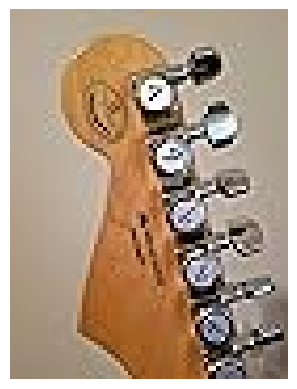

--------------------------------------------------------------
USING IMAGE RETRIEVAL:
1) Image URL: https://images-na.ssl-images-amazon.com/images/I/71bztfqdg+L._SY88.jpg
Review: I have been using Fender locking tuners for about five years on various
strats and teles. Definitely helps with tuning stability and way faster to restring if
there is a break.
Cosine similarity of images: 1.0000
Cosine similarity of text: 1.0000

37) Image URL: https://images-na.ssl-images-amazon.com/images/I/71bztfqdg+L._SY88.jpg
Review: I have been using Fender locking tuners for about five years on various
strats and teles. Definitely helps with tuning stability and way faster to restring if
there is a break.
Cosine similarity of images: 0.5073
Cosine similarity of text: 0.0145

163) Image URL: https://images-na.ssl-images-amazon.com/images/I/71bztfqdg+L._SY88.jpg
Review: I have been using Fender locking tuners for about five years on various
strats and teles. Definitely helps with tuning stability and way

In [19]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def image_text_retrieval(image_url=None, review_text=None):
    # Combine results after performing image and text retrieval.

    # Load image features and TF-IDF scores (assuming already loaded or provided)
    normalized_extractedFeatures = np.load("/content/drive/MyDrive/normalized_extractedFeatures.npy")
    with open("/content/drive/MyDrive/tfidf_scores.pkl", 'rb') as f:
        tfidf_dframe = pd.read_pickle(f)


    # Retrieveing the image from URL
    if image_url is not None:
      response = requests.get(image_url)
      img = Image.open(BytesIO(response.content))

    # Display the image
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    # Convert input review to TF-IDF vector
    input_review_vector = tfidf_dframe.loc[0, :].values.reshape(1, -1)  # Assuming first row is input review

    # Calculate cosine similarity for image features
    imageSimilarities = [cosine_similarity_calculation(normalized_extractedFeatures[0], feature) for feature in normalized_extractedFeatures]

    tfidfSimilarities = tfidf_dframe.apply(tfidf_similarity_calculation, axis=1)

    # Combine image and TF-IDF similarities with a weighting factor
    if image_url is not None and review_text is not None:
      image_wt = 0.5
      tfidf_wt = 0.5
    elif image_url is None:
      image_wt = 0
      tfidf_wt = 1
    else:
      image_wt = 1
      tfidf_wt = 0

    combined_similarities = [(image_wt * image_sim + tfidf_wt * tfidf_sim) for image_sim, tfidf_sim in zip(imageSimilarities, tfidfSimilarities)]

    # Create a DataFrame to store image IDs and combined similarities
    result_dfr = pd.DataFrame({'Image ID': range(1, len(combined_similarities) + 1), 'Combined_Similarity': combined_similarities})

    # Sort the DataFrame by similarity in descending order
    result_dfr = result_dfr.sort_values(by='Combined_Similarity', ascending=False)

    # Get top 3 most similar images using combined similarity
    top3_similarImages = result_dfr.head(3)

    # Print the results for image retrieval
    print("--------------------------------------------------------------")
    print("USING IMAGE RETRIEVAL:")
    for i, row in top3_similarImages.iterrows():
        print(f"{i+1}) Image URL: {image_url}")
        print(f"Review: {review_text}")
        print(f"Cosine similarity of images: {row['Combined_Similarity']:.4f}")
        print(f"Cosine similarity of text: {tfidfSimilarities[i]:.4f}")
        print()

    # Calculating composite similarity scores for images and text using image retrieval
    composite_similarity_of_images = top3_similarImages['Combined_Similarity'].mean()
    composite_similarity_of_text = tfidfSimilarities.mean()

    # Get top 3 most similar images using text retrieval
    top_3_text_similar_images = tfidf_dframe.iloc[tfidfSimilarities.nlargest(3).index]
    # print(top_3_text_similar_images)
    # Print the results for text retrieval
    print("--------------------------------------------------------------")
    print("USING TEXT RETRIEVAL:")
    for i, row in top_3_text_similar_images.iterrows():
        print(f"{i+1}) Image URL: {image_url}")
        print(f"Review: {dframe['Review Text'].iloc[i]}")
        print(f"Cosine similarity of images: {imageSimilarities[i]:.4f}")
        print(f"Cosine similarity of text: {tfidfSimilarities[i]:.4f}")
        print()

    # composite_similarity_images = top3_similarImages['Combined Similarity'].mean()
    # composite_similarity_text = tfidfSimilarities.mean()

    # Calculate final composite similarity score
    overall_composite_similarity = (0.5 * composite_similarity_of_images) + (0.5 * composite_similarity_of_text)
    print("--------------------------------------------------------------")
    print("Composite similarity scores of images:", composite_similarity_of_images)
    print("Composite similarity scores of text:", composite_similarity_of_text)
    print("Final composite similarity score:", overall_composite_similarity)
    print("--------------------------------------------------------------")

image_url = "https://images-na.ssl-images-amazon.com/images/I/71bztfqdg+L._SY88.jpg"
review_text = '''I have been using Fender locking tuners for about five years on various
strats and teles. Definitely helps with tuning stability and way faster to restring if
there is a break.'''
image_text_retrieval(image_url, review_text)